In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import json
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
import requests
import time
from pandas_profiling import ProfileReport
from wordcloud import WordCloud
from PIL import Image
import ast
from re import sub
from decimal import Decimal

%matplotlib inline

In [2]:
pd.options.display.min_rows = 100
pd.options.display.max_columns = 100

In [3]:
# API_KEY = "134a6a462f5181815b55f05c222a2761"

In [4]:
movies_rev_df = pd.read_csv("movies_rev_df.csv", lineterminator='\n', index_col=0)
movies_cas_df = pd.read_csv("movies_cas_df.csv", lineterminator='\n', index_col=0)

In [5]:
def genres_transform(genre_list):
    genre_list = ast.literal_eval(genre_list)
    genres = []
    for genre in genre_list:
        genres.append(genre['name'])
    return " | ".join(genres)

In [6]:
movies_rev_df.isna().sum()

adult                       2
backdrop_path             184
belongs_to_collection    5983
budget                      2
genres                      2
homepage                 4657
id                          2
imdb_id                    59
original_language           2
original_title              2
overview                   18
popularity                  2
poster_path                18
production_companies        2
production_countries        2
release_date                2
revenue                     2
runtime                     5
spoken_languages            2
status                      2
tagline                  1519
title                       2
video                       2
vote_average                2
vote_count                  2
success                  8009
status_code              8009
status_message           8009
dtype: int64

In [7]:
movies_cas_df.isna().sum()

id                   2
cast                 2
crew                 2
success           8005
status_code       8005
status_message    8005
dtype: int64

In [8]:
len(movies_rev_df), len(movies_cas_df)

(8011, 8007)

In [9]:
len(set(movies_rev_df['id'].values).union(set(movies_cas_df['id'])))

7885

In [10]:
merged_rev_cas_df = pd.merge(movies_rev_df, movies_cas_df, how='inner', on='id')

In [11]:
merged_rev_cas_df.to_csv("merged_dataframe_Dec_7_v1.0.csv", index=False)

In [12]:
merged_rev_cas_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8266 entries, 0 to 8265
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  8262 non-null   float64
 1   backdrop_path          8070 non-null   object 
 2   belongs_to_collection  2088 non-null   object 
 3   budget                 8262 non-null   float64
 4   genres                 8262 non-null   object 
 5   homepage               3436 non-null   object 
 6   id                     8262 non-null   float64
 7   imdb_id                8201 non-null   object 
 8   original_language      8262 non-null   object 
 9   original_title         8262 non-null   object 
 10  overview               8244 non-null   object 
 11  popularity             8262 non-null   float64
 12  poster_path            8246 non-null   object 
 13  production_companies   8262 non-null   object 
 14  production_countries   8262 non-null   object 
 15  rele

JSON = JavaScript Object Notation.

Basically a key-value way of storing data. For example: 

{
    'Name': 'Sharnel',
    'Course': 'MSBA'
}

In [13]:
merged_rev_cas_df['genres'].iloc[0]

"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name': 'History'}, {'id': 10752, 'name': 'War'}]"

Our required format: Drama | History | War

In [14]:
merged_rev_cas_df.head(2)

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,success_x,status_code_x,status_message_x,cast,crew,success_y,status_code_y,status_message_y
0,0.0,/4H4RAeeykpi0ijvu3wYgV346y06.jpg,NaN,100000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",NaN,618.0,tt0004972,en,The Birth of a Nation,"Two families, abolitionist Northerners the Sto...",9.106,/pNpOXpQI5GSUfiWypubYtMh9928.jpg,"[{'id': 161894, 'logo_path': None, 'name': 'Ep...","[{'iso_3166_1': 'US', 'name': 'United States o...",1915-02-08,11000000.0,193.0,"[{'english_name': 'No Language', 'iso_639_1': ...",Released,The Fiery Cross of the Ku Klux Klan!,The Birth of a Nation,0.0,6.1,370.0,NaN,NaN,NaN,"[{'adult': False, 'gender': 1, 'id': 8828, 'kn...","[{'adult': False, 'gender': 2, 'id': 8630, 'kn...",NaN,NaN,NaN
1,0.0,/nhdKUNC6diqOAMtZdudttvguBb1.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,36208.0,tt0009018,en,A Dog's Life,The Tramp and his dog companion struggle to su...,8.702,/41vqtliesQrsJQ9iTJh5nFYQgBg.jpg,"[{'id': 3245, 'logo_path': '/9dBTQp9XitrHkx20i...","[{'iso_3166_1': 'US', 'name': 'United States o...",1918-04-14,0.0,34.0,"[{'english_name': 'No Language', 'iso_639_1': ...",Released,In his First Million Dollar Picture,A Dog's Life,0.0,7.4,216.0,NaN,NaN,NaN,"[{'adult': False, 'gender': 2, 'id': 13848, 'k...","[{'adult': False, 'gender': 2, 'id': 3945, 'kn...",NaN,NaN,NaN


In [15]:
merged_rev_cas_df.columns

Index(['adult', 'backdrop_path', 'belongs_to_collection', 'budget', 'genres',
       'homepage', 'id', 'imdb_id', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'success_x', 'status_code_x',
       'status_message_x', 'cast', 'crew', 'success_y', 'status_code_y',
       'status_message_y'],
      dtype='object')

Dropped the below variables because they don't really help with the analysis.

In [16]:
ignored_columns = [
    'adult', 'backdrop_path', 'belongs_to_collection', 
    'homepage', 'imdb_id', 'poster_path', 'spoken_languages',
    'video', 'success_x', 'status_code_x', 'status_message_x',
    'success_y', 'status_code_y', 'status_message_y', 'overview', 'tagline'
]

merged_rev_cas_df.drop(columns=ignored_columns, inplace=True)

In [17]:
merged_rev_cas_df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,8.262000e+03,8262.000000,8262.000000,8.262000e+03,8257.000000,8262.000000,8262.000000
mean,2.262937e+07,211038.311063,33.727065,6.774743e+07,99.864600,6.272561,1522.216776
std,3.981839e+07,250200.246461,165.099325,1.610210e+08,26.151635,1.261107,2728.252827
min,0.000000e+00,5.000000,6.326000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,11005.500000,11.452500,0.000000e+00,90.000000,5.800000,162.000000
50%,5.000000e+06,56997.500000,15.310500,4.297972e+06,99.000000,6.400000,482.000000
75%,2.800000e+07,401475.750000,25.408000,6.308032e+07,112.000000,7.000000,1582.000000
max,3.800000e+08,904144.000000,11473.714000,2.847246e+09,400.000000,10.000000,30353.000000


In [18]:
merged_rev_cas_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8266 entries, 0 to 8265
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                8262 non-null   float64
 1   genres                8262 non-null   object 
 2   id                    8262 non-null   float64
 3   original_language     8262 non-null   object 
 4   original_title        8262 non-null   object 
 5   popularity            8262 non-null   float64
 6   production_companies  8262 non-null   object 
 7   production_countries  8262 non-null   object 
 8   release_date          8262 non-null   object 
 9   revenue               8262 non-null   float64
 10  runtime               8257 non-null   float64
 11  status                8262 non-null   object 
 12  title                 8262 non-null   object 
 13  vote_average          8262 non-null   float64
 14  vote_count            8262 non-null   float64
 15  cast                 

In [19]:
merged_rev_cas_df.isna().sum()

budget                  4
genres                  4
id                      4
original_language       4
original_title          4
popularity              4
production_companies    4
production_countries    4
release_date            4
revenue                 4
runtime                 9
status                  4
title                   4
vote_average            4
vote_count              4
cast                    4
crew                    4
dtype: int64

In [20]:
merged_rev_cas_df.dropna(how='any', inplace=True)

In [21]:
# Transforming genre column from json to pipeline-character separated values
# Example: "[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name': 'History'}, {'id': 10752, 'name': 'War'}]"
# to Drama | History | War
merged_rev_cas_df['genres'] = merged_rev_cas_df['genres'].apply(genres_transform)

In [22]:
def get_production_companies(prod_comps):
    prod_comps = ast.literal_eval(prod_comps)
    pcs = []
    for pc in prod_comps:
        pcs.append(pc['name'])
    return " | ".join(pcs)

def get_production_countries(prod_counts):
    prod_counts = ast.literal_eval(prod_counts)
    pcs = []
    for pc in prod_counts:
        pcs.append(pc['name'])
    return " | ".join(pcs)

In [23]:
# Transform the production_companies to |-separated columns
merged_rev_cas_df['production_companies'] = merged_rev_cas_df['production_companies'].apply(get_production_companies)

In [24]:
# Transform the production_countries to |-separated columns
merged_rev_cas_df['production_countries'] = merged_rev_cas_df['production_countries'].apply(get_production_countries)

In [25]:
merged_rev_cas_df.columns

Index(['budget', 'genres', 'id', 'original_language', 'original_title',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'status', 'title', 'vote_average',
       'vote_count', 'cast', 'crew'],
      dtype='object')

In [26]:
#data checkpoint in case we mess things up
merged_rev_cas_df.to_csv("merged_rev_cas_df_ckpt_1.csv")

In [27]:
# merged_rev_cas_df = pd.read_csv("merged_rev_cas_df_ckpt_1.csv", lineterminator='\n')

In [28]:
# merged_rev_cas_df.drop(columns=['Unnamed: 0'], inplace=True)

In [29]:
ckpt_df_1 = merged_rev_cas_df.copy()

In [30]:
merged_rev_cas_df = ckpt_df_1.copy()

In [31]:
merged_rev_cas_df.columns

Index(['budget', 'genres', 'id', 'original_language', 'original_title',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'status', 'title', 'vote_average',
       'vote_count', 'cast', 'crew'],
      dtype='object')

In [32]:
def get_cast_pop(cast):
    cast = ast.literal_eval(cast)
    acs_pops = []
    for c in cast[0:2]:
        acs_pops.append(c['name'])
        acs_pops.append(str(c['popularity']))
    return " | ".join(acs_pops)

In [33]:
def get_director_pop(crew):
    crew = ast.literal_eval(crew)
    for c in crew:
        if c['job'] == "Director":
            return " | ".join([c['name'], str(c['popularity'])])

In [34]:
# Transform the cast to |-separated columns
merged_rev_cas_df['cast'] = merged_rev_cas_df['cast'].apply(get_cast_pop)

In [35]:
merged_rev_cas_df['crew'] = merged_rev_cas_df['crew'].apply(get_director_pop)

Colormap oceadan is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

In [36]:
genres = merged_rev_cas_df['genres'].str.split(' | ', expand=True)

In [37]:
merged_rev_cas_df = pd.concat(
    [
        merged_rev_cas_df,
        pd.get_dummies(genres, prefix='', prefix_sep='').groupby(level=0, axis=1).sum().drop(columns = ['', '|'])
    ], axis=1
)

Categorizing production companies into their parent companies and calling all the not-so-famous companies as "Others"

In [38]:
merged_rev_cas_df['production_companies'].value_counts()[0:15]

                               217
Paramount                       63
Universal Pictures              61
Warner Bros. Pictures           50
Columbia Pictures               39
Marvel Studios                  39
Walt Disney Pictures            35
Metro-Goldwyn-Mayer             34
DreamWorks Animation            34
20th Century Fox                31
New Line Cinema                 28
Warner Bros. Animation          27
Disney Television Animation     23
The Asylum                      21
Disney Channel                  19
Name: production_companies, dtype: int64

In [39]:
def replace_main_production_companies(prod_comp):
    if "Paramount" in prod_comp:
        return "Paramount"
    elif "Universal" in prod_comp:
        return "Universal Pictures"
    elif "Warner Br" in prod_comp:
        return "Warner Bros. Pictures"
    elif "Marvel" in prod_comp:
        return "Walt Disney"
    elif "Columbia" in prod_comp:
        return "Columbia Pictures"
    elif "DreamWorks" in prod_comp:
        return "DreamWorks Animation"
    elif "Metro-Gold" in prod_comp:
        return "Metro-Goldwyn-Mayer"
    elif "20th Century" in prod_comp:
        return "Walt Disney"
    elif "New Line" in prod_comp:
        return "Warner Bros. Pictures"
    elif "Disney" in prod_comp:
        return "Walt Disney"
    elif "TriStar" in prod_comp:
        return "Sony Pictures"
    elif "Dimension Films" in prod_comp:
        return "Walt Disney"
    elif "Pixar" in prod_comp:
        return "Walt Disney"
    elif "Orion Pic" in prod_comp:
        return "Metro-Goldwyn-Mayer"
    elif "Hasbro" in prod_comp:
        return "Allspark"
    elif "Allspark" in prod_comp:
        return "Allspark"
    elif "Entertainment One" in prod_comp:
        return "Allspark"
    else:
        return "Others"

In [40]:
merged_rev_cas_df['production_companies'] = merged_rev_cas_df['production_companies'].apply(replace_main_production_companies)

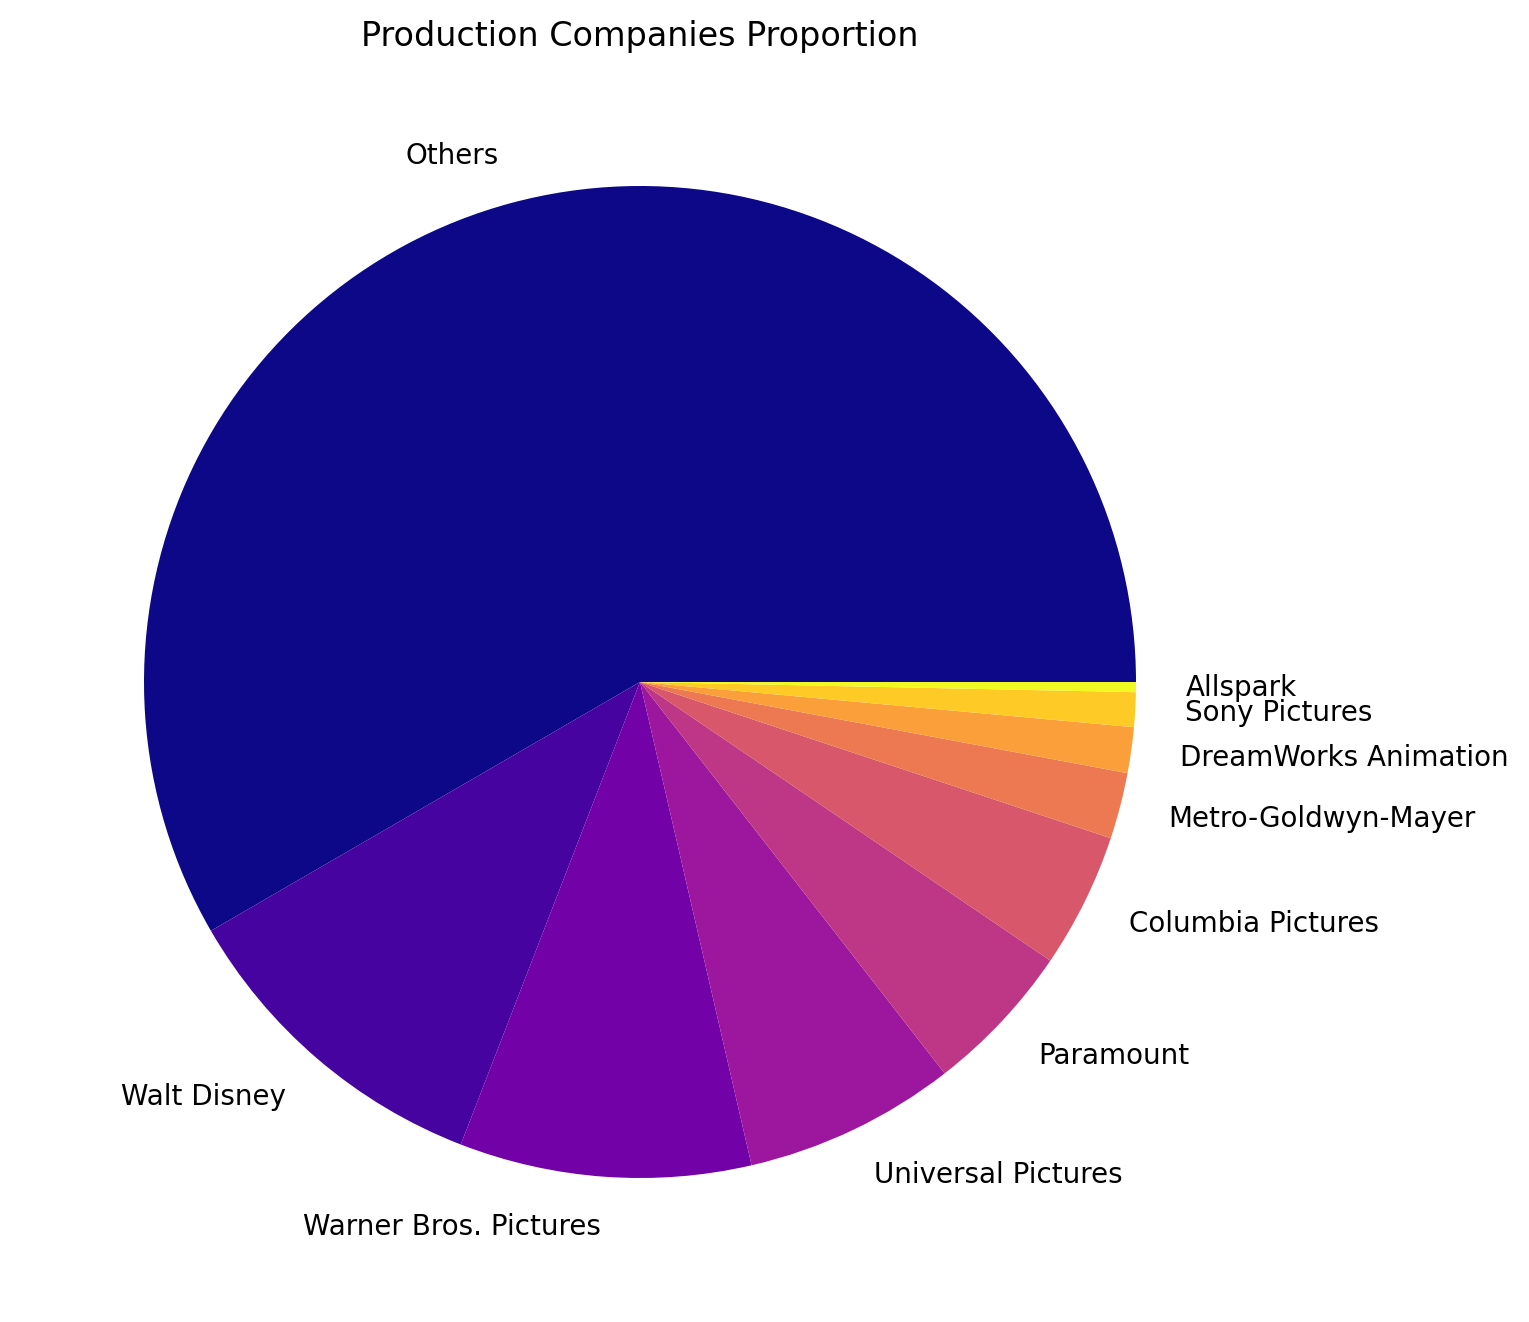

In [41]:
# plt.style.use("seaborn-dark")
plt.figure(figsize=(8, 10), dpi=200)
plt.title("Production Companies Proportion")
merged_rev_cas_df['production_companies'].value_counts().plot(kind='pie', cmap='plasma')
plt.ylabel("")
plt.show()

In [42]:
merged_rev_cas_df = pd.concat(
    [
        merged_rev_cas_df,
        pd.get_dummies(merged_rev_cas_df['production_companies'])
    ], axis=1
)

In [43]:
merged_rev_cas_df.head(2)

,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,cast,crew,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Fiction,History,Horror,Movie,Music,Mystery,Romance,Science,TV,Thriller,War,Western,Allspark,Columbia Pictures,DreamWorks Animation,Metro-Goldwyn-Mayer,Others,Paramount,Sony Pictures,Universal Pictures,Walt Disney,Warner Bros. Pictures
0,100000.0,Drama | History | War,618.0,en,The Birth of a Nation,9.106,Others,United States of America,1915-02-08,11000000.0,193.0,Released,The Birth of a Nation,6.1,370.0,Lillian Gish | 2.169 | Mae Marsh | 1.094,D. W. Griffith | 1.4140000000000001,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,0.0,Comedy | Drama,36208.0,en,A Dog's Life,8.702,Others,United States of America,1918-04-14,0.0,34.0,Released,A Dog's Life,7.4,216.0,Charlie Chaplin | 6.774 | Edna Purviance | 1.4,Charlie Chaplin | 6.774,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [44]:
merged_rev_cas_df[['Actor_1','Actor_1 Popularity', 'Actor_2', 'Actor_2 Popularity']] = merged_rev_cas_df['cast'].str.split("|",expand=True)

In [45]:
merged_rev_cas_df[['Director', 'Director_Popularity']] = merged_rev_cas_df['crew'].str.split("|",expand=True)

In [46]:
merged_rev_cas_df.head(2)

,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,cast,crew,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Fiction,History,Horror,Movie,Music,Mystery,Romance,Science,TV,Thriller,War,Western,Allspark,Columbia Pictures,DreamWorks Animation,Metro-Goldwyn-Mayer,Others,Paramount,Sony Pictures,Universal Pictures,Walt Disney,Warner Bros. Pictures,Actor_1,Actor_1 Popularity,Actor_2,Actor_2 Popularity,Director,Director_Popularity
0,100000.0,Drama | History | War,618.0,en,The Birth of a Nation,9.106,Others,United States of America,1915-02-08,11000000.0,193.0,Released,The Birth of a Nation,6.1,370.0,Lillian Gish | 2.169 | Mae Marsh | 1.094,D. W. Griffith | 1.4140000000000001,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,Lillian Gish,2.169,Mae Marsh,1.094,D. W. Griffith,1.4140000000000001
1,0.0,Comedy | Drama,36208.0,en,A Dog's Life,8.702,Others,United States of America,1918-04-14,0.0,34.0,Released,A Dog's Life,7.4,216.0,Charlie Chaplin | 6.774 | Edna Purviance | 1.4,Charlie Chaplin | 6.774,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,Charlie Chaplin,6.774,Edna Purviance,1.4,Charlie Chaplin,6.774


In [47]:
merged_rev_cas_df.to_csv("merged_rev_cas_df_ckpt_2.csv", index=False)

In [48]:
# merged_rev_cas_df = pd.read_csv("merged_rev_cas_df_ckpt_2.csv")

In [49]:
merged_rev_cas_df.head(2)

,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,cast,crew,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Fiction,History,Horror,Movie,Music,Mystery,Romance,Science,TV,Thriller,War,Western,Allspark,Columbia Pictures,DreamWorks Animation,Metro-Goldwyn-Mayer,Others,Paramount,Sony Pictures,Universal Pictures,Walt Disney,Warner Bros. Pictures,Actor_1,Actor_1 Popularity,Actor_2,Actor_2 Popularity,Director,Director_Popularity
0,100000.0,Drama | History | War,618.0,en,The Birth of a Nation,9.106,Others,United States of America,1915-02-08,11000000.0,193.0,Released,The Birth of a Nation,6.1,370.0,Lillian Gish | 2.169 | Mae Marsh | 1.094,D. W. Griffith | 1.4140000000000001,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,Lillian Gish,2.169,Mae Marsh,1.094,D. W. Griffith,1.4140000000000001
1,0.0,Comedy | Drama,36208.0,en,A Dog's Life,8.702,Others,United States of America,1918-04-14,0.0,34.0,Released,A Dog's Life,7.4,216.0,Charlie Chaplin | 6.774 | Edna Purviance | 1.4,Charlie Chaplin | 6.774,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,Charlie Chaplin,6.774,Edna Purviance,1.4,Charlie Chaplin,6.774


In [50]:
merged_rev_cas_df.columns

Index(['budget', 'genres', 'id', 'original_language', 'original_title',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'status', 'title', 'vote_average',
       'vote_count', 'cast', 'crew', 'Action', 'Adventure', 'Animation',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'Fiction', 'History', 'Horror', 'Movie', 'Music', 'Mystery', 'Romance',
       'Science', 'TV', 'Thriller', 'War', 'Western', 'Allspark',
       'Columbia Pictures', 'DreamWorks Animation', 'Metro-Goldwyn-Mayer',
       'Others', 'Paramount', 'Sony Pictures', 'Universal Pictures',
       'Walt Disney', 'Warner Bros. Pictures', 'Actor_1', 'Actor_1 Popularity',
       'Actor_2', 'Actor_2 Popularity', 'Director', 'Director_Popularity'],
      dtype='object')

Colormap oceadan is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

In [51]:
merged_rev_cas_df.drop_duplicates(subset='id', inplace=True)

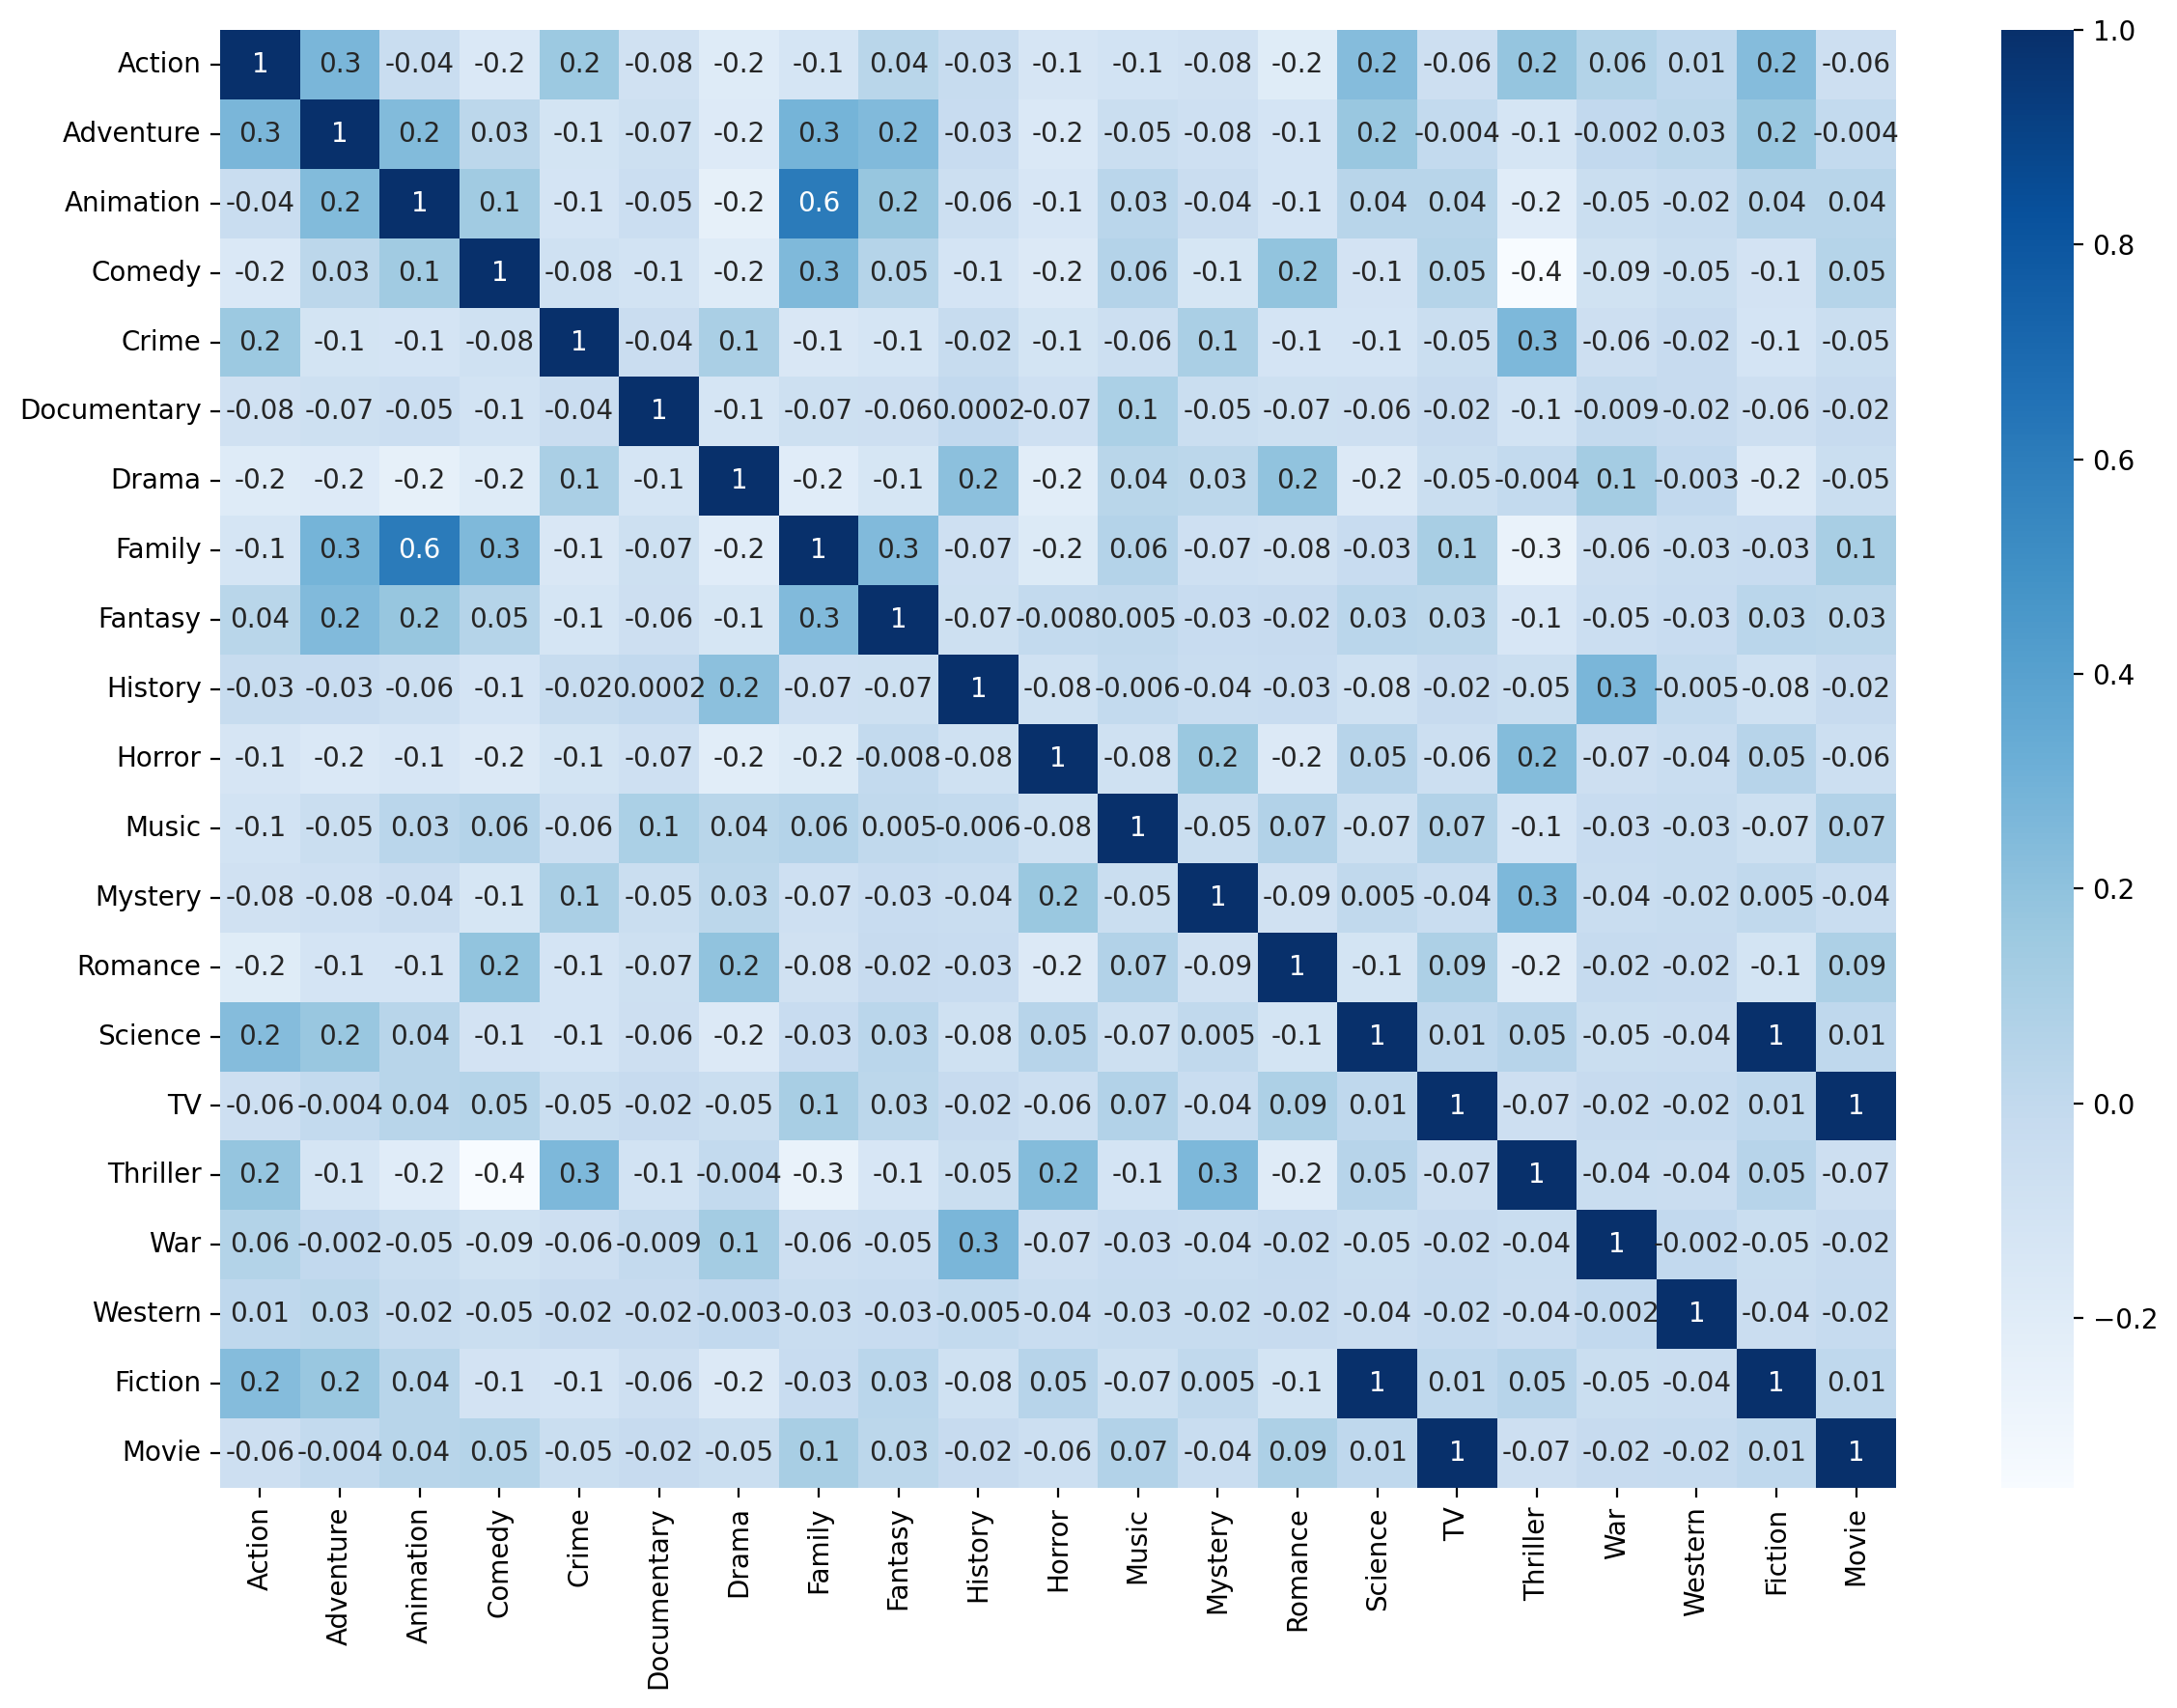

In [52]:
plt.figure(figsize=(14, 10), dpi=200)
sns.heatmap(
    merged_rev_cas_df[['Action', 'Adventure', 'Animation',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science', 'TV',
       'Thriller', 'War', 'Western', 'Fiction', 'Movie']].corr(), annot=True, fmt='.1g',cmap='Blues'
)
plt.show()

In [53]:
# plt.figure(figsize=(14, 10), dpi=200)
# sns.heatmap(
#     merged_rev_cas_df[['Action', 'Adventure', 'Animation',
#        'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
#        'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Sci-Fi',
#        'Thriller', 'War', 'Western', 'Movie']].corr(), annot=True, fmt='.1g',cmap='Greens'
# )
# plt.show()

In [54]:
merged_rev_cas_df.columns

Index(['budget', 'genres', 'id', 'original_language', 'original_title',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'status', 'title', 'vote_average',
       'vote_count', 'cast', 'crew', 'Action', 'Adventure', 'Animation',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'Fiction', 'History', 'Horror', 'Movie', 'Music', 'Mystery', 'Romance',
       'Science', 'TV', 'Thriller', 'War', 'Western', 'Allspark',
       'Columbia Pictures', 'DreamWorks Animation', 'Metro-Goldwyn-Mayer',
       'Others', 'Paramount', 'Sony Pictures', 'Universal Pictures',
       'Walt Disney', 'Warner Bros. Pictures', 'Actor_1', 'Actor_1 Popularity',
       'Actor_2', 'Actor_2 Popularity', 'Director', 'Director_Popularity'],
      dtype='object')

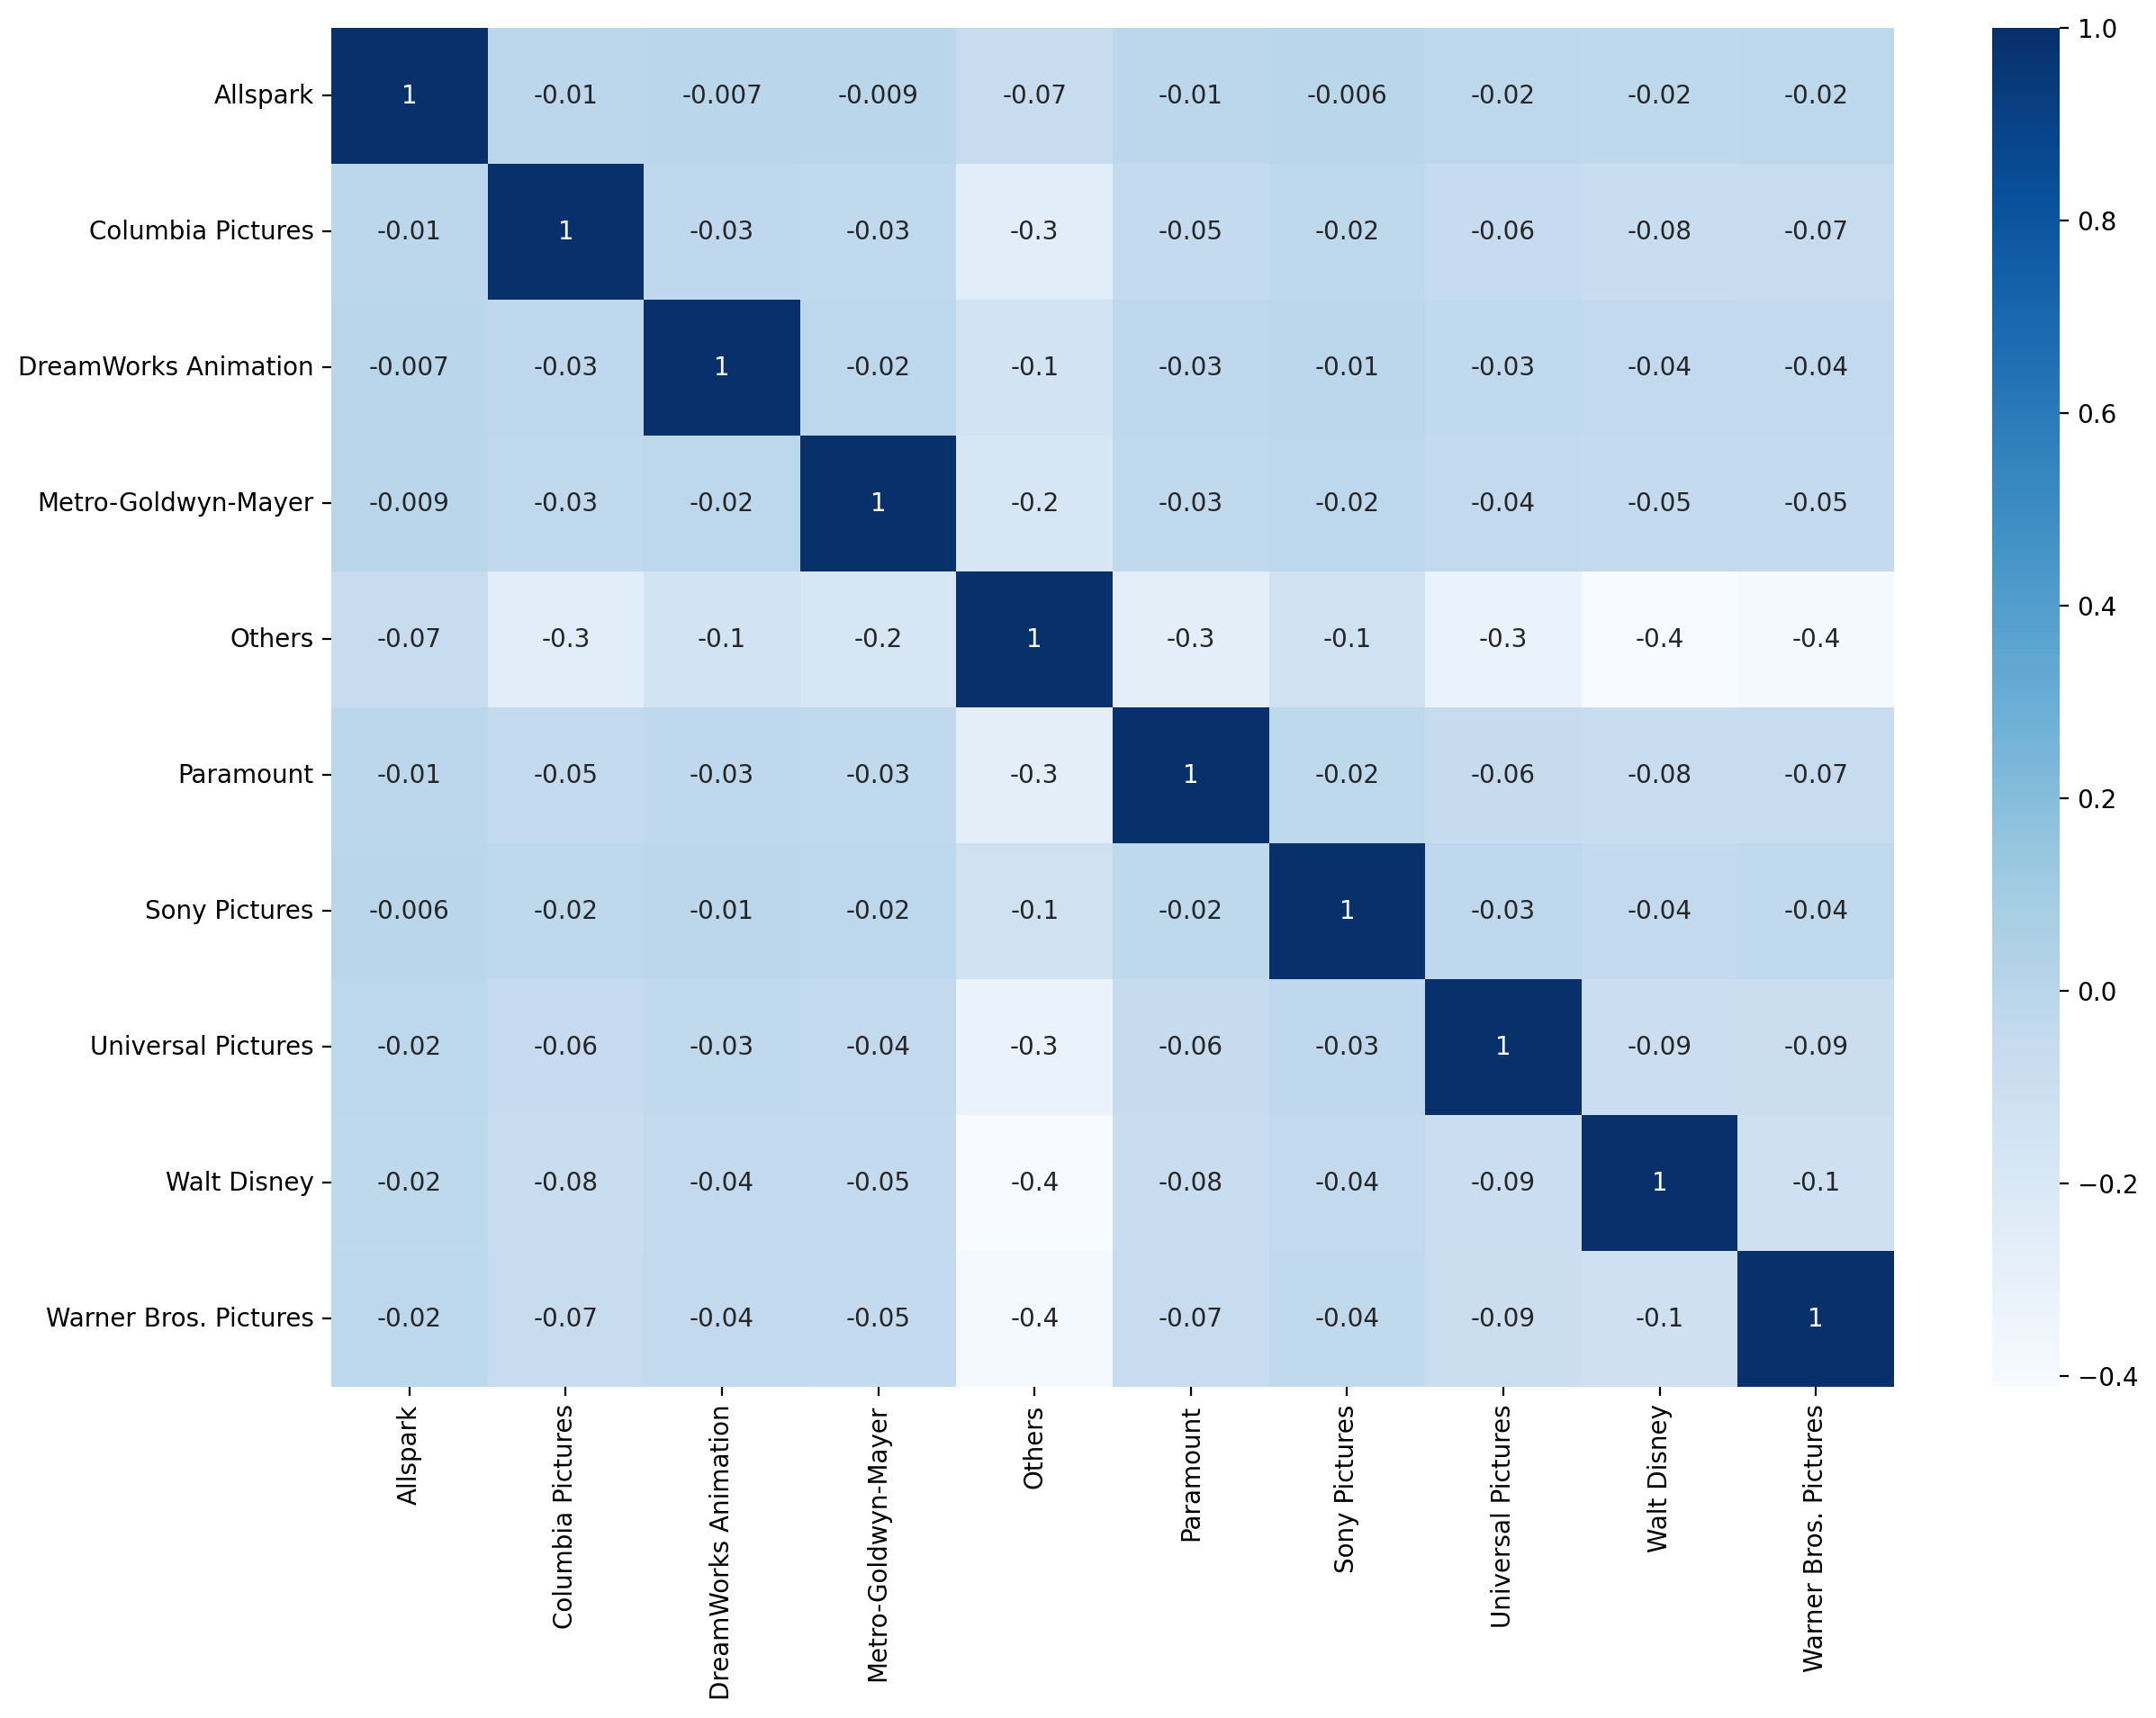

In [55]:
plt.figure(figsize=(14, 10), dpi=200)
sns.heatmap(
    merged_rev_cas_df[['Allspark', 'Columbia Pictures', 'DreamWorks Animation',
       'Metro-Goldwyn-Mayer', 'Others', 'Paramount', 'Sony Pictures',
       'Universal Pictures', 'Walt Disney', 'Warner Bros. Pictures']].corr(), annot=True, fmt='.1g',cmap='Blues'
)
plt.show()

In [56]:
merged_rev_cas_df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Fiction,History,Horror,Movie,Music,Mystery,Romance,Science,TV,Thriller,War,Western,Allspark,Columbia Pictures,DreamWorks Animation,Metro-Goldwyn-Mayer,Others,Paramount,Sony Pictures,Universal Pictures,Walt Disney,Warner Bros. Pictures
count,7.879000e+03,7879.000000,7879.000000,7.879000e+03,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000
mean,2.281159e+07,213537.948471,34.458865,6.834979e+07,99.979185,6.285963,1541.574438,0.249270,0.175022,0.108009,0.320726,0.129839,0.028430,0.367052,0.154461,0.115116,0.130727,0.039980,0.165884,0.033634,0.037061,0.085798,0.148496,0.130727,0.033634,0.279985,0.026653,0.015992,0.003427,0.044549,0.015103,0.021449,0.583450,0.047722,0.011804,0.067902,0.107755,0.096840
std,4.013477e+07,251526.885053,168.984766,1.625112e+08,26.280153,1.257462,2752.748044,0.432618,0.380010,0.310411,0.466785,0.336147,0.166208,0.482031,0.361413,0.319182,0.337123,0.195924,0.372000,0.180296,0.188922,0.280083,0.355614,0.337123,0.180296,0.449020,0.161078,0.125452,0.058442,0.206324,0.121972,0.144886,0.493018,0.213191,0.108008,0.251594,0.310090,0.295758
min,0.000000e+00,5.000000,6.326000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,11043.000000,11.532000,0.000000e+00,90.000000,5.800000,163.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000e+06,58496.000000,15.371000,4.349187e+06,99.000000,6.400000,486.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.900000e+07,406307.500000,26.000500,6.354255e+07,112.000000,7.000000,1609.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.800000e+08,904144.000000,11473.714000,2.847246e+09,400.000000,10.000000,30353.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
merged_rev_cas_df.head(2)

,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,cast,crew,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Fiction,History,Horror,Movie,Music,Mystery,Romance,Science,TV,Thriller,War,Western,Allspark,Columbia Pictures,DreamWorks Animation,Metro-Goldwyn-Mayer,Others,Paramount,Sony Pictures,Universal Pictures,Walt Disney,Warner Bros. Pictures,Actor_1,Actor_1 Popularity,Actor_2,Actor_2 Popularity,Director,Director_Popularity
0,100000.0,Drama | History | War,618.0,en,The Birth of a Nation,9.106,Others,United States of America,1915-02-08,11000000.0,193.0,Released,The Birth of a Nation,6.1,370.0,Lillian Gish | 2.169 | Mae Marsh | 1.094,D. W. Griffith | 1.4140000000000001,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,Lillian Gish,2.169,Mae Marsh,1.094,D. W. Griffith,1.4140000000000001
1,0.0,Comedy | Drama,36208.0,en,A Dog's Life,8.702,Others,United States of America,1918-04-14,0.0,34.0,Released,A Dog's Life,7.4,216.0,Charlie Chaplin | 6.774 | Edna Purviance | 1.4,Charlie Chaplin | 6.774,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,Charlie Chaplin,6.774,Edna Purviance,1.4,Charlie Chaplin,6.774


In [58]:
# merged_rev_cas_df = merged_rev_cas_df[merged_rev_cas_df['production_countries'].str.contains('United States')]

In [59]:
# merged_rev_cas_df.drop(columns=['production_countries'], inplace=True)

In [60]:
# merged_rev_cas_df.drop_duplicates(keep='first', inplace=True)

In [61]:
merged_rev_cas_df['release_date'] = pd.to_datetime(merged_rev_cas_df['release_date'])
merged_rev_cas_df['year'] = merged_rev_cas_df['release_date'].dt.year

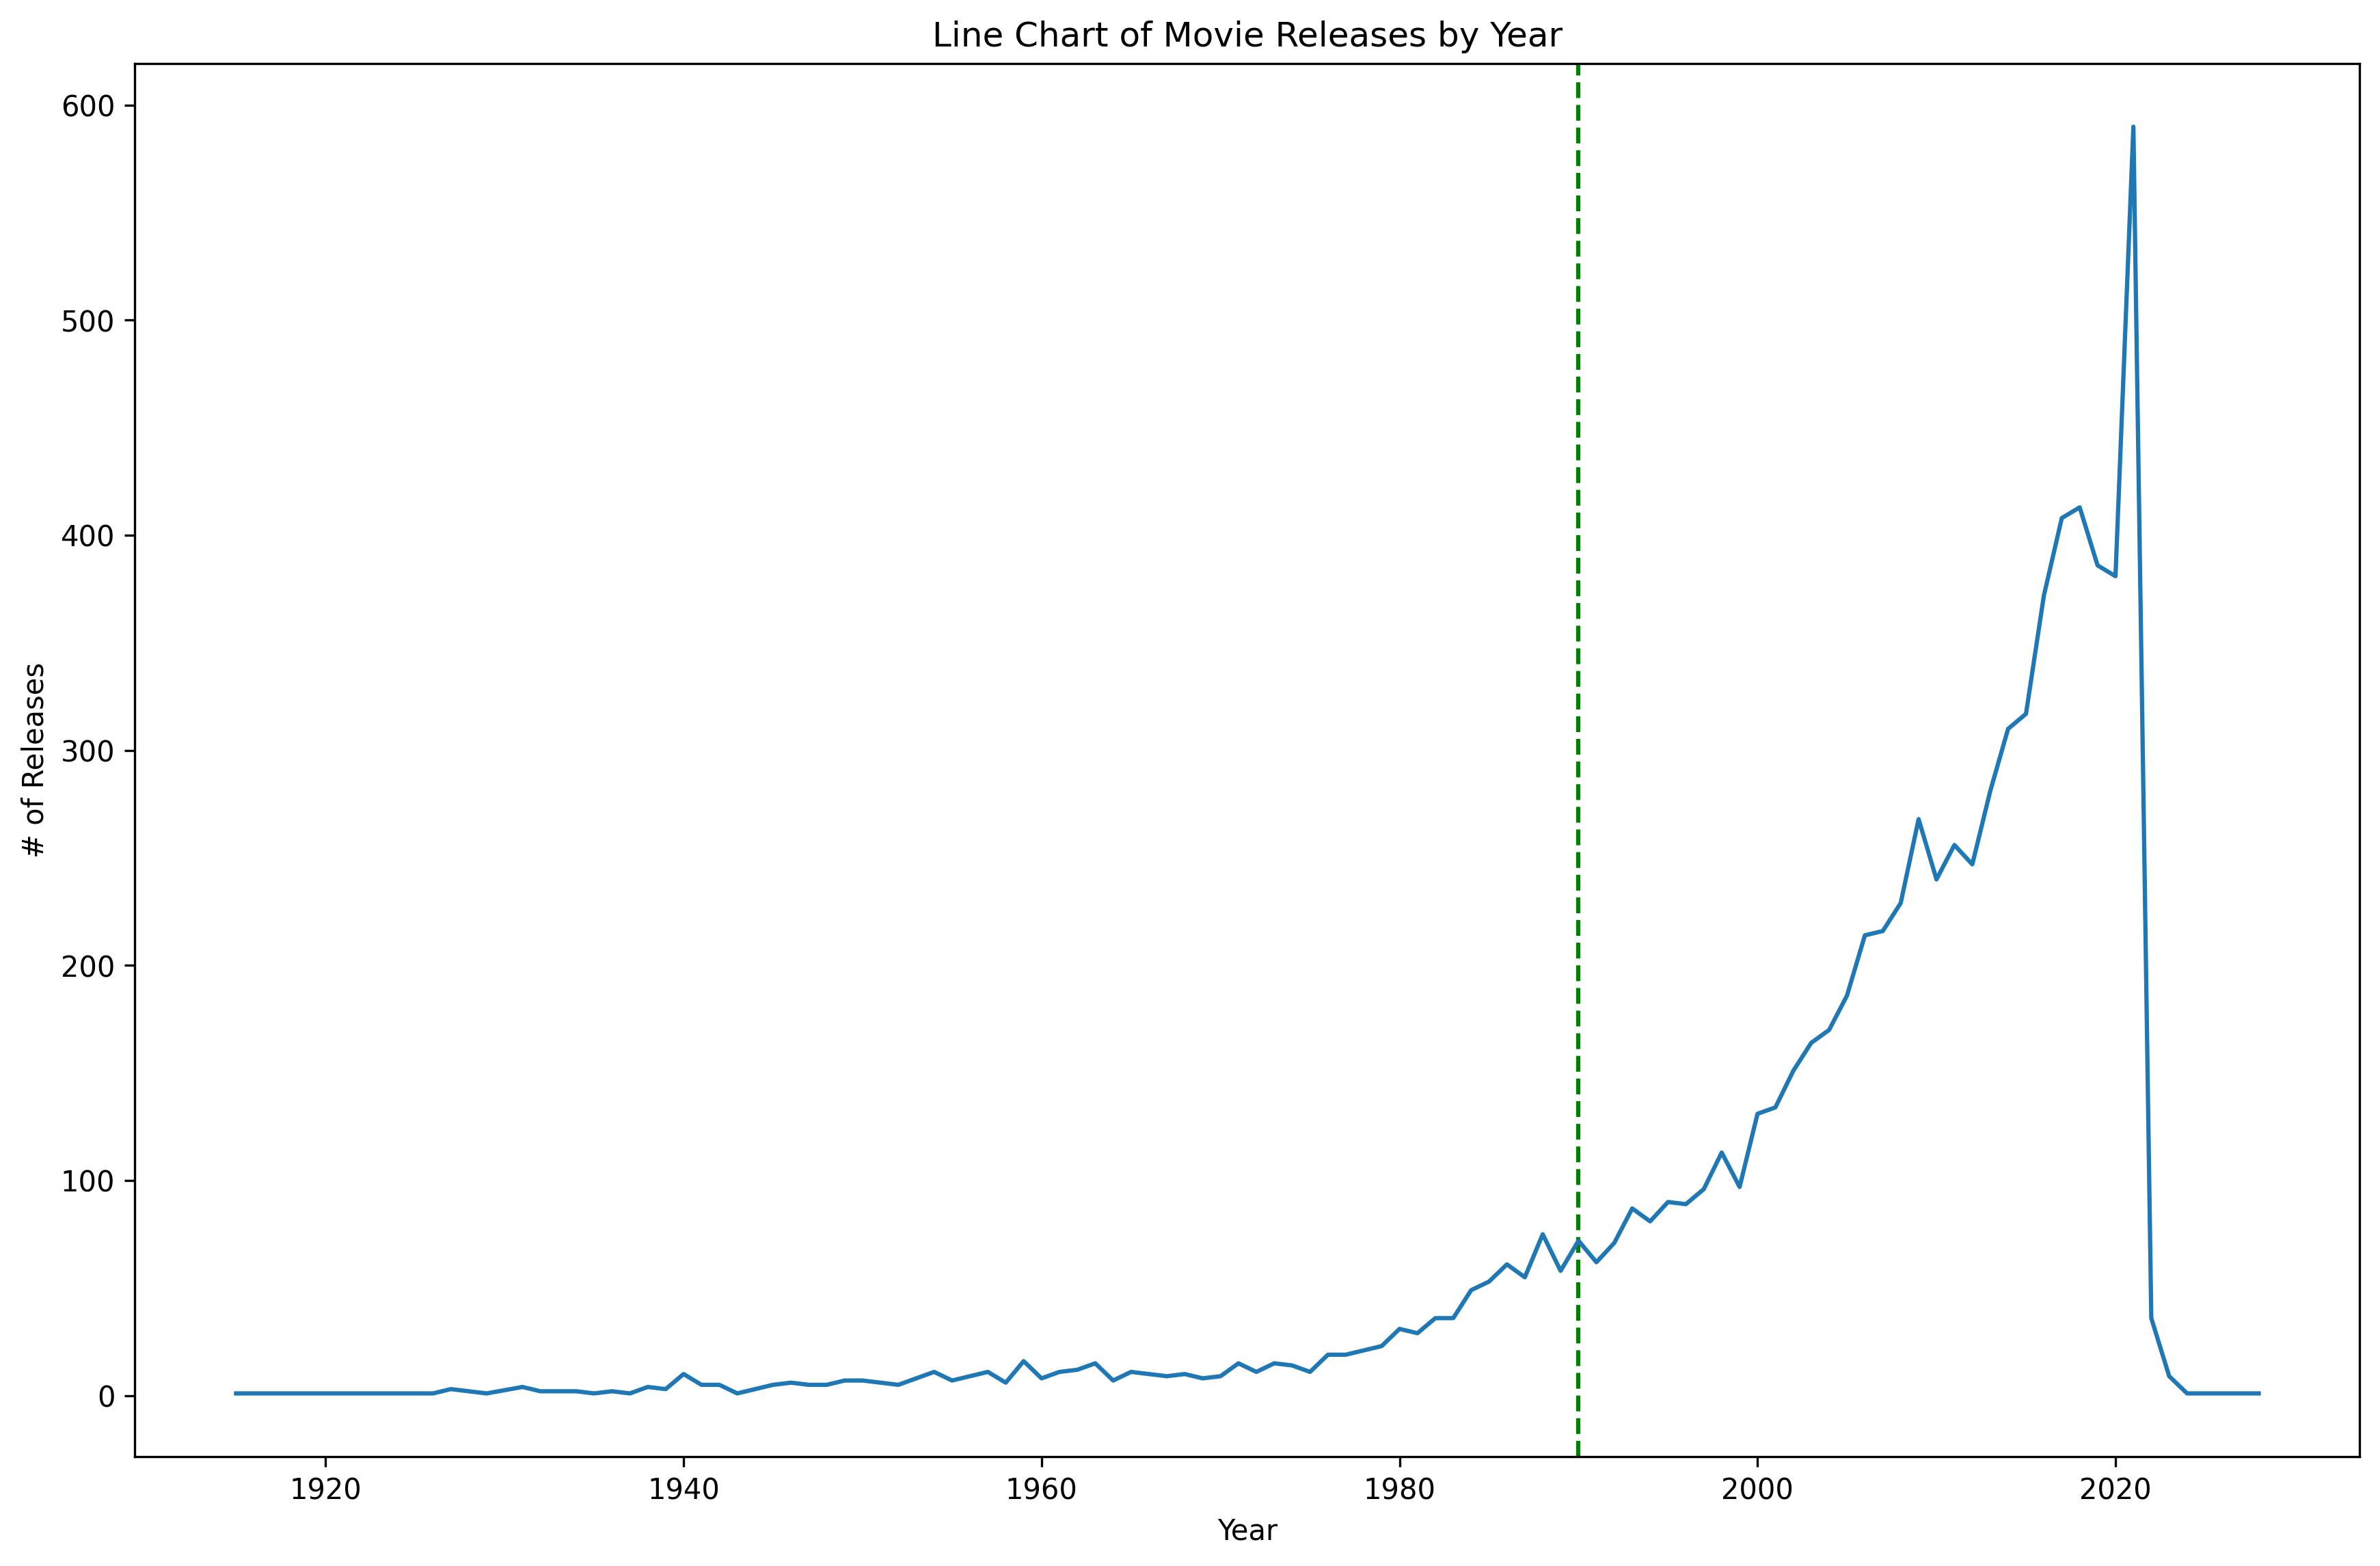

In [62]:
x = merged_rev_cas_df.groupby("year").size()
plt.figure(figsize=(14, 9), dpi=300)
plt.axvline(x=1990, linestyle='--', color='green')
x.plot(kind='line')
plt.xlabel("Year")
plt.ylabel("# of Releases")
plt.title("Line Chart of Movie Releases by Year")
plt.show()

In [63]:
merged_rev_cas_df = merged_rev_cas_df[merged_rev_cas_df['release_date'] > "1989-12-31"]

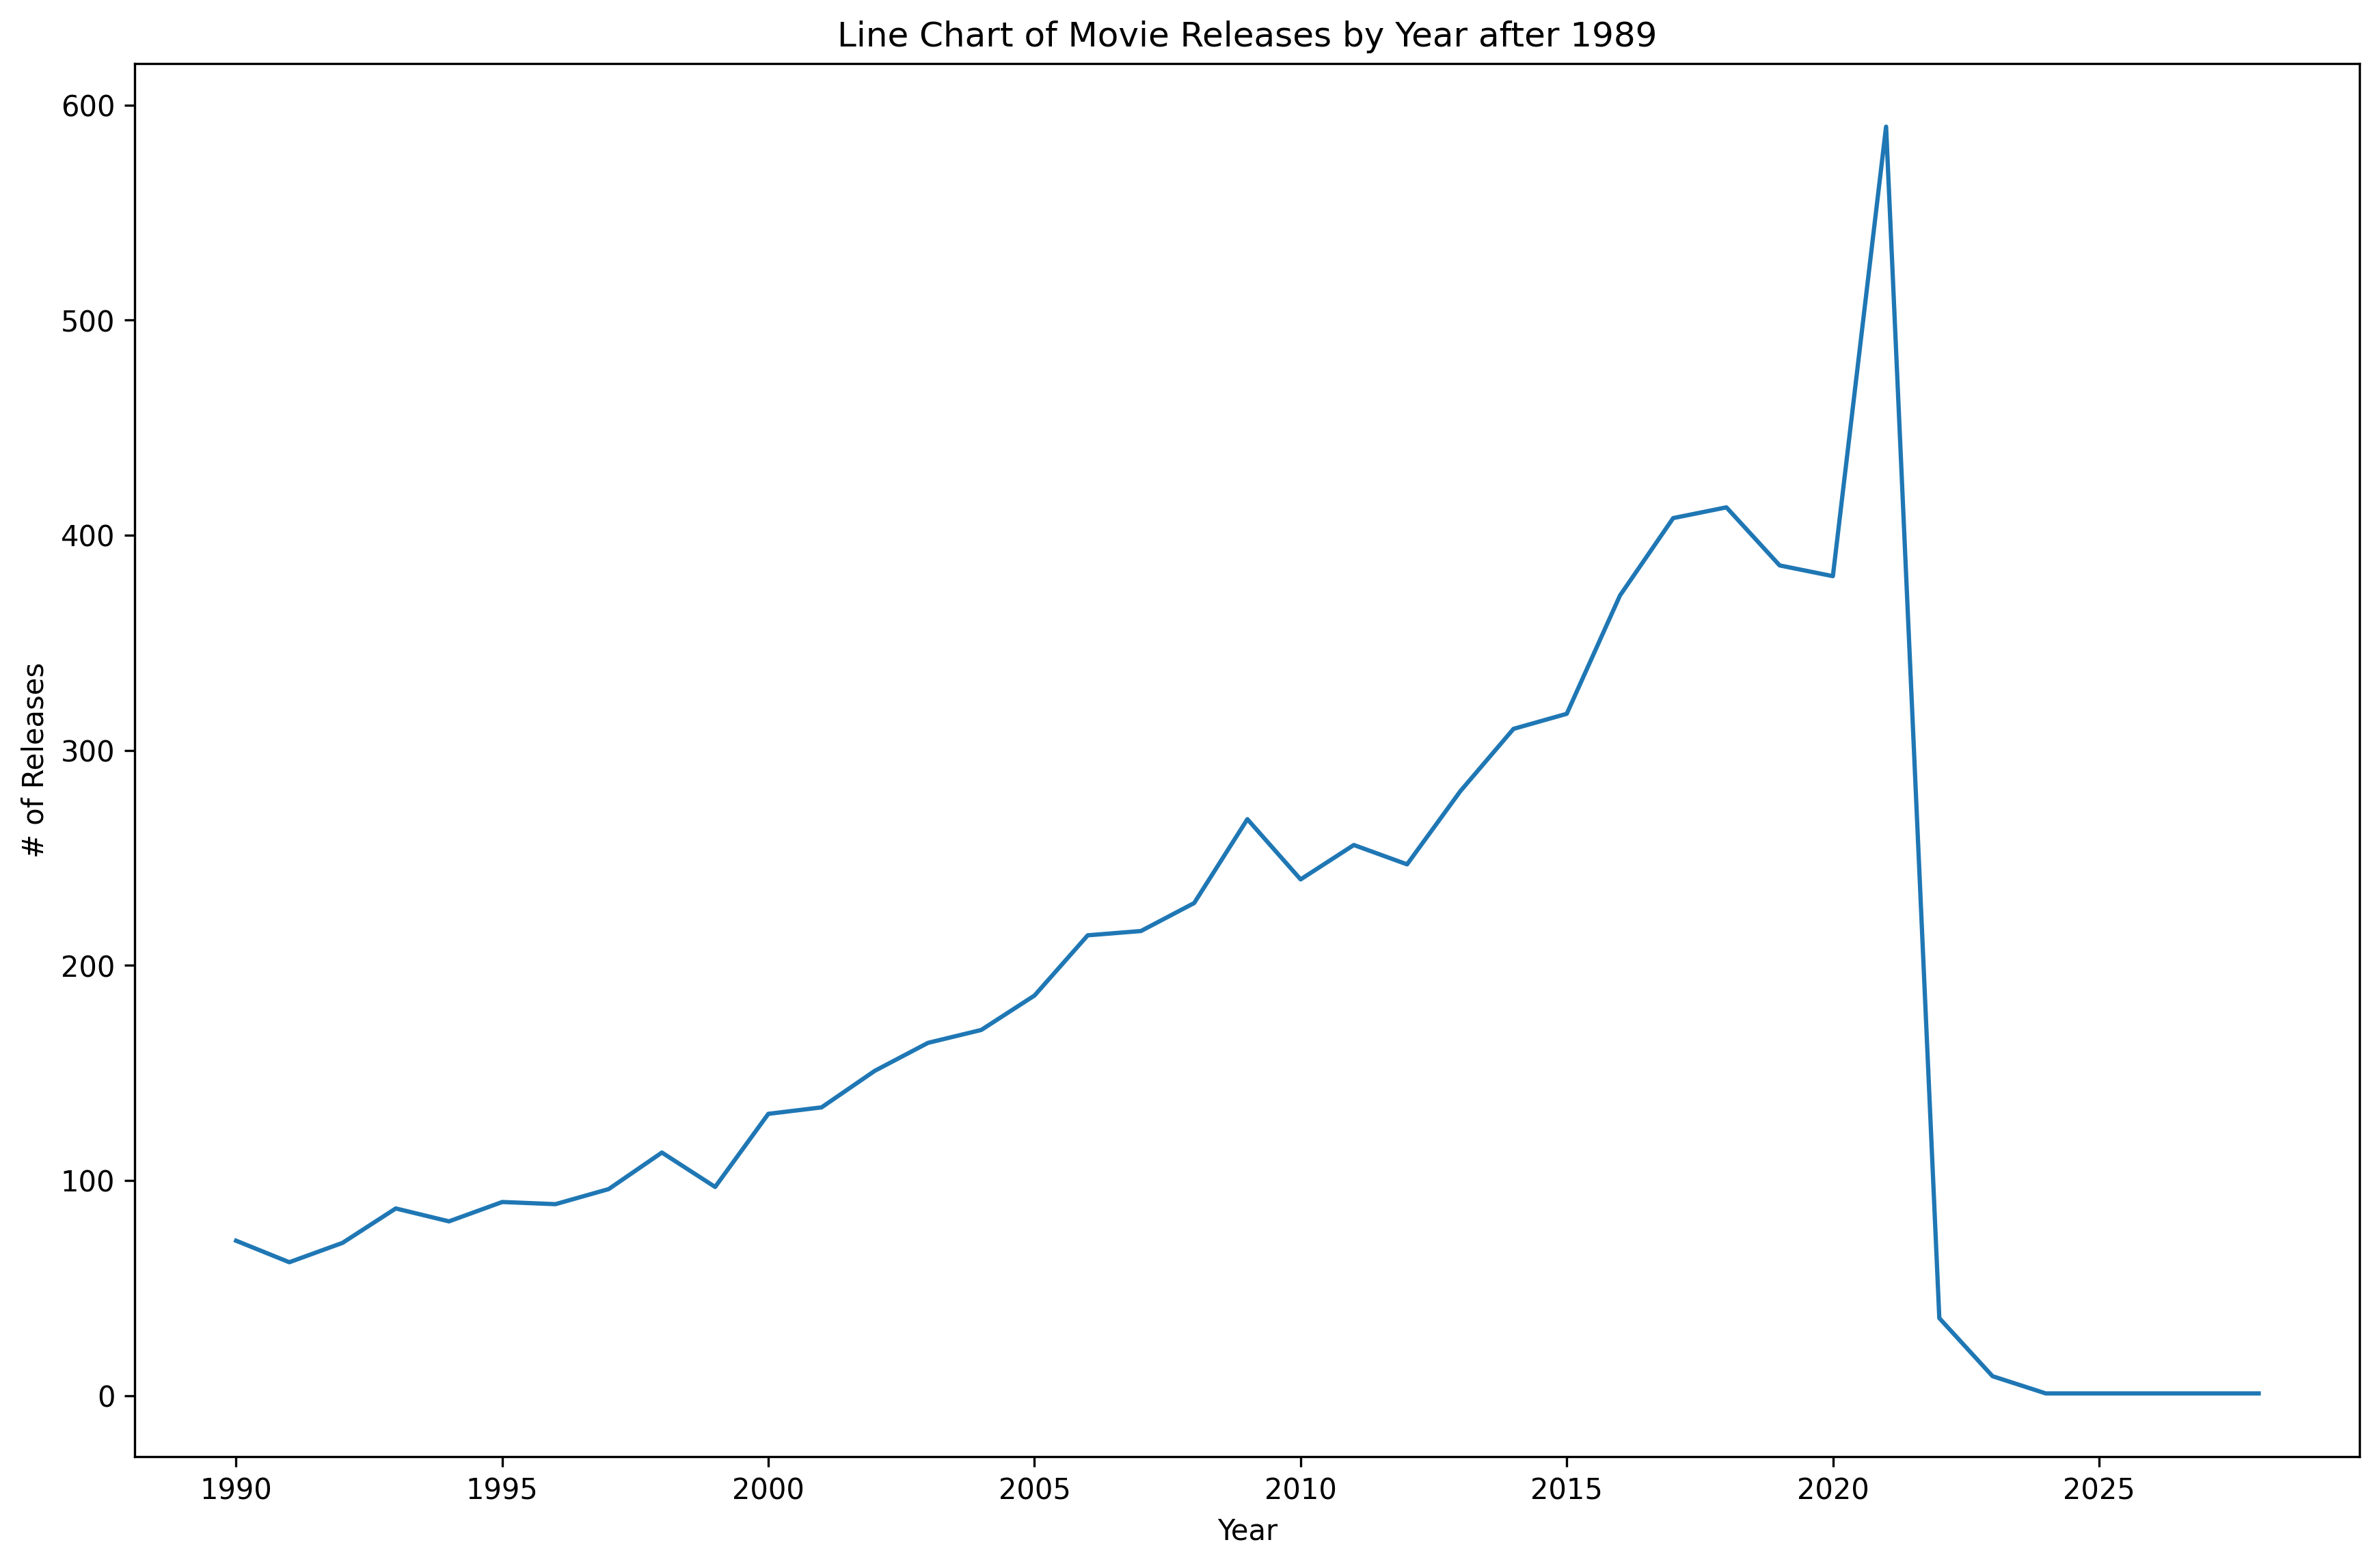

In [64]:
x = merged_rev_cas_df.groupby("year").size()
plt.figure(figsize=(14, 9), dpi=300)
x.plot(kind='line')
plt.xlabel("Year")
plt.ylabel("# of Releases")
plt.title("Line Chart of Movie Releases by Year after 1989")
plt.show()

In [65]:
merged_rev_cas_df['DayName'] = merged_rev_cas_df['release_date'].dt.day_name()
merged_rev_cas_df['month'] = merged_rev_cas_df['release_date'].dt.month

In [66]:
# merged_rev_cas_df[['year', 'DayName']].plot(kind='bar')

<AxesSubplot:ylabel='DayName'>

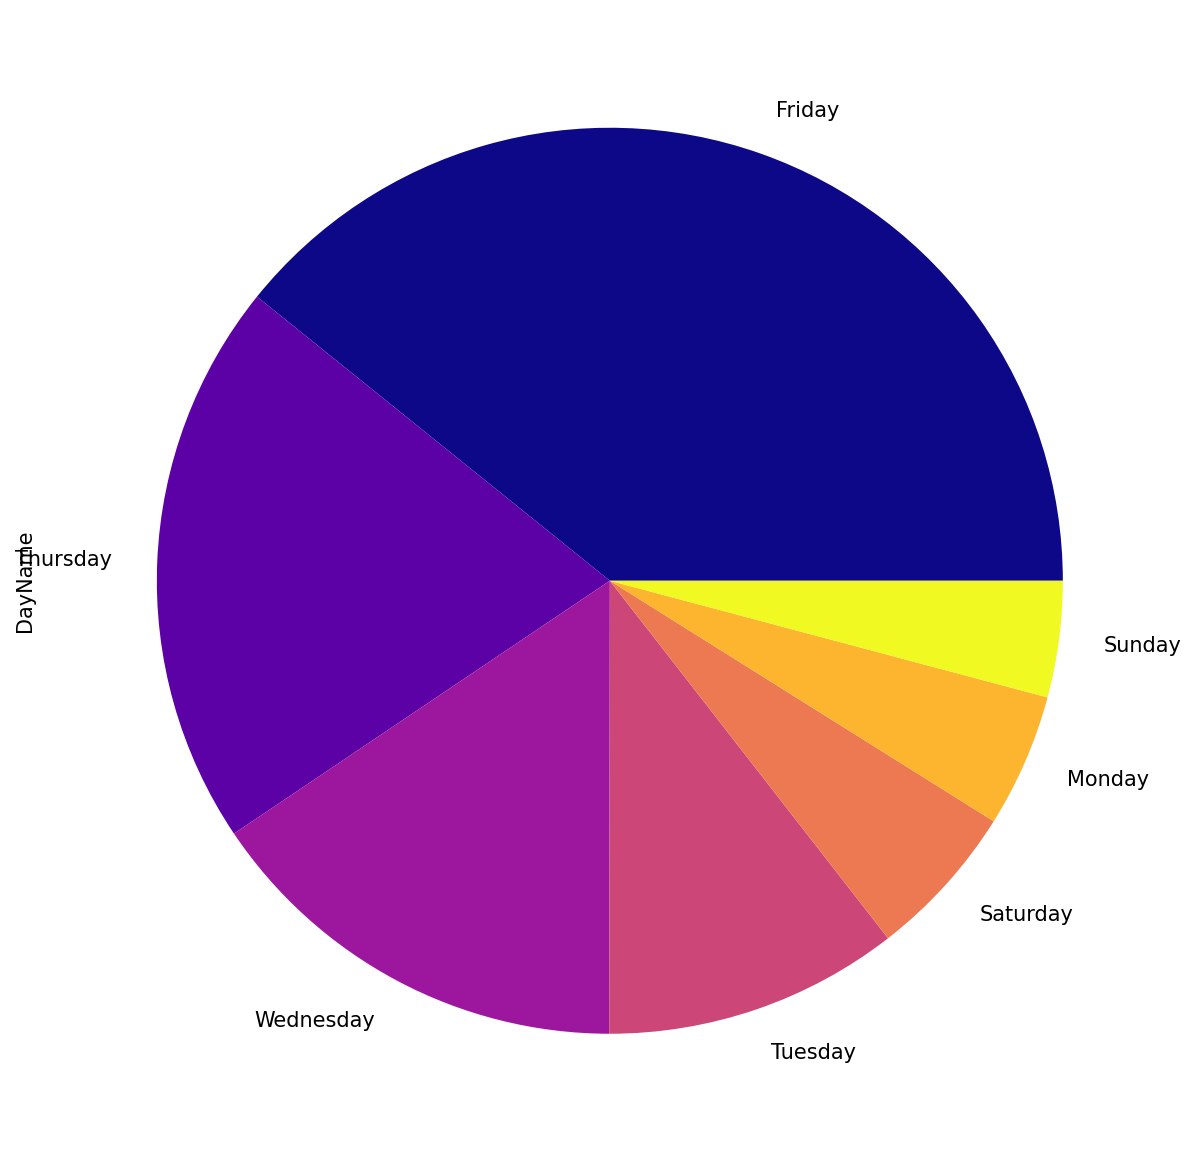

In [67]:
plt.figure(figsize=(10, 10), dpi=150)
merged_rev_cas_df['DayName'].value_counts().plot(kind='pie', cmap='plasma')

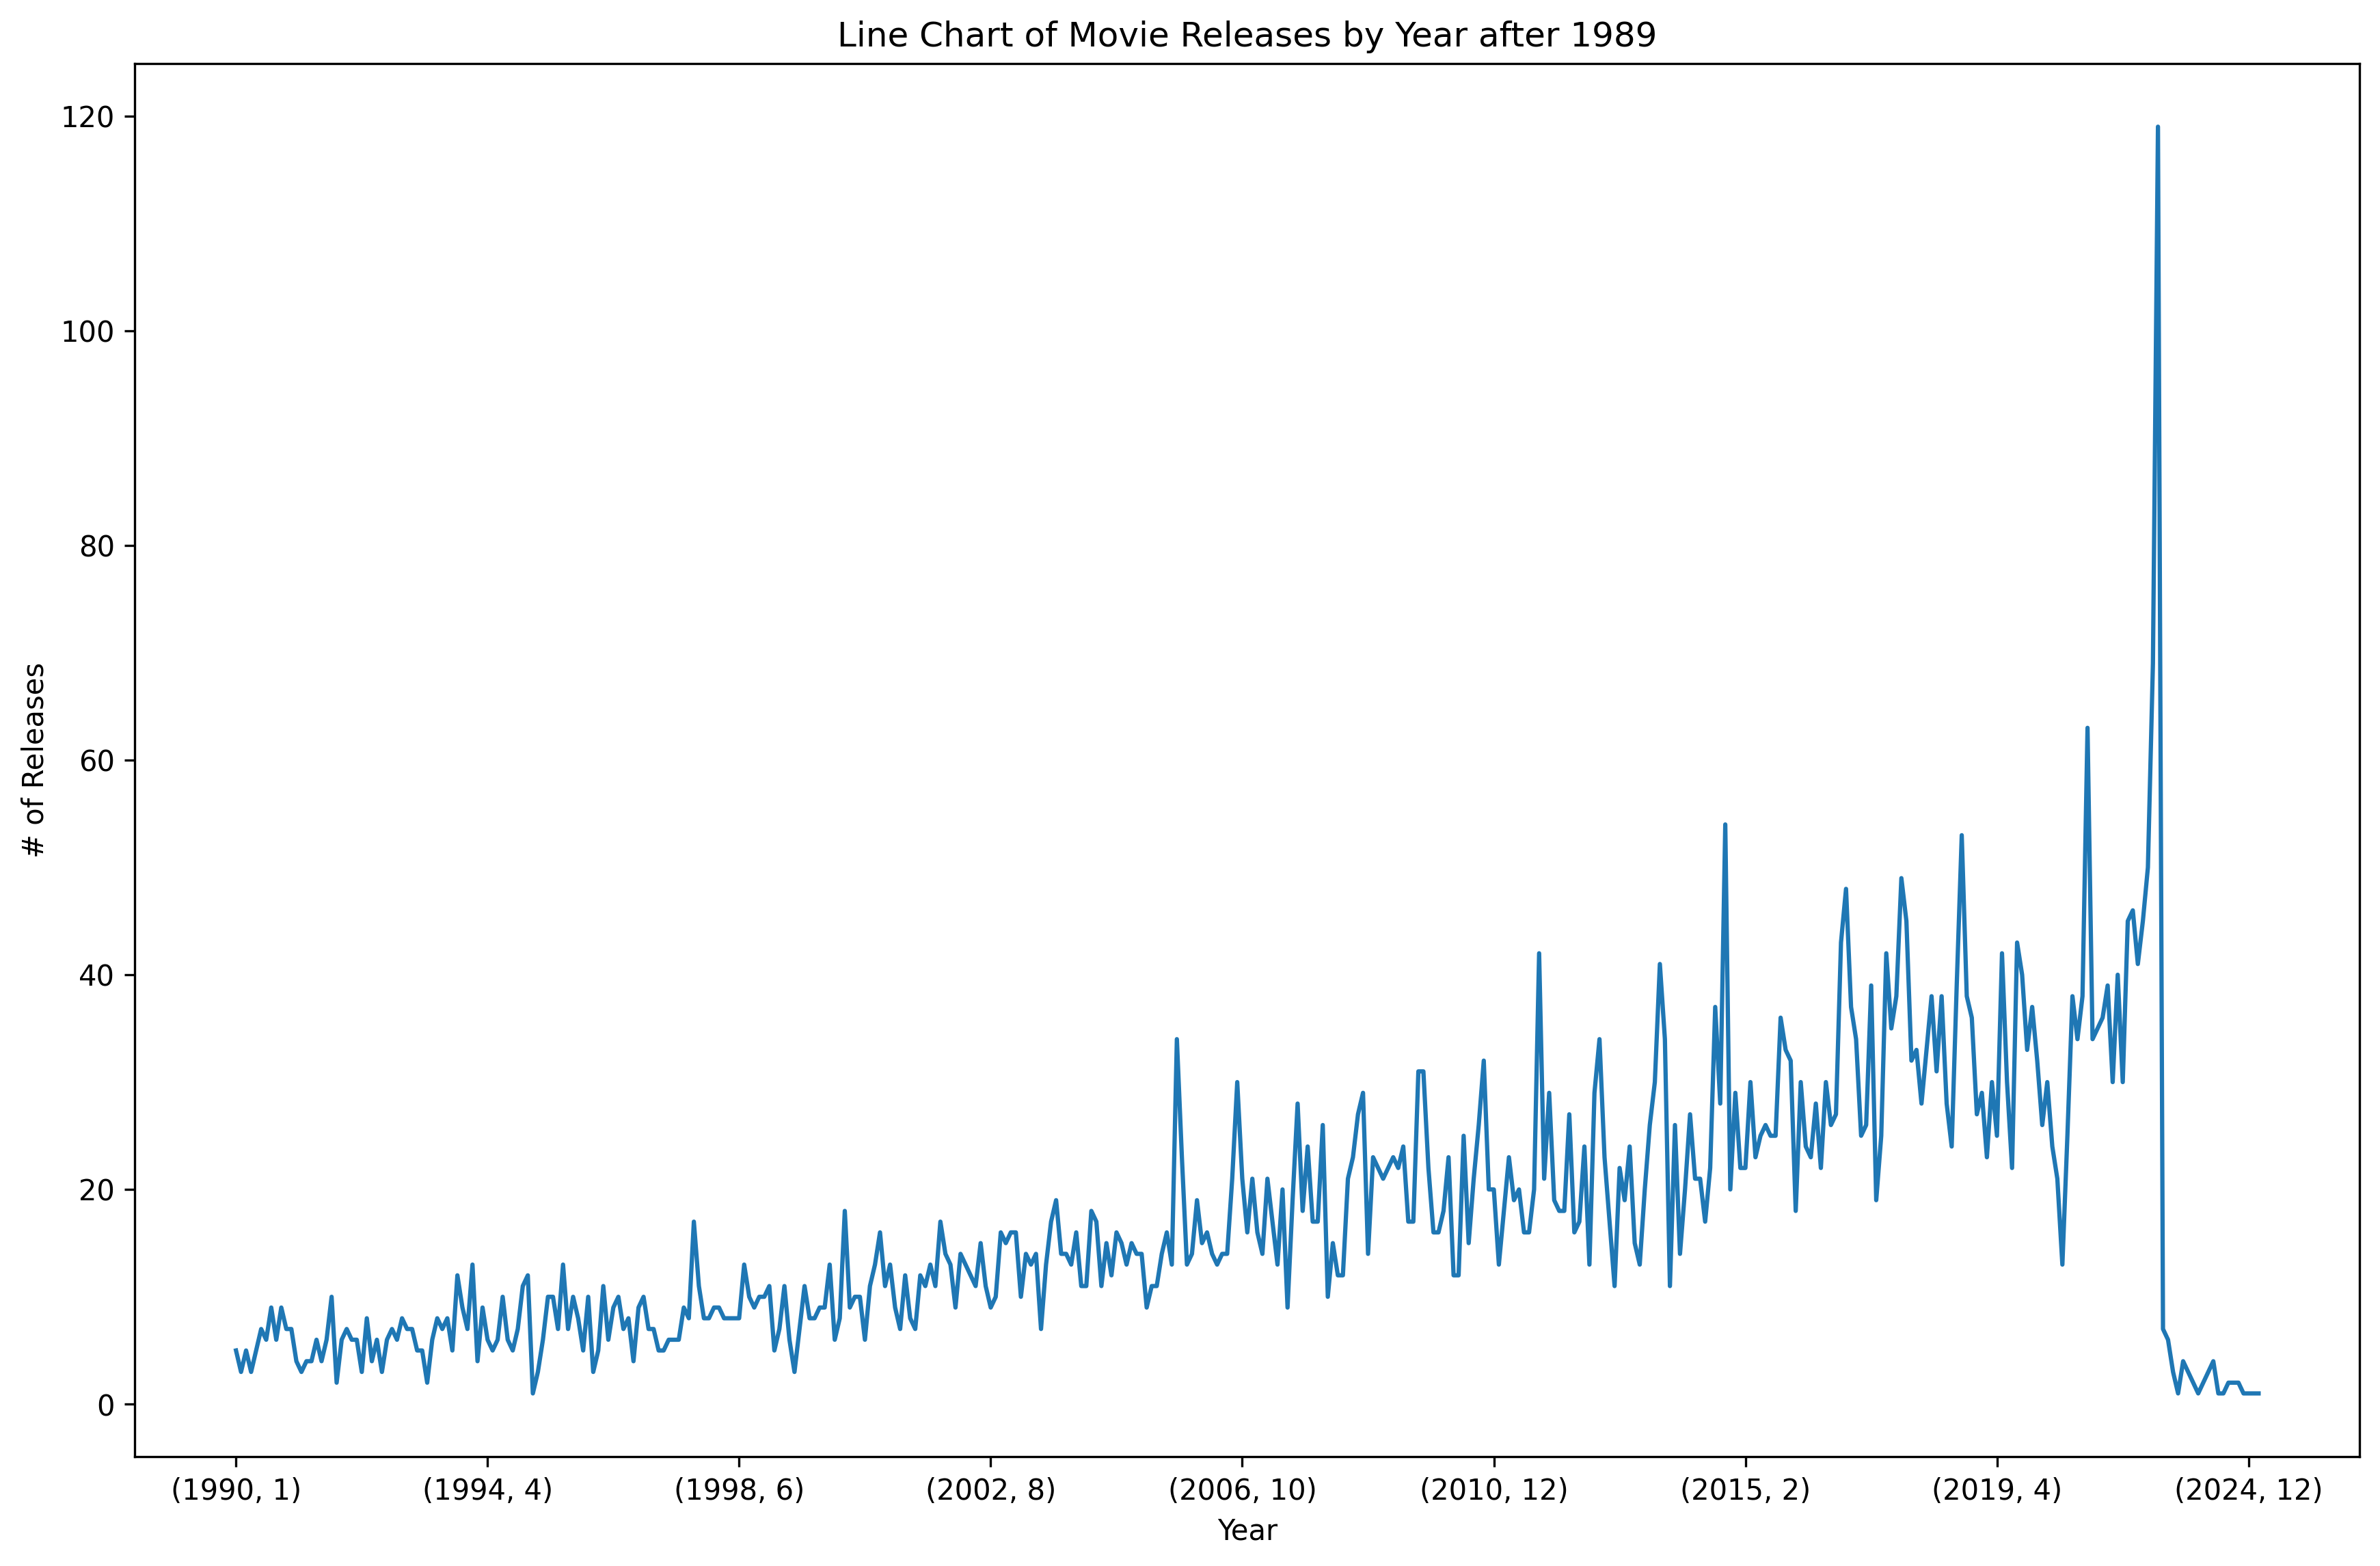

In [68]:
# threshYear = 2021
x1 = merged_rev_cas_df.groupby(['year', 'month']).size()
# x2 = merged_rev_cas_df[merged_rev_cas_df['year'] >= threshYear].groupby(['year', 'month']).size()
plt.figure(figsize=(14, 9), dpi=300)
x1.plot(kind='line')
# x2.plot(kind='line')
plt.xlabel("Year")
plt.ylabel("# of Releases")
plt.title("Line Chart of Movie Releases by Year after 1989")
plt.show()

In [69]:
merged_rev_cas_df.head(2)

,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,cast,crew,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Fiction,History,Horror,Movie,Music,Mystery,Romance,Science,TV,Thriller,War,Western,Allspark,Columbia Pictures,DreamWorks Animation,Metro-Goldwyn-Mayer,Others,Paramount,Sony Pictures,Universal Pictures,Walt Disney,Warner Bros. Pictures,Actor_1,Actor_1 Popularity,Actor_2,Actor_2 Popularity,Director,Director_Popularity,year,DayName,month
931,15000000.0,Crime | Drama,11060.0,en,Internal Affairs,13.215,Paramount,Canada | United States of America,1990-01-12,27734391.0,115.0,Released,Internal Affairs,6.3,257.0,Richard Gere | 7.525 | Andy García | 7.136,Mike Figgis | 1.544,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,Richard Gere,7.525,Andy García,7.136,Mike Figgis,1.544,1990,Friday,1
932,0.0,Horror,25018.0,en,Leatherface: The Texas Chainsaw Massacre III,19.071,Others,United States of America,1990-01-12,5765562.0,85.0,Released,Leatherface: The Texas Chainsaw Massacre III,5.3,332.0,Kate Hodge | 1.15 | Ken Foree | 1.4,Jeff Burr | 0.98,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,Kate Hodge,1.15,Ken Foree,1.4,Jeff Burr,0.98,1990,Friday,1


In [70]:
temp_pre_2022_df = merged_rev_cas_df[merged_rev_cas_df['release_date'] < '2020-12-21']

In [71]:
temp_pre_2022_df.head(2)

,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,cast,crew,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Fiction,History,Horror,Movie,Music,Mystery,Romance,Science,TV,Thriller,War,Western,Allspark,Columbia Pictures,DreamWorks Animation,Metro-Goldwyn-Mayer,Others,Paramount,Sony Pictures,Universal Pictures,Walt Disney,Warner Bros. Pictures,Actor_1,Actor_1 Popularity,Actor_2,Actor_2 Popularity,Director,Director_Popularity,year,DayName,month
931,15000000.0,Crime | Drama,11060.0,en,Internal Affairs,13.215,Paramount,Canada | United States of America,1990-01-12,27734391.0,115.0,Released,Internal Affairs,6.3,257.0,Richard Gere | 7.525 | Andy García | 7.136,Mike Figgis | 1.544,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,Richard Gere,7.525,Andy García,7.136,Mike Figgis,1.544,1990,Friday,1
932,0.0,Horror,25018.0,en,Leatherface: The Texas Chainsaw Massacre III,19.071,Others,United States of America,1990-01-12,5765562.0,85.0,Released,Leatherface: The Texas Chainsaw Massacre III,5.3,332.0,Kate Hodge | 1.15 | Ken Foree | 1.4,Jeff Burr | 0.98,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,Kate Hodge,1.15,Ken Foree,1.4,Jeff Burr,0.98,1990,Friday,1


In [72]:
temp_pre_2022_df[temp_pre_2022_df['revenue'] < 1].head(2)

,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,cast,crew,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Fiction,History,Horror,Movie,Music,Mystery,Romance,Science,TV,Thriller,War,Western,Allspark,Columbia Pictures,DreamWorks Animation,Metro-Goldwyn-Mayer,Others,Paramount,Sony Pictures,Universal Pictures,Walt Disney,Warner Bros. Pictures,Actor_1,Actor_1 Popularity,Actor_2,Actor_2 Popularity,Director,Director_Popularity,year,DayName,month
934,9000000.0,Horror,29514.0,en,Due occhi diabolici,9.788,Others,Italy | United States of America,1990-01-25,0.0,120.0,Released,Two Evil Eyes,6.0,161.0,Adrienne Barbeau | 9.214 | Harvey Keitel | 6.431,George A. Romero | 1.62,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,Adrienne Barbeau,9.214,Harvey Keitel,6.431,George A. Romero,1.62,1990,Thursday,1
937,0.0,Drama | Science Fiction,20815.0,en,The Handmaid's Tale,12.024,Others,Germany | United States of America,1990-02-15,0.0,108.0,Released,The Handmaid's Tale,6.0,151.0,Natasha Richardson | 2.85 | Faye Dunaway | 5.117,Volker Schlöndorff | 0.6940000000000001,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,Natasha Richardson,2.85,Faye Dunaway,5.117,Volker Schlöndorff,0.6940000000000001,1990,Thursday,2


In [73]:
temp_pre_2022_df[(temp_pre_2022_df['budget'] < 1) & (temp_pre_2022_df['revenue'] < 1)].head(2)

,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,cast,crew,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Fiction,History,Horror,Movie,Music,Mystery,Romance,Science,TV,Thriller,War,Western,Allspark,Columbia Pictures,DreamWorks Animation,Metro-Goldwyn-Mayer,Others,Paramount,Sony Pictures,Universal Pictures,Walt Disney,Warner Bros. Pictures,Actor_1,Actor_1 Popularity,Actor_2,Actor_2 Popularity,Director,Director_Popularity,year,DayName,month
937,0.0,Drama | Science Fiction,20815.0,en,The Handmaid's Tale,12.024,Others,Germany | United States of America,1990-02-15,0.0,108.0,Released,The Handmaid's Tale,6.0,151.0,Natasha Richardson | 2.85 | Faye Dunaway | 5.117,Volker Schlöndorff | 0.6940000000000001,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,Natasha Richardson,2.85,Faye Dunaway,5.117,Volker Schlöndorff,0.6940000000000001,1990,Thursday,2
947,0.0,TV Movie | Comedy,52304.0,en,Archie: To Riverdale and Back Again,15.772,Others,United States of America,1990-05-06,0.0,100.0,Released,Archie: To Riverdale and Back Again,7.5,22.0,Christopher Rich | 5.012 | Lauren Holly | 5.091,Dick Lowry | 1.389,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,Christopher Rich,5.012,Lauren Holly,5.091,Dick Lowry,1.389,1990,Sunday,5


In [74]:
corrected_df = pd.read_csv("./pre_2021_zero_budget_zero_revenue_filled.csv")

In [75]:
corrected_df.head(2)

,budget,id,original_title,overview,popularity,production_companies,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science,TV,Thriller,War,Western,Fiction,Movie,Allspark,Columbia Pictures,DreamWorks Animation,Metro-Goldwyn-Mayer,Others,Paramount,Sony Pictures,Universal Pictures,Walt Disney,Warner Bros. Pictures,Actor_1,Actor_1 Popularity,Actor_2,Actor_2 Popularity,Director,Director_Popularity
0,509000,36208,A Dog's Life,The Tramp and his dog companion struggle to su...,8.702,Others,1918-04-14,891000,34,Released,In his First Million Dollar Picture,A Dog's Life,7.4,216,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,Charlie Chaplin,6.774,Edna Purviance,1.40,Charlie Chaplin,6.774
1,0,992,Sherlock Jr.,"A film projectionist longs to be a detective, ...",11.103,Others,1924-04-17,448337,45,Released,Every inch of footage holds such a laugh!,Sherlock Jr.,8.2,610,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,Buster Keaton,2.766,Kathryn McGuire,0.98,Buster Keaton,2.766


In [76]:
merged_rev_cas_df.drop(
    columns = list(set(merged_rev_cas_df.columns).difference(set(corrected_df.columns))),
    inplace=True
)

In [77]:
def replace_str_dollars_to_float(amount):
#     print(amount)
    try:
        return float(sub(r'[^\d.]', '', amount))
    except:
        return 0

In [78]:
merged_rev_cas_df.columns

Index(['budget', 'id', 'original_title', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'status', 'title', 'vote_average',
       'vote_count', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Fiction', 'History',
       'Horror', 'Movie', 'Music', 'Mystery', 'Romance', 'Science', 'TV',
       'Thriller', 'War', 'Western', 'Allspark', 'Columbia Pictures',
       'DreamWorks Animation', 'Metro-Goldwyn-Mayer', 'Others', 'Paramount',
       'Sony Pictures', 'Universal Pictures', 'Walt Disney',
       'Warner Bros. Pictures', 'Actor_1', 'Actor_1 Popularity', 'Actor_2',
       'Actor_2 Popularity', 'Director', 'Director_Popularity'],
      dtype='object')

In [79]:
corrected_df['budget'] = corrected_df['budget'].apply(replace_str_dollars_to_float)
corrected_df['revenue'] = corrected_df['revenue'].apply(replace_str_dollars_to_float)

In [80]:
merged_rev_cas_df_2 = pd.concat([merged_rev_cas_df, corrected_df], axis=0)

In [81]:
merged_rev_cas_df_2.drop_duplicates(subset='id', keep='last', inplace=True)

In [82]:
merged_rev_cas_df_2.isna().sum()

budget                      0
id                          0
original_title              0
popularity                  0
production_companies        0
release_date                0
revenue                     0
runtime                     0
status                      0
title                       0
vote_average                0
vote_count                  0
Action                      0
Adventure                   0
Animation                   0
Comedy                      0
Crime                       0
Documentary                 0
Drama                       0
Family                      0
Fantasy                     0
Fiction                     0
History                     0
Horror                      0
Movie                       0
Music                       0
Mystery                     0
Romance                     0
Science                     0
TV                          0
Thriller                    0
War                         0
Western                     0
Allspark  

In [83]:
merged_rev_cas_df_2.rename(columns={'Science': 'Sci-Fi'}, inplace=True)
merged_rev_cas_df_2.drop(columns=[
    "TV", "Fiction", "overview", "tagline"
], inplace=True)

In [84]:
merged_rev_cas_df_2.dropna(how='any', inplace=True)

In [85]:
profile = ProfileReport(merged_rev_cas_df_2, title="Movie Data Report", explorative=True)

In [86]:
profile.to_file("movie_cleaned.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [87]:
merged_rev_cas_df_2.head(2)

,budget,id,original_title,popularity,production_companies,release_date,revenue,runtime,status,title,vote_average,vote_count,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Movie,Music,Mystery,Romance,Sci-Fi,Thriller,War,Western,Allspark,Columbia Pictures,DreamWorks Animation,Metro-Goldwyn-Mayer,Others,Paramount,Sony Pictures,Universal Pictures,Walt Disney,Warner Bros. Pictures,Actor_1,Actor_1 Popularity,Actor_2,Actor_2 Popularity,Director,Director_Popularity
931,15000000.0,11060.0,Internal Affairs,13.215,Paramount,1990-01-12 00:00:00,27734391.0,115.0,Released,Internal Affairs,6.3,257.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,Richard Gere,7.525,Andy García,7.136,Mike Figgis,1.544
932,0.0,25018.0,Leatherface: The Texas Chainsaw Massacre III,19.071,Others,1990-01-12 00:00:00,5765562.0,85.0,Released,Leatherface: The Texas Chainsaw Massacre III,5.3,332.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,Kate Hodge,1.15,Ken Foree,1.4,Jeff Burr,0.98


In [88]:
merged_rev_cas_df_2.replace('(^\s+|\s+$)', '', regex=True, inplace=True)

In [89]:
merged_rev_cas_df_2 = merged_rev_cas_df_2.infer_objects()

In [90]:
merged_rev_cas_df_2['release_date'] = pd.to_datetime(merged_rev_cas_df_2['release_date'])

In [91]:
merged_rev_cas_df_2['Actor_1 Popularity'] = merged_rev_cas_df_2['Actor_1 Popularity'].astype(float)
merged_rev_cas_df_2['Actor_2 Popularity'] = merged_rev_cas_df_2['Actor_2 Popularity'].astype(float)
merged_rev_cas_df_2['Director_Popularity'] = merged_rev_cas_df_2['Director_Popularity'].astype(float)

In [92]:
merged_rev_cas_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6984 entries, 931 to 1649
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   budget                 6984 non-null   float64       
 1   id                     6984 non-null   float64       
 2   original_title         6984 non-null   object        
 3   popularity             6984 non-null   float64       
 4   production_companies   6984 non-null   object        
 5   release_date           6984 non-null   datetime64[ns]
 6   revenue                6984 non-null   float64       
 7   runtime                6984 non-null   float64       
 8   status                 6984 non-null   object        
 9   title                  6984 non-null   object        
 10  vote_average           6984 non-null   float64       
 11  vote_count             6984 non-null   float64       
 12  Action                 6984 non-null   int64         
 13  A

In [93]:
merged_rev_cas_df_2.dropna(how='any', inplace=True)

In [94]:
merged_rev_cas_df_2.head()

,budget,id,original_title,popularity,production_companies,release_date,revenue,runtime,status,title,vote_average,vote_count,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Movie,Music,Mystery,Romance,Sci-Fi,Thriller,War,Western,Allspark,Columbia Pictures,DreamWorks Animation,Metro-Goldwyn-Mayer,Others,Paramount,Sony Pictures,Universal Pictures,Walt Disney,Warner Bros. Pictures,Actor_1,Actor_1 Popularity,Actor_2,Actor_2 Popularity,Director,Director_Popularity
931,15000000.0,11060.0,Internal Affairs,13.215,Paramount,1990-01-12,27734391.0,115.0,Released,Internal Affairs,6.3,257.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,Richard Gere,7.525,Andy García,7.136,Mike Figgis,1.544
932,0.0,25018.0,Leatherface: The Texas Chainsaw Massacre III,19.071,Others,1990-01-12,5765562.0,85.0,Released,Leatherface: The Texas Chainsaw Massacre III,5.3,332.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,Kate Hodge,1.150,Ken Foree,1.400,Jeff Burr,0.980
933,11000000.0,9362.0,Tremors,24.523,Universal Pictures,1990-01-19,48572000.0,96.0,Released,Tremors,6.8,2422.0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,Kevin Bacon,8.082,Fred Ward,5.117,Ron Underwood,3.085
934,9000000.0,29514.0,Due occhi diabolici,9.788,Others,1990-01-25,0.0,120.0,Released,Two Evil Eyes,6.0,161.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,Adrienne Barbeau,9.214,Harvey Keitel,6.431,George A. Romero,1.620
935,7000000.0,19384.0,Dark Angel,8.529,Others,1990-01-26,9229401.0,91.0,Released,Dark Angel,6.0,197.0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,Dolph Lundgren,12.278,Brian Benben,1.960,Craig R. Baxley,1.960


In [95]:
merged_rev_cas_df_2['year'] = merged_rev_cas_df_2['release_date'].dt.year

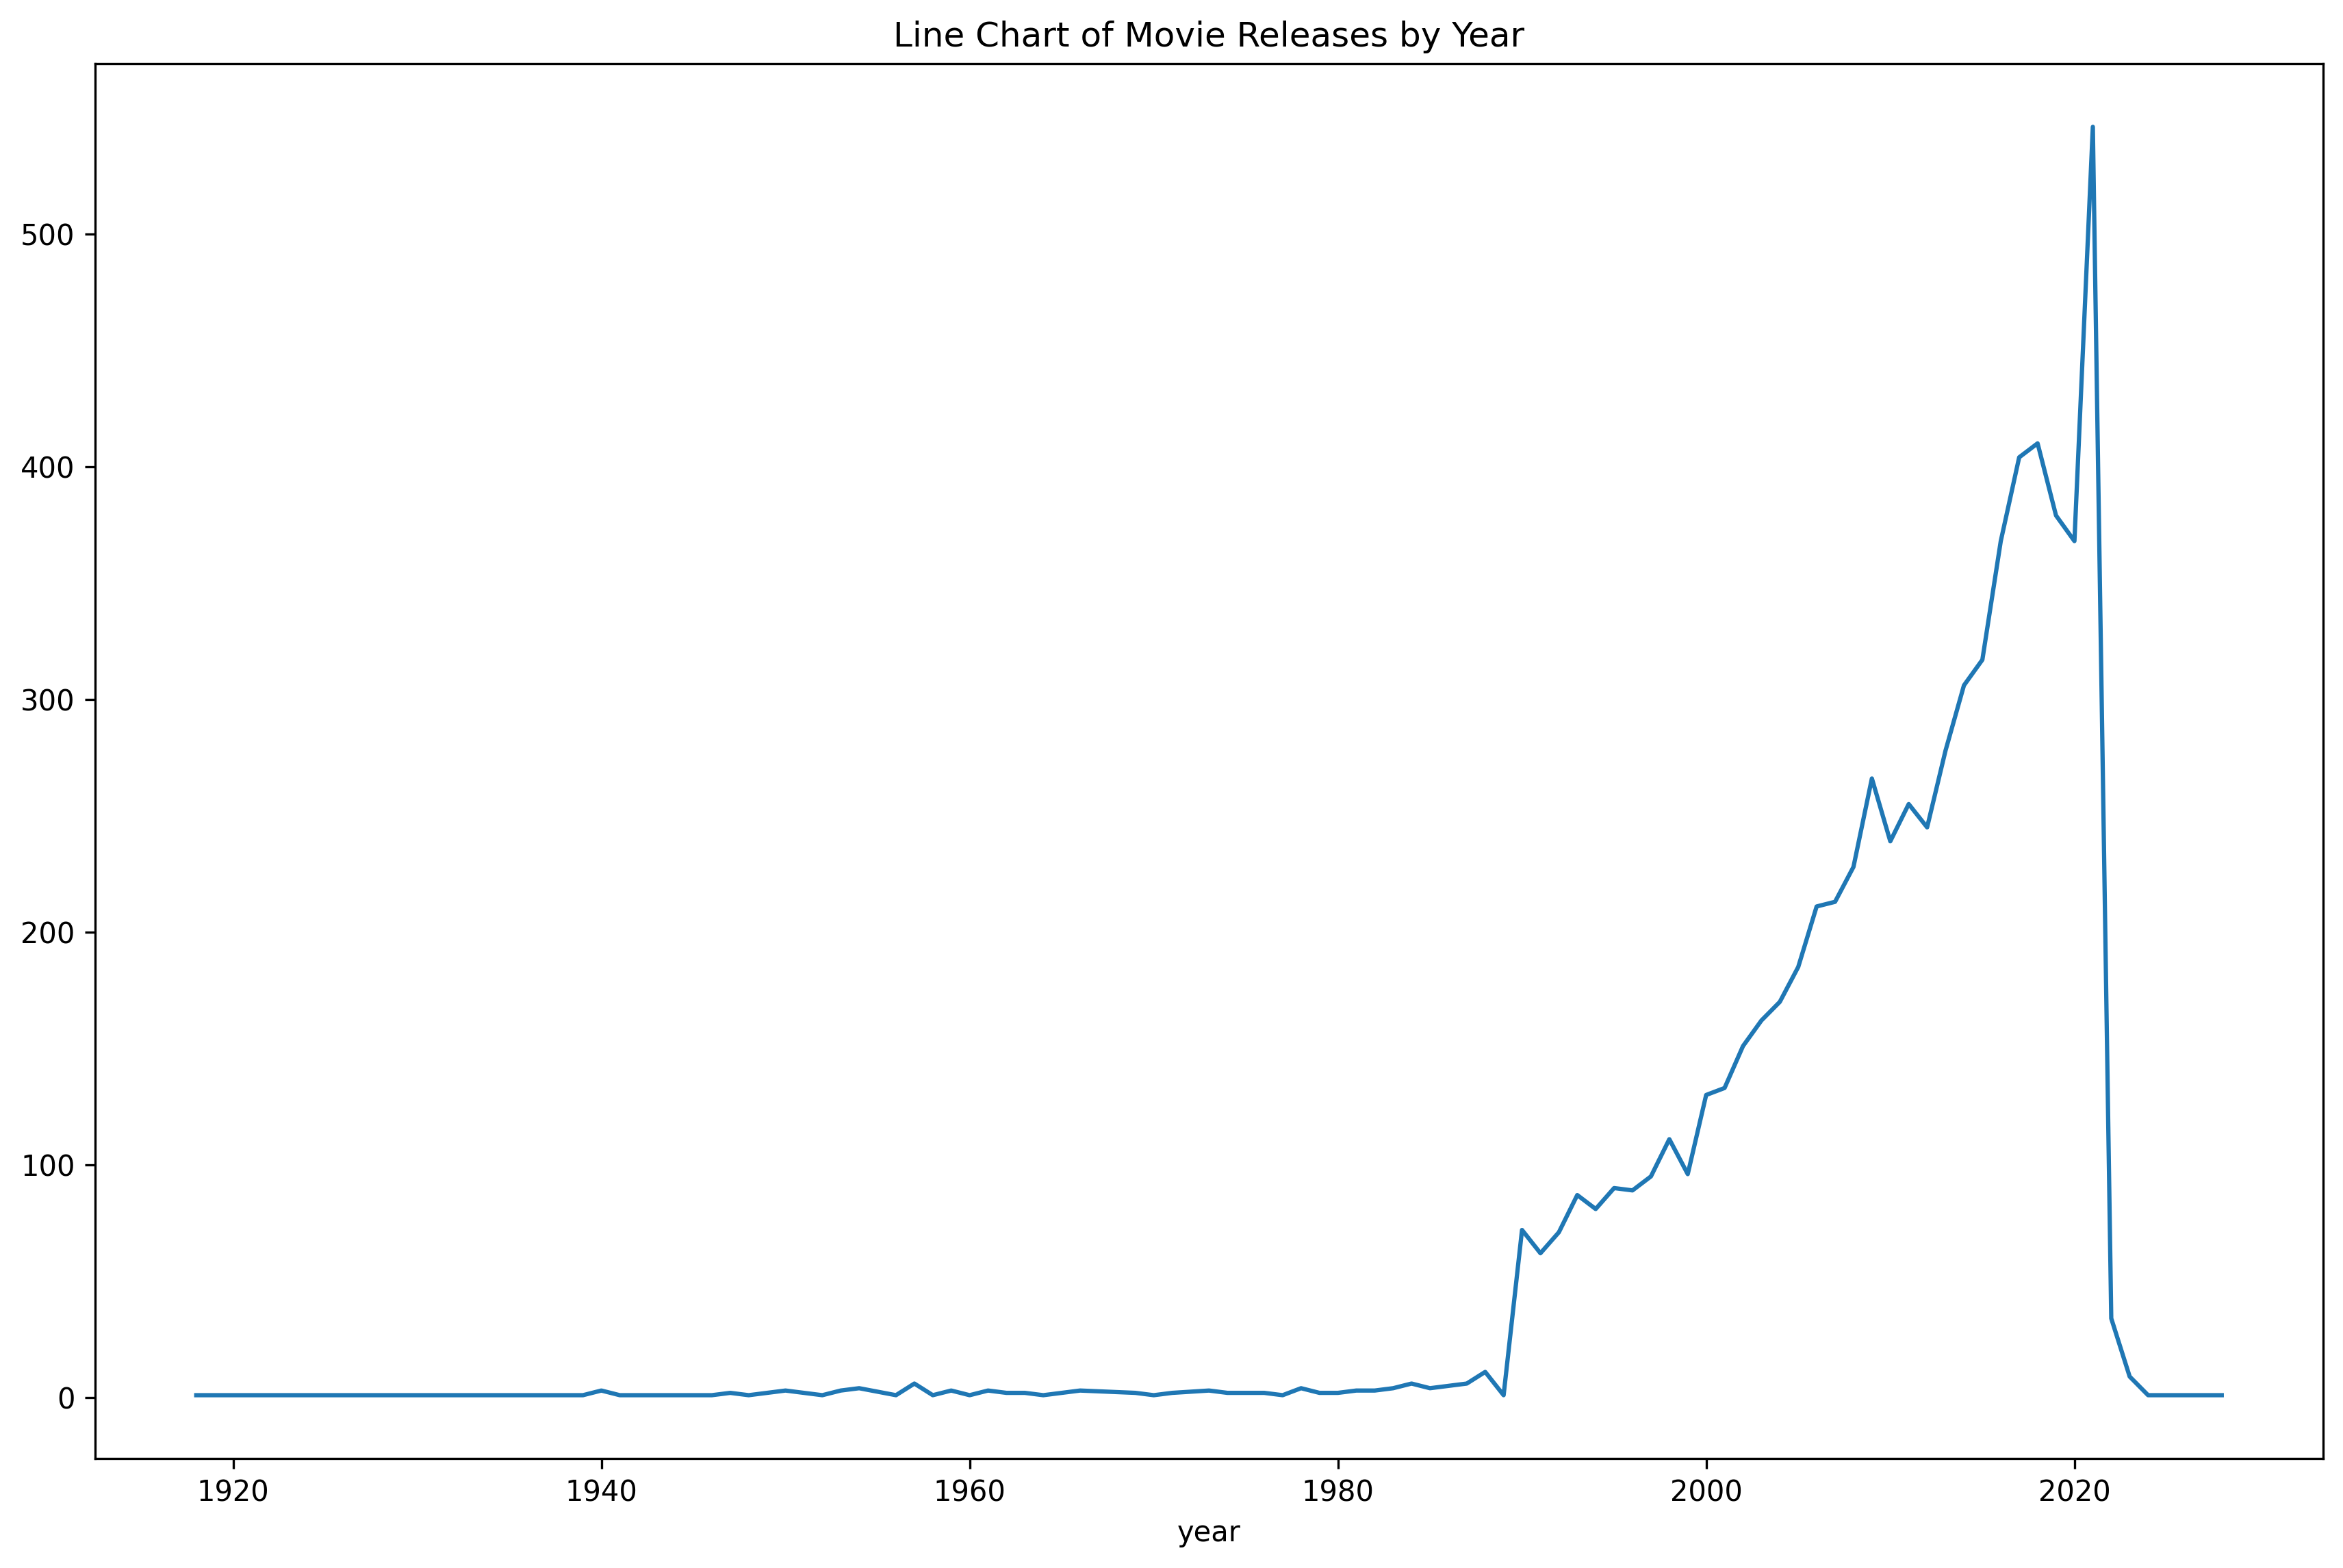

In [96]:
x = merged_rev_cas_df_2.groupby("year").size()
plt.figure(figsize=(14, 9), dpi=300)
plt.title("Line Chart of Movie Releases by Year")
x.plot(kind='line')
plt.show()

In [97]:
model_df = merged_rev_cas_df_2.copy()

<AxesSubplot:>

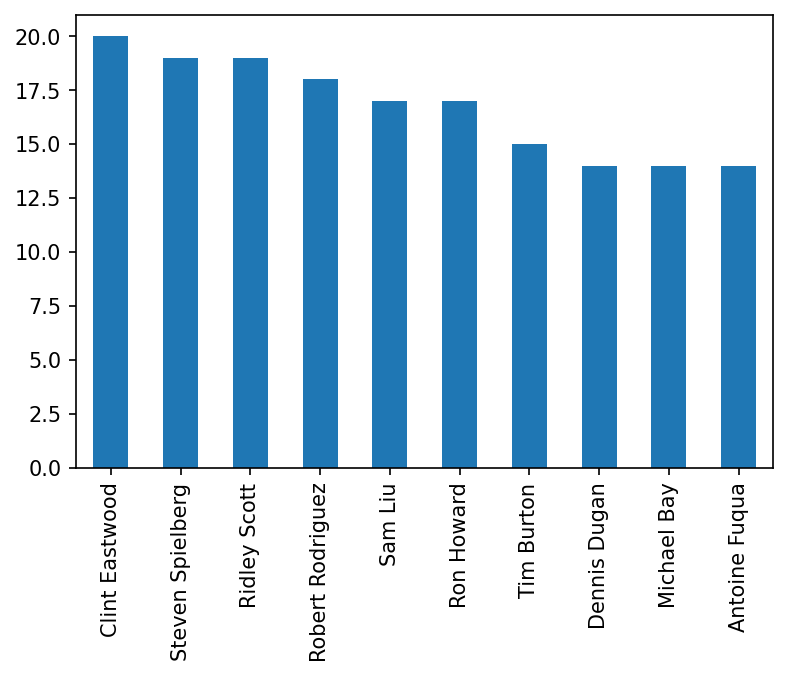

In [98]:
plt.figure(dpi=150)
model_df['Director'].value_counts()[0:10].plot(kind='bar')

In [99]:
model_df.columns

Index(['budget', 'id', 'original_title', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'status', 'title', 'vote_average',
       'vote_count', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Movie', 'Music', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western', 'Allspark', 'Columbia Pictures', 'DreamWorks Animation',
       'Metro-Goldwyn-Mayer', 'Others', 'Paramount', 'Sony Pictures',
       'Universal Pictures', 'Walt Disney', 'Warner Bros. Pictures', 'Actor_1',
       'Actor_1 Popularity', 'Actor_2', 'Actor_2 Popularity', 'Director',
       'Director_Popularity', 'year'],
      dtype='object')

In [100]:
model_df.drop(columns=[
    "id", "original_title", "production_companies", "release_date", "status",
    "title", "Actor_1", "Actor_2", "Director", "original_title",
    "production_companies", "release_date"
], inplace=True)

In [101]:
train = model_df[model_df['year'] < 2022]

In [102]:
train.columns

Index(['budget', 'popularity', 'revenue', 'runtime', 'vote_average',
       'vote_count', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Movie', 'Music', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western', 'Allspark', 'Columbia Pictures', 'DreamWorks Animation',
       'Metro-Goldwyn-Mayer', 'Others', 'Paramount', 'Sony Pictures',
       'Universal Pictures', 'Walt Disney', 'Warner Bros. Pictures',
       'Actor_1 Popularity', 'Actor_2 Popularity', 'Director_Popularity',
       'year'],
      dtype='object')

In [103]:
import statsmodels.api as sm
from optimalflow.autoFS import dynaFS_reg, dynaFS_clf

In [104]:
from pycaret.regression import *

In [105]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

### Task list

1. Remove outliers based on 95 percentile revenue.
2. Calculate the mean revenue/budget.
3. Define success as revenue that is greater than avg revenue/budget.
4. success is considered as a binary variable (0 or 1).

In [106]:
data = model_df[(model_df['revenue'] > 0)&(model_df['budget'] > 1)]

In [107]:
data['budget'] = data['budget'].astype(float)
data['revenue'] = data['revenue'].astype(float)

In [108]:
data_2 = data.copy()
data_2 = data_2[data_2['revenue'] < np.quantile(data['revenue'], 0.95)]

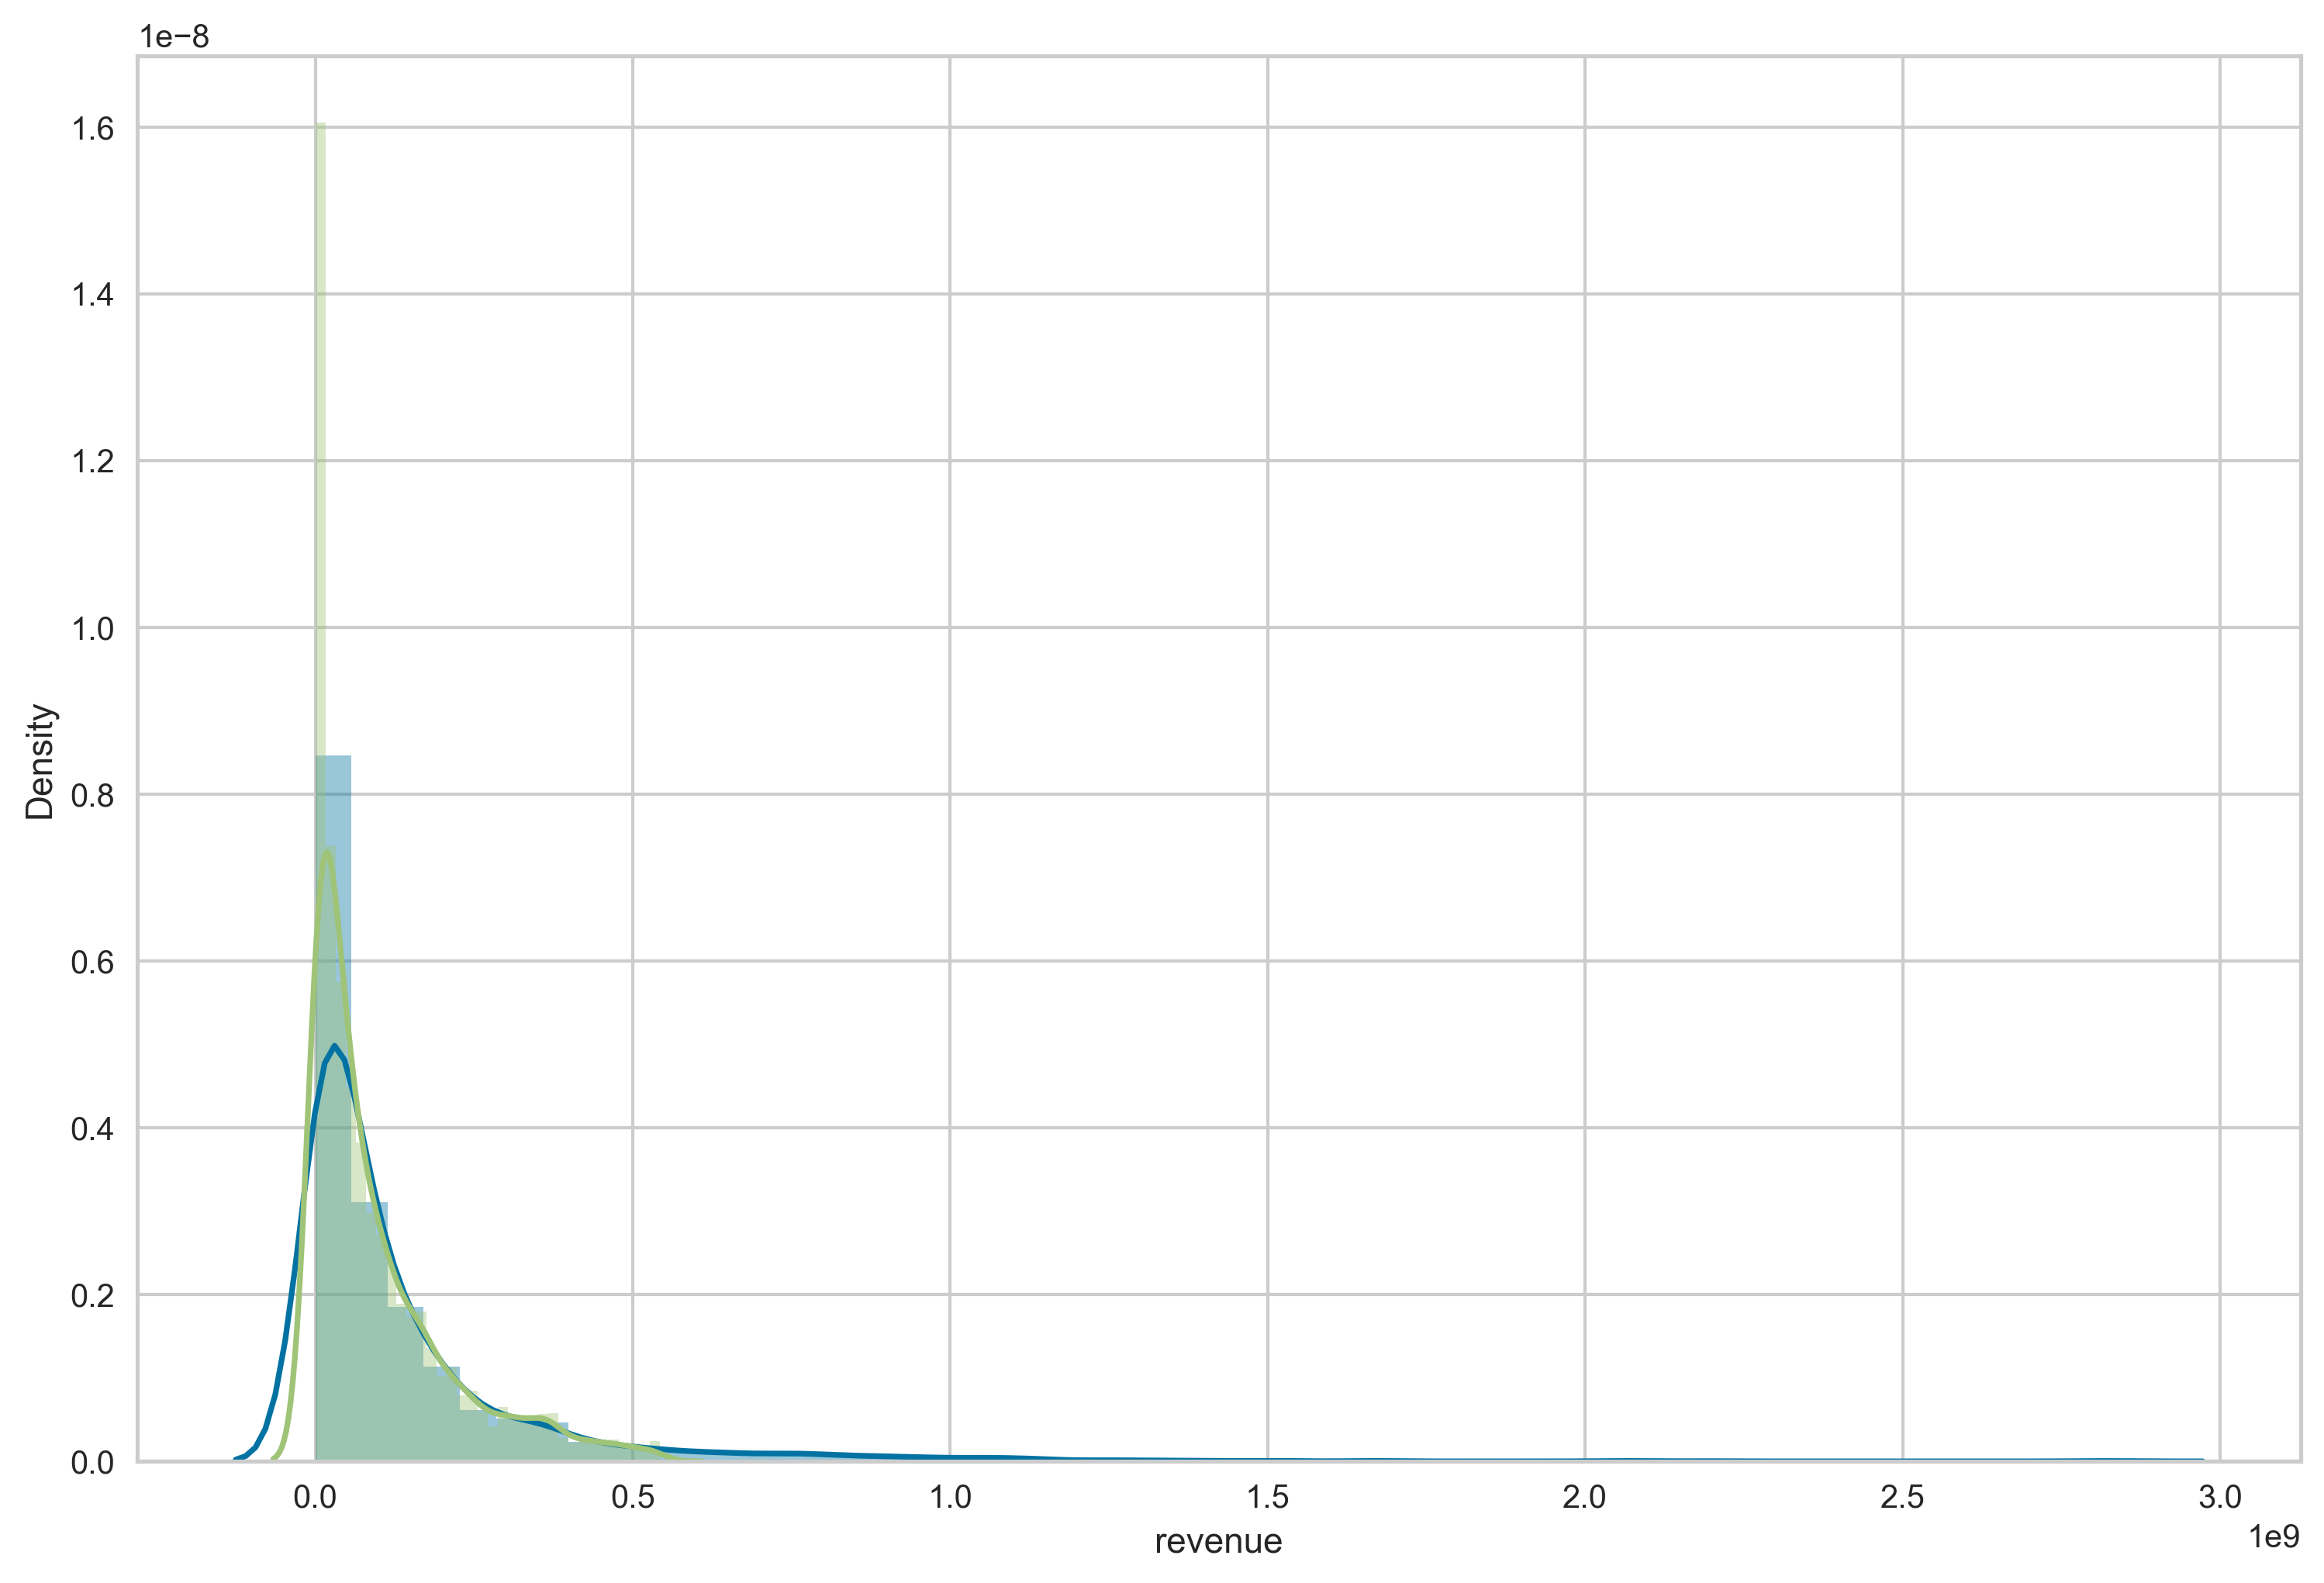

In [109]:
plt.figure(figsize=(12, 8), dpi=300)
sns.distplot(data['revenue'])
sns.distplot(data_2['revenue'])
plt.show()

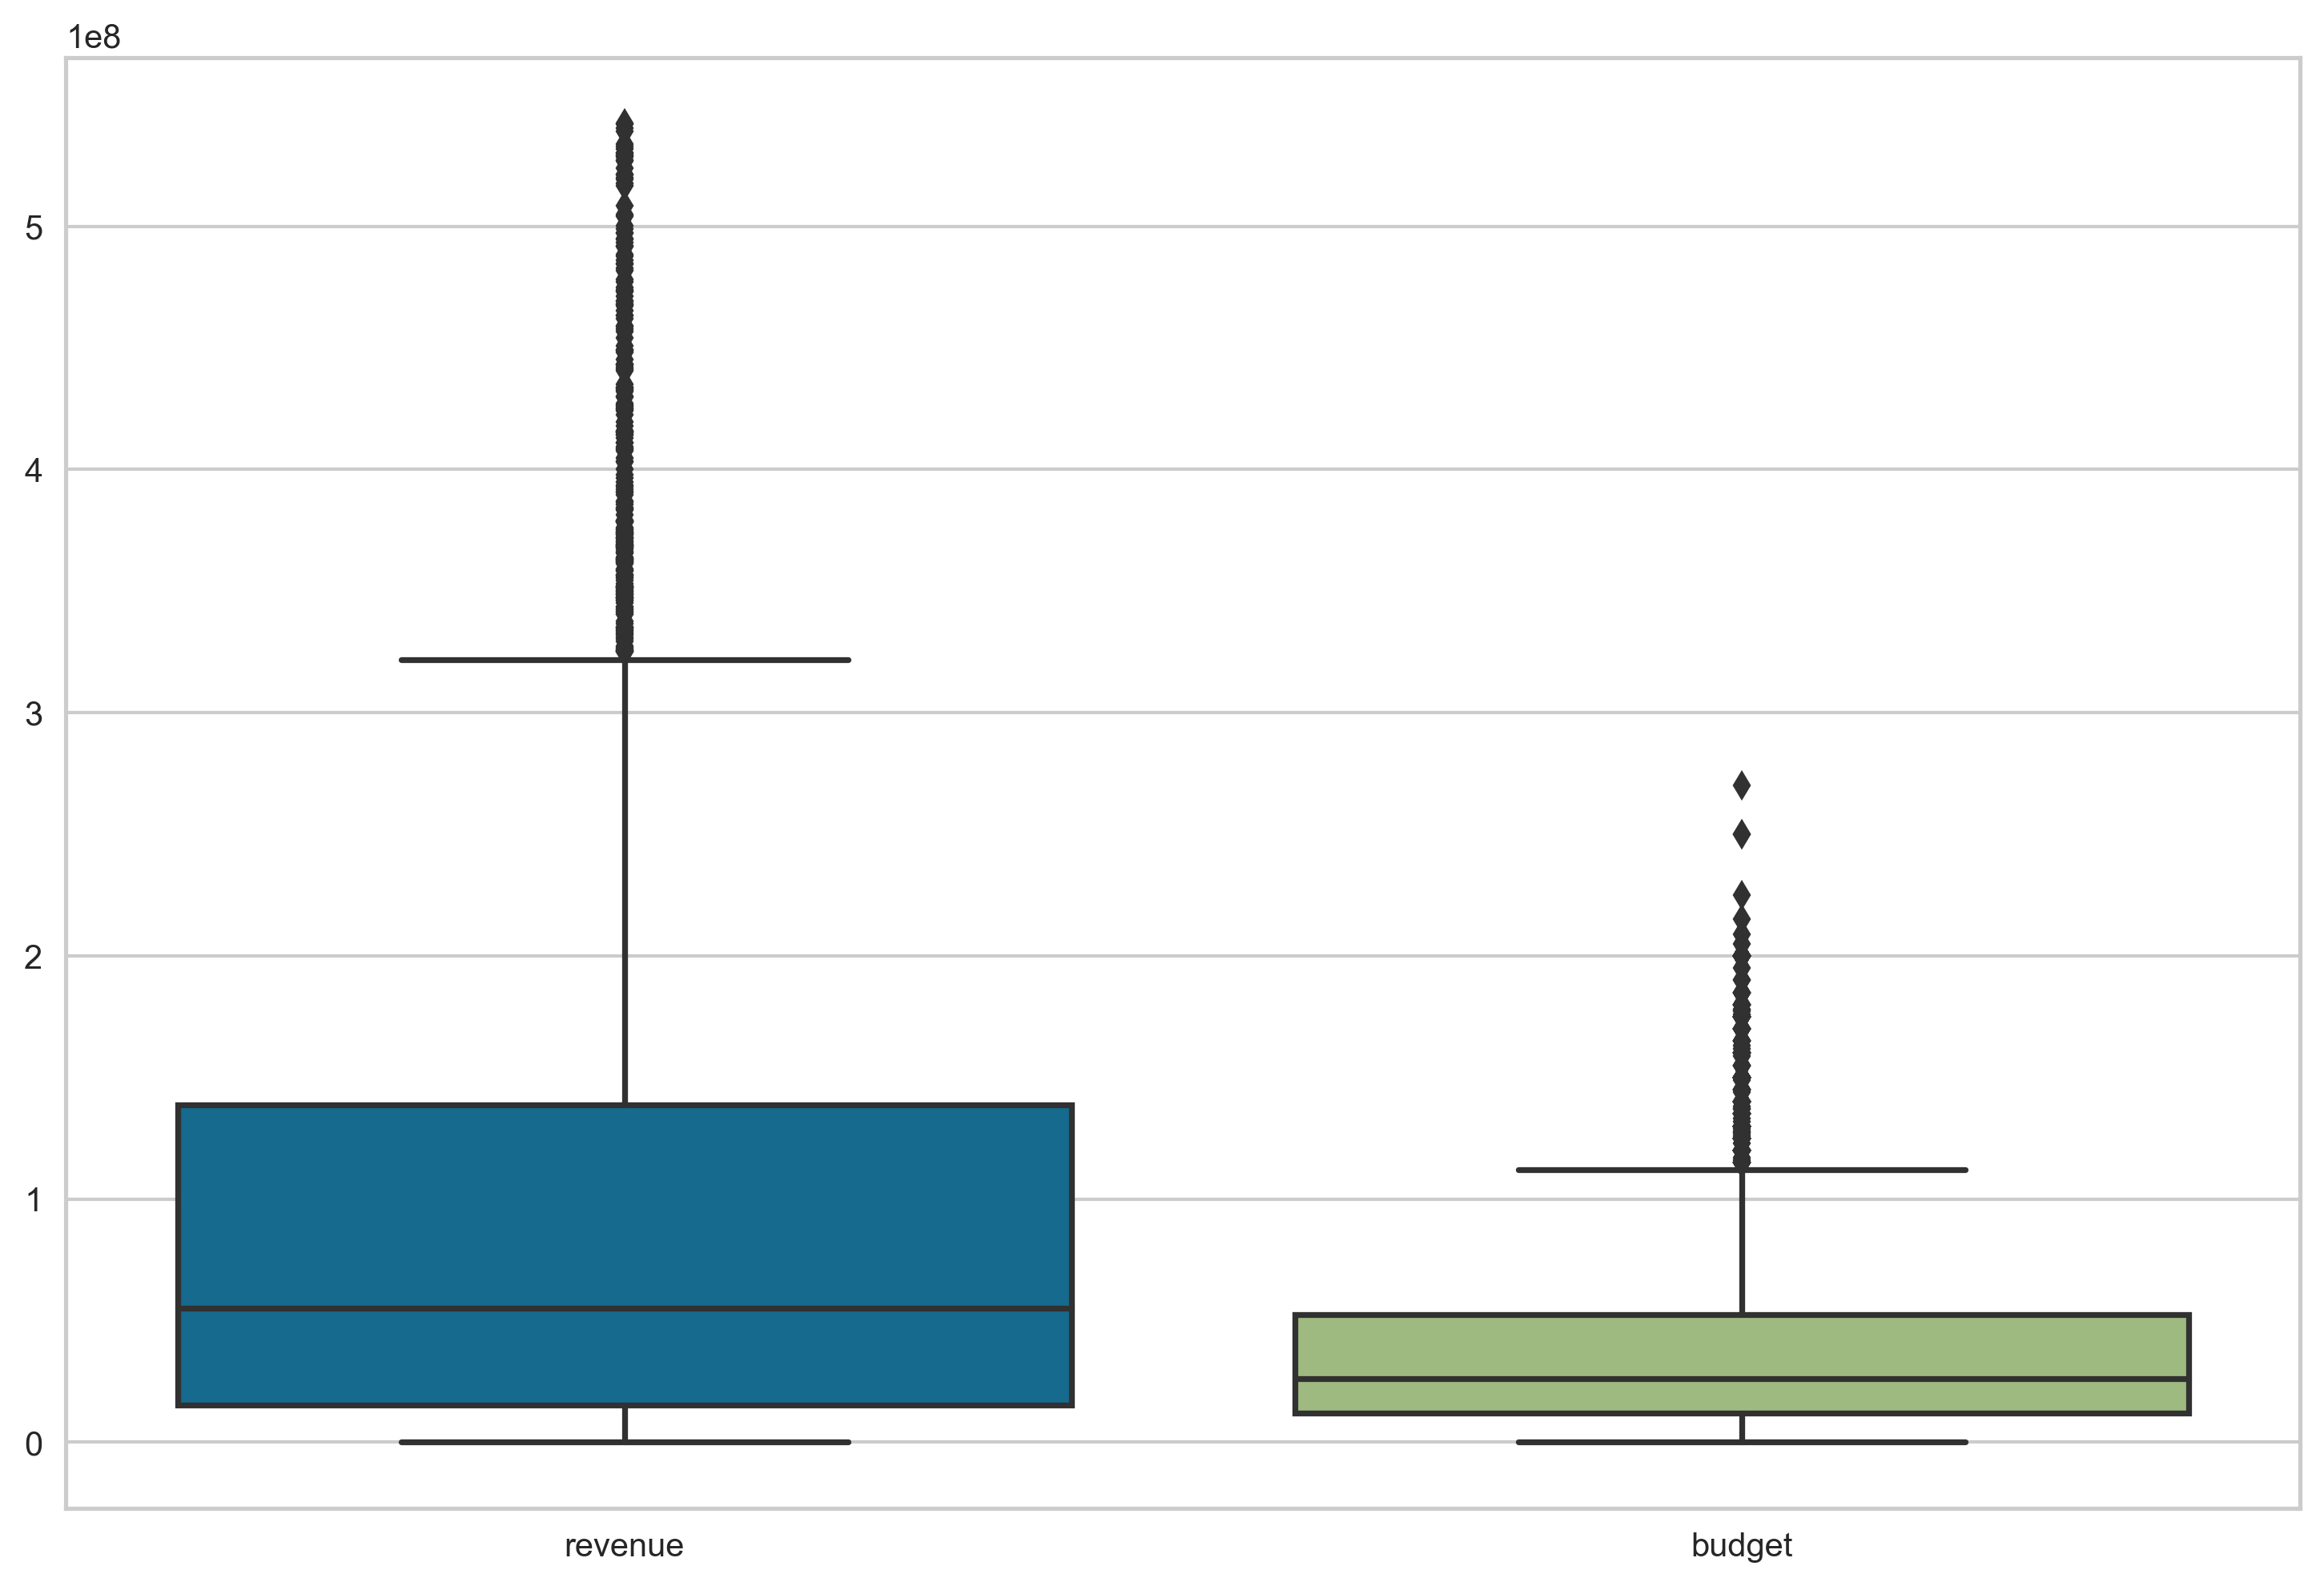

In [110]:
plt.figure(figsize=(12, 8), dpi=300)
sns.boxplot(data=data_2[['revenue', 'budget']])
plt.show()

In [111]:
np.mean(data['budget'])

45492842.229310535

In [112]:
np.mean(data['revenue'])

136679431.19537678

In [113]:
np.mean(data['revenue'])/np.mean(data['budget'])

3.0044161784052204

In [114]:
data_2['revenue'].sum()/data_2['budget'].sum()

2.473967857005498

In [115]:
np.quantile(data['revenue'], 0.95)

543454006.4999998

In [116]:
merged_rev_cas_df_2['rev_over_budget'] = merged_rev_cas_df_2['revenue']/merged_rev_cas_df_2['budget']
merged_rev_cas_df_2['success'] = np.where(merged_rev_cas_df_2['rev_over_budget']>merged_rev_cas_df_2['revenue'].sum()/merged_rev_cas_df_2['budget'].sum(), 1, 0)

In [117]:
data_2['rev_over_budget'] = data_2['revenue']/data_2['budget']
data['rev_over_budget'] = data['revenue']/data['budget']

In [118]:
data_2['success'] = np.where(data_2['rev_over_budget']>data_2['revenue'].sum()/data_2['budget'].sum(), 1, 0)
data['success'] = np.where(data['rev_over_budget']>data['revenue'].sum()/data['budget'].sum(), 1, 0)

In [119]:
print("Before outlier removal")
print((data['success'].value_counts()))
print("After outlier removal")
print((data_2['success'].value_counts()))

Before outlier removal
0    2408
1    1334
Name: success, dtype: int64
After outlier removal
0    2097
1    1457
Name: success, dtype: int64


<AxesSubplot:>

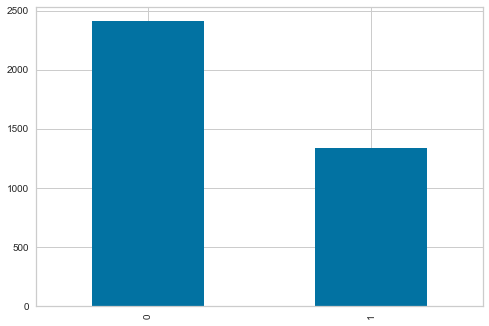

In [120]:
data['success'].value_counts().plot(kind='bar')

<AxesSubplot:>

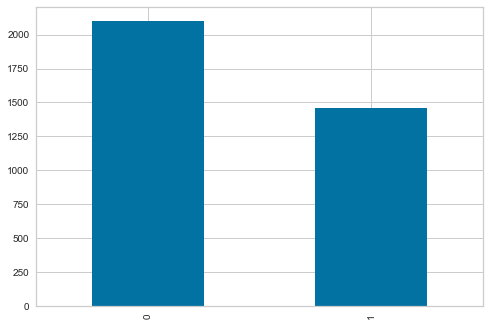

In [121]:
data_2['success'].value_counts().plot(kind='bar')

<Figure size 3600x2400 with 0 Axes>

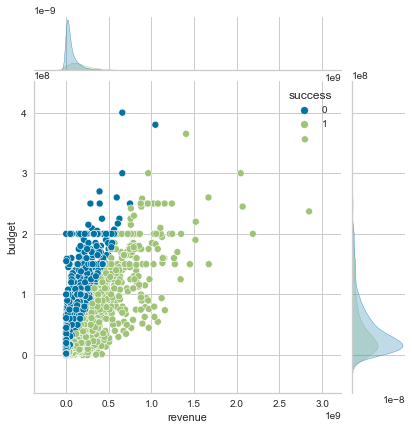

In [122]:
plt.figure(figsize=(12, 8), dpi=300)
sns.jointplot(data=data.reset_index(), x='revenue', y='budget', hue='success')
# plt.title("Joint Distribution Plot without Outlier Removal")
plt.show()

<Figure size 3600x2400 with 0 Axes>

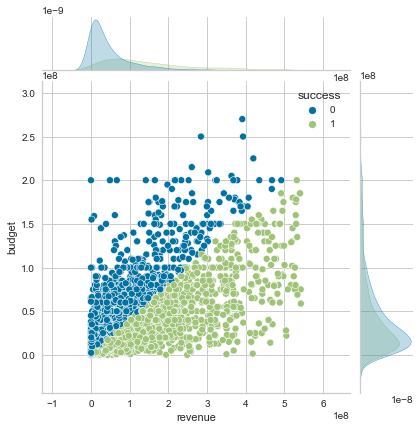

In [123]:
plt.figure(figsize=(12, 8), dpi=300)
sns.jointplot(data=data_2.reset_index(), x='revenue', y='budget', hue='success')
plt.show()

In [124]:
data.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Movie,Music,Mystery,Romance,Sci-Fi,Thriller,War,Western,Allspark,Columbia Pictures,DreamWorks Animation,Metro-Goldwyn-Mayer,Others,Paramount,Sony Pictures,Universal Pictures,Walt Disney,Warner Bros. Pictures,Actor_1 Popularity,Actor_2 Popularity,Director_Popularity,year,rev_over_budget,success
count,3.742000e+03,3742.000000,3.742000e+03,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.00000,3.742000e+03,3742.000000
mean,4.549284e+07,38.508780,1.366794e+08,107.893373,6.439417,2657.074292,0.291288,0.211919,0.080438,0.353287,0.161144,0.006948,0.400855,0.144308,0.129610,0.042758,0.139230,0.002672,0.030732,0.097541,0.157135,0.134955,0.305184,0.025922,0.012560,0.002672,0.069749,0.022982,0.020577,0.454303,0.066007,0.014698,0.092731,0.129075,0.127205,9.836961,7.720974,2.573760,2007.84527,9.552708e+00,0.356494
std,4.871708e+07,207.638626,2.163872e+08,19.485390,0.803789,3497.254099,0.454417,0.408722,0.272007,0.478055,0.367713,0.083077,0.490137,0.351449,0.335919,0.202338,0.346233,0.051633,0.172614,0.296733,0.363977,0.341721,0.460547,0.158924,0.111381,0.051633,0.254757,0.149867,0.141983,0.497974,0.248328,0.120357,0.290094,0.335328,0.333247,7.727654,6.112121,3.549278,8.52205,2.657502e+02,0.479027
min,5.000000e+00,6.874000,1.000000e+00,0.000000,1.800000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600000,0.600000,0.600000,1918.00000,2.450000e-07,0.000000
25%,1.300000e+07,12.430250,1.663827e+07,95.000000,5.900000,527.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.760000,3.770000,1.052000,2002.00000,9.264959e-01,0.000000
50%,3.000000e+07,17.437000,6.081363e+07,105.000000,6.400000,1370.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.783500,6.297500,1.688000,2009.00000,2.127633e+00,0.000000
75%,6.000000e+07,32.280000,1.617358e+08,118.000000,7.000000,3294.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.968000,9.808500,2.675000,2015.00000,3.997237e+00,1.000000
max,4.000000e+08,11473.714000,2.847246e+09,271.000000,8.700000,30353.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,130.326000,69.089000,87.487000,2021.00000,1.567531e+04,1.000000


In [125]:
data_2.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Movie,Music,Mystery,Romance,Sci-Fi,Thriller,War,Western,Allspark,Columbia Pictures,DreamWorks Animation,Metro-Goldwyn-Mayer,Others,Paramount,Sony Pictures,Universal Pictures,Walt Disney,Warner Bros. Pictures,Actor_1 Popularity,Actor_2 Popularity,Director_Popularity,year,rev_over_budget,success
count,3.554000e+03,3554.000000,3.554000e+03,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3.554000e+03,3554.000000
mean,3.949612e+07,34.380294,9.771213e+07,106.985931,6.402870,2196.419527,0.275746,0.182611,0.072313,0.358751,0.167417,0.006472,0.414463,0.137591,0.115644,0.044738,0.146314,0.002814,0.031514,0.101857,0.162071,0.124930,0.313731,0.027293,0.012943,0.002814,0.070343,0.021384,0.021666,0.469893,0.065841,0.015476,0.093697,0.113956,0.124930,9.589649,7.615654,2.513419,2007.668542,9.712199e+00,0.409961
std,3.933482e+07,208.484439,1.130264e+08,18.371646,0.794845,2624.364335,0.446952,0.386402,0.259042,0.479701,0.373400,0.080197,0.492698,0.344519,0.319843,0.206758,0.353470,0.052977,0.174726,0.302503,0.368568,0.330686,0.464074,0.162959,0.113045,0.052977,0.255761,0.144682,0.145610,0.499163,0.248039,0.123452,0.291448,0.317803,0.330686,7.474992,6.086186,3.584357,8.595444,2.726881e+02,0.491895
min,5.000000e+00,6.874000,1.000000e+00,5.000000,1.800000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600000,0.600000,0.600000,1918.000000,2.450000e-07,0.000000
25%,1.200000e+07,12.292500,1.530071e+07,94.000000,5.900000,501.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.643000,3.673750,1.008000,2002.000000,8.628829e-01,0.000000
50%,2.600000e+07,16.828500,5.505098e+07,104.000000,6.400000,1282.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.676000,6.164000,1.620000,2009.000000,1.975080e+00,0.000000
75%,5.237500e+07,28.751250,1.388620e+08,117.000000,6.900000,2876.250000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.715000,9.652250,2.604000,2015.000000,3.614012e+00,1.000000
max,2.700000e+08,11473.714000,5.423074e+08,271.000000,8.700000,22955.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,130.326000,69.089000,87.487000,2021.000000,1.567531e+04,1.000000


In [126]:
data.columns

Index(['budget', 'popularity', 'revenue', 'runtime', 'vote_average',
       'vote_count', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Movie', 'Music', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western', 'Allspark', 'Columbia Pictures', 'DreamWorks Animation',
       'Metro-Goldwyn-Mayer', 'Others', 'Paramount', 'Sony Pictures',
       'Universal Pictures', 'Walt Disney', 'Warner Bros. Pictures',
       'Actor_1 Popularity', 'Actor_2 Popularity', 'Director_Popularity',
       'year', 'rev_over_budget', 'success'],
      dtype='object')

In [127]:
data_2.reset_index(drop=True, inplace=True)

In [128]:
# plt.figure(figsize=(14, 10), dpi=300)
# sns.pairplot(data_2.drop(columns=[
#     'Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
#        'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
#        'Music', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western',
#        'Movie', 'Allspark', 'Columbia Pictures', 'DreamWorks Animation',
#        'Metro-Goldwyn-Mayer', 'Others', 'Paramount', 'Sony Pictures',
#        'Universal Pictures', 'Walt Disney', 'Warner Bros. Pictures', 'year'
# ]))
# plt.show()

In [129]:
scaler = MinMaxScaler()

In [130]:
# No outlier removal
df_scaled = scaler.fit_transform(data.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=data.columns)
print("Scaled Dataset Using MinMaxScaler")
df_scaled.head()

# Outlier removal
df_scaled_2 = scaler.fit_transform(data_2.to_numpy())
df_scaled_2 = pd.DataFrame(df_scaled_2, columns=data_2.columns)
print("Scaled Dataset 2 Using MinMaxScaler")
df_scaled_2.head()

Scaled Dataset Using MinMaxScaler
Scaled Dataset 2 Using MinMaxScaler


,budget,popularity,revenue,runtime,vote_average,vote_count,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Movie,Music,Mystery,Romance,Sci-Fi,Thriller,War,Western,Allspark,Columbia Pictures,DreamWorks Animation,Metro-Goldwyn-Mayer,Others,Paramount,Sony Pictures,Universal Pictures,Walt Disney,Warner Bros. Pictures,Actor_1 Popularity,Actor_2 Popularity,Director_Popularity,year,rev_over_budget,success
0,0.055556,0.000553,0.051141,0.413534,0.652174,0.011110,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.053382,9.543138e-02,1.086469e-02,0.699029,0.000118,0.0
1,0.040741,0.001539,0.089565,0.342105,0.724638,0.105433,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.057675,6.595220e-02,2.860037e-02,0.699029,0.000282,1.0
2,0.025926,0.000144,0.017019,0.323308,0.608696,0.008496,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.090021,1.985720e-02,1.565251e-02,0.699029,0.000084,0.0
3,0.037037,0.000624,0.087423,0.342105,0.608696,0.019213,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.057267,7.269781e-02,1.734723e-18,0.699029,0.000302,1.0
4,0.040741,0.000186,0.016342,0.364662,0.666667,0.013593,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.023935,1.734723e-18,4.175538e-02,0.699029,0.000051,0.0


In [131]:
data = df_scaled
data_2 = df_scaled_2

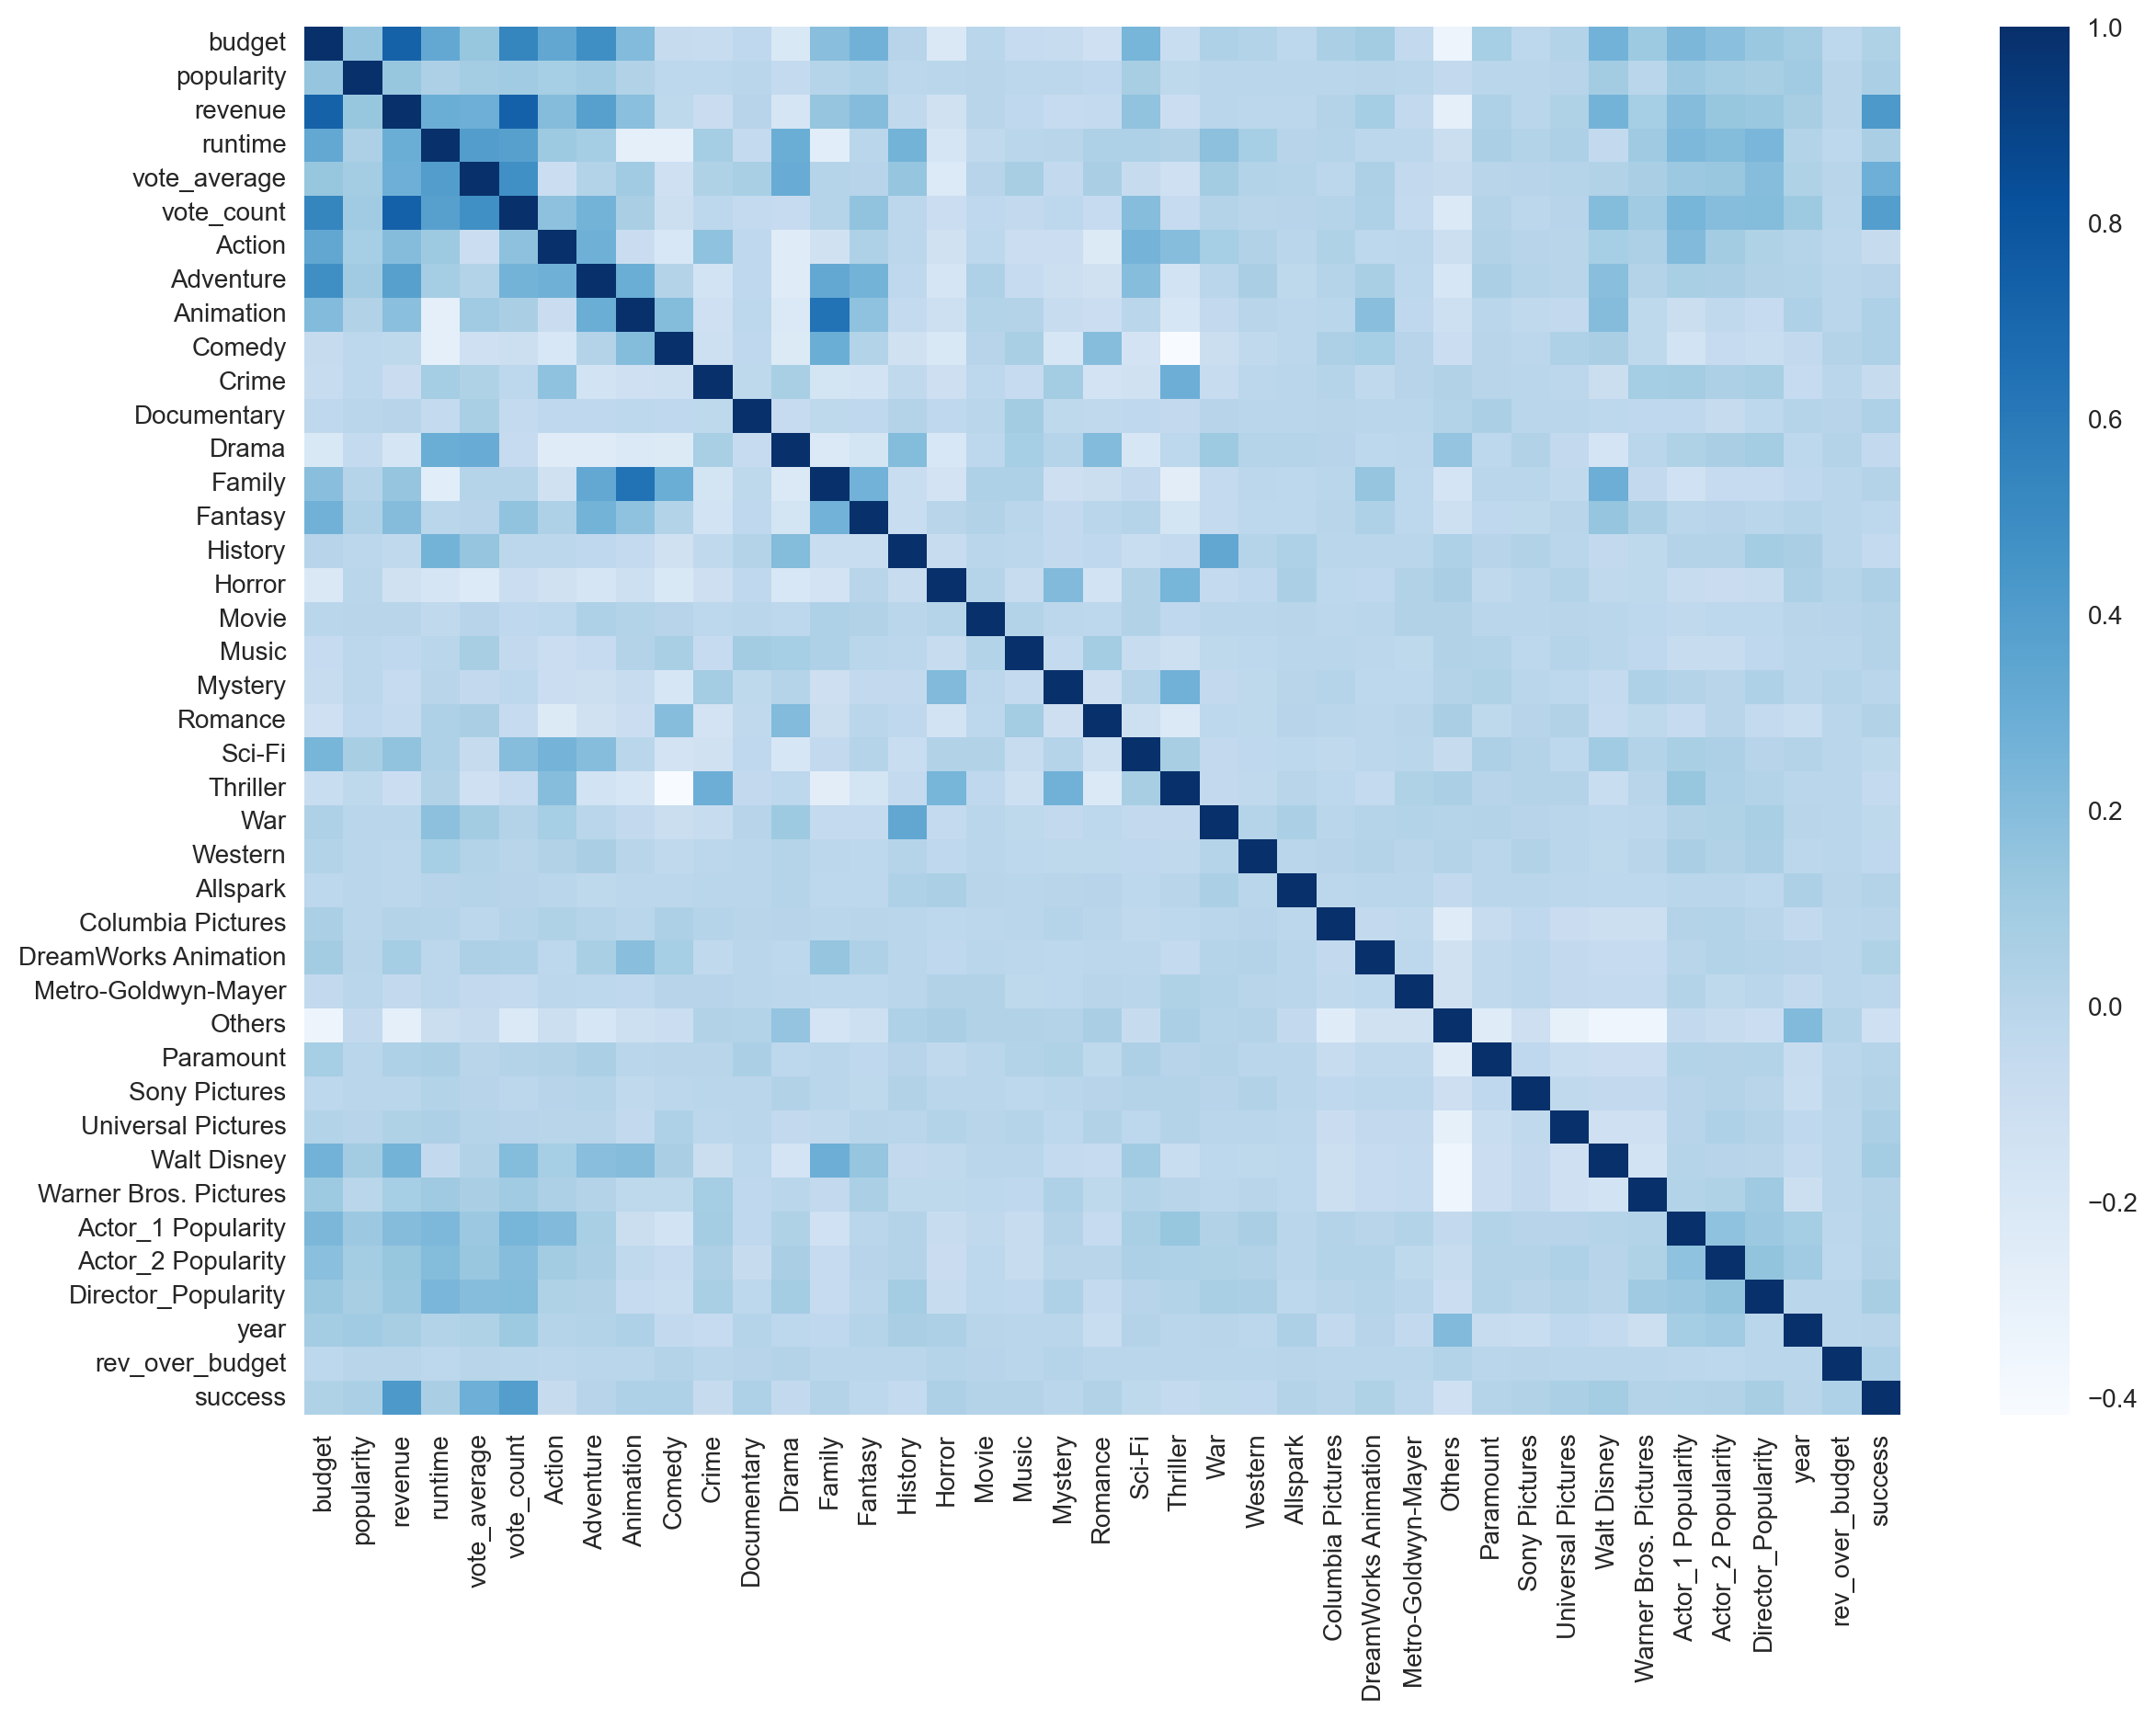

In [132]:
plt.figure(figsize=(14, 10), dpi=200)
sns.heatmap(
    data.corr(),cmap='Blues'
)
plt.show()

In [133]:
train.shape

(6938, 39)

In [134]:
merged_rev_cas_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6984 entries, 931 to 1649
Data columns (total 50 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   budget                 6984 non-null   float64       
 1   id                     6984 non-null   float64       
 2   original_title         6984 non-null   object        
 3   popularity             6984 non-null   float64       
 4   production_companies   6984 non-null   object        
 5   release_date           6984 non-null   datetime64[ns]
 6   revenue                6984 non-null   float64       
 7   runtime                6984 non-null   float64       
 8   status                 6984 non-null   object        
 9   title                  6984 non-null   object        
 10  vote_average           6984 non-null   float64       
 11  vote_count             6984 non-null   float64       
 12  Action                 6984 non-null   int64         
 13  A

In [135]:
# merged_rev_cas_df_2.sort_values()

In [136]:
top_10_dirs_rev = merged_rev_cas_df_2[['Director', 'revenue']].groupby('Director').agg('sum').sort_values('revenue', ascending=False)[0:10]

In [137]:
range(10)

range(0, 10)

In [138]:
int(max(top_10_dirs_rev['revenue']))%len(str(int(max(top_10_dirs_rev['revenue']))))

6

In [139]:
np.array(list(range(0,int(max(top_10_dirs_rev['revenue'])+10**9),100*10000000)))/1000000000

array([0., 1., 2., 3., 4., 5., 6., 7.])

In [140]:
'revenue'.title()

'Revenue'

In [141]:
def plot_top_n(data, category="Director", number="revenue", top=10, palette='mako'):
    if category=='year':
        top_n_df = merged_rev_cas_df_2[[category, number]].groupby(category).agg('sum').sort_values(
            category, ascending=False
        )[0:top]
    else:
        top_n_df = merged_rev_cas_df_2[[category, number]].groupby(category).agg('sum').sort_values(
            number, ascending=False
        )[0:top]
#     top_n_df[category] = top_n_df[category].astype(str)
#     print(top_n_df)
    top_n_df.index = top_n_df.index.astype(str)
    plt.figure(figsize=(11, 6), dpi=150)
    plt.title("Sum of top {} {} by {}".format(top, category, number))
    sns.barplot(data=top_n_df, x=number, y=top_n_df.index, palette=palette)
    plt.ylabel(category.title(), fontsize=14)
    plt.xlabel(number.title(), fontsize=14)
    plt.show()

In [142]:
# Regression
reg_fs_demo = dynaFS_reg(fs_num = 10,random_state = 13,cv = 5,input_from_file = True)
reg_fs_res = reg_fs_demo.fit(data_2.drop(columns=['revenue', 'rev_over_budget', 'success']),data_2['revenue'])

Now in Progress - Feature Selection Iteration: [####################] 100.0%

      *optimalflow* autoFS Module ===> Selector rfecv_rf gets outputs: ['budget', 'popularity', 'runtime', 'vote_average', 'vote_count', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Movie', 'Thriller', 'War', 'Western', 'Allspark', 'Columbia Pictures', 'DreamWorks Animation', 'Metro-Goldwyn-Mayer', 'Others', 'Paramount', 'Sony Pictures', 'Universal Pictures', 'Walt Disney', 'Warner Bros. Pictures', 'Actor_1 Popularity', 'Actor_2 Popularity', 'Director_Popularity', 'year']
The optimalflow autoFS identify the top 10 important features for regression are: ['budget', 'vote_count', 'Actor_1 Popularity', 'runtime', 'vote_average', 'Animation', 'Walt Disney', 'Actor_2 Popularity', 'Director_Popularity', 'year'].


In [143]:
reg_fs_res[1]

['budget',
 'vote_count',
 'Actor_1 Popularity',
 'runtime',
 'vote_average',
 'Animation',
 'Walt Disney',
 'Actor_2 Popularity',
 'Director_Popularity',
 'year']

In [144]:
# Classification
clf_fs_demo = dynaFS_clf(fs_num = 10,random_state = 13, cv = 5,input_from_file = True)
clf_fs_res = clf_fs_demo.fit(data_2.drop(columns=['revenue', 'success', 'rev_over_budget']),data_2['success'])

Now in Progress - Feature Selection Iteration: [####################] 100.0%
The optimalflow autoFS identify the top 10 important features for classification are: ['vote_count', 'vote_average', 'budget', 'Action', 'Adventure', 'Others', 'popularity', 'runtime', 'Universal Pictures', 'Director_Popularity'].


In [145]:
clf_fs_res[1]

['vote_count',
 'vote_average',
 'budget',
 'Action',
 'Adventure',
 'Others',
 'popularity',
 'runtime',
 'Universal Pictures',
 'Director_Popularity']

In [146]:
a = [1, 2, 3]
b = a.copy()

In [147]:
b.append(123)

In [148]:
temp_fs = reg_fs_res[1].copy()
temp_fs.append('revenue')
exp = setup(data_2.filter(
    temp_fs
),
           target='revenue', normalize=False, remove_multicollinearity=True)

,Description,Value
0,session_id,3354
1,Target,revenue
2,Original Data,"(3554, 11)"
3,Missing Values,False
4,Numeric Features,8
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(2487, 10)"


In [149]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.0790,0.0140,0.1180,0.6665,0.0882,10257.7497,0.7420
et,Extra Trees Regressor,0.0800,0.0142,0.1189,0.6603,0.0893,18031.2866,0.2830
lightgbm,Light Gradient Boosting Machine,0.0803,0.0144,0.1199,0.6558,0.0900,13448.9196,0.0500
rf,Random Forest Regressor,0.0806,0.0144,0.1199,0.6552,0.0899,16287.3919,0.3990
gbr,Gradient Boosting Regressor,0.0813,0.0149,0.1218,0.6441,0.0910,18591.4760,0.1240
ridge,Ridge Regression,0.0865,0.0168,0.1294,0.5984,0.0966,26774.9395,0.0090
br,Bayesian Ridge,0.0862,0.0168,0.1295,0.5982,0.0966,27673.9589,0.0210
lr,Linear Regression,0.0862,0.0168,0.1295,0.5981,0.0966,27827.0763,0.4600
lar,Least Angle Regression,0.0862,0.0168,0.1295,0.5981,0.0966,27827.0727,0.0200
huber,Huber Regressor,0.0837,0.0170,0.1303,0.5934,0.0964,27648.0583,0.0280


Descriptive: Utilizing historical data to answer questions like: What happened? Why did it happen?

Predictive: Utilizing historical data to answer questions like: What will happen?

In [150]:
best_model = tune_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0759,0.0136,0.1165,0.6735,0.0861,9.8780
1,0.0797,0.0145,0.1204,0.6486,0.0892,135282.8406
2,0.0782,0.0147,0.1213,0.6840,0.0893,11.0342
3,0.0724,0.0109,0.1046,0.6617,0.0792,19.0699
4,0.0854,0.0169,0.1301,0.6356,0.0971,30201.6541
5,0.0802,0.0142,0.1193,0.6852,0.0886,1189.8778
6,0.0782,0.0151,0.1230,0.6312,0.0914,12.5174
7,0.0805,0.0146,0.1209,0.6441,0.0890,10503.8008
8,0.0818,0.0151,0.1231,0.6681,0.0908,12.4005
9,0.0793,0.0133,0.1152,0.6507,0.0880,33.9789


In [151]:
evaluate_model(best_model)

,Parameters
nan_mode,Min
eval_metric,RMSE
iterations,170
sampling_frequency,PerTree
leaf_estimation_method,Newton
grow_policy,SymmetricTree
penalties_coefficient,1
boosting_type,Plain
model_shrink_mode,Constant
feature_border_type,GreedyLogSum


In [152]:
data_2.rename(columns={'Warner Bros. Pictures': 'Warner Bros Pictures'}, inplace=True)

In [153]:
train, test = train_test_split(data_2)

In [154]:
train.head(2)

,budget,popularity,revenue,runtime,vote_average,vote_count,Action,Adventure,Animation,Comedy,...,Sony Pictures,Universal Pictures,Walt Disney,Warner Bros Pictures,Actor_1 Popularity,Actor_2 Popularity,Director_Popularity,year,rev_over_budget,success
3432,0.018519,0.000310,0.004137,0.304511,0.492754,0.008104,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.000000,0.035787,0.000000,0.922330,0.000029,0.0
2673,0.103704,0.000924,0.038744,0.458647,0.695652,0.058772,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.055663,0.052023,0.001255,0.951456,0.000048,0.0


In [155]:
# Classification
X_train_clf = train.filter(
    clf_fs_res[1]
)
y_train_clf = train['success']
X_test_clf = test.filter(
    clf_fs_res[1]
)
y_test_clf = test['success']

# Regression
X_train_reg = train.filter(
    reg_fs_res[1]
)
y_train_reg = train['revenue']
X_test_reg = test.filter(
    reg_fs_res[1]
)
y_test_reg = test['revenue']

In [156]:
from catboost import CatBoostClassifier, CatBoostRegressor

In [157]:
from sklearn.linear_model import LogisticRegression, LinearRegression

In [158]:
# Linear Regression
model_reg_linear = LinearRegression()
model_reg_linear.fit(X_train_reg, y_train_reg)   # fit model
# preds = model_reg.predict(X_test_reg) # discrete predictions: shape is (n_test, 1)
# preds_proba = model_lgr.predict_proba(X_test) # predicted probabilities: shape is (n_test, n_classes)
# print(model_reg) # print the rule-based model

# CatBoost Regression
model_reg_cat = CatBoostRegressor()
model_reg_cat.fit(X_train_reg, y_train_reg)   # fit model
# preds = model_reg.predict(X_test_reg) # discrete predictions: shape is (n_test, 1)
# preds_proba = model_lgr.predict_proba(X_test) # predicted probabilities: shape is (n_test, n_classes)
# print(model_reg) # print the rule-based model

Learning rate set to 0.047801
0:	learn: 0.2007991	total: 5.03ms	remaining: 5.02s
1:	learn: 0.1956981	total: 8.58ms	remaining: 4.28s
2:	learn: 0.1910120	total: 11.1ms	remaining: 3.7s
3:	learn: 0.1865281	total: 13.4ms	remaining: 3.33s
4:	learn: 0.1824362	total: 15ms	remaining: 2.99s
5:	learn: 0.1784743	total: 16.6ms	remaining: 2.76s
6:	learn: 0.1747083	total: 18.7ms	remaining: 2.65s
7:	learn: 0.1712787	total: 21.2ms	remaining: 2.63s
8:	learn: 0.1680648	total: 23.5ms	remaining: 2.59s
9:	learn: 0.1649407	total: 25.4ms	remaining: 2.52s
10:	learn: 0.1621305	total: 27.5ms	remaining: 2.48s
11:	learn: 0.1595488	total: 29.4ms	remaining: 2.42s
12:	learn: 0.1570113	total: 31.3ms	remaining: 2.38s
13:	learn: 0.1547515	total: 33.1ms	remaining: 2.33s
14:	learn: 0.1524521	total: 34.9ms	remaining: 2.29s
15:	learn: 0.1503817	total: 36.6ms	remaining: 2.25s
16:	learn: 0.1482408	total: 38.1ms	remaining: 2.21s
17:	learn: 0.1464090	total: 39.9ms	remaining: 2.18s
18:	learn: 0.1445152	total: 41.4ms	remaining: 2

162:	learn: 0.0994323	total: 349ms	remaining: 1.79s
163:	learn: 0.0993320	total: 352ms	remaining: 1.8s
164:	learn: 0.0992854	total: 356ms	remaining: 1.8s
165:	learn: 0.0992027	total: 358ms	remaining: 1.8s
166:	learn: 0.0990964	total: 360ms	remaining: 1.8s
167:	learn: 0.0989983	total: 362ms	remaining: 1.79s
168:	learn: 0.0988615	total: 364ms	remaining: 1.79s
169:	learn: 0.0987852	total: 366ms	remaining: 1.78s
170:	learn: 0.0986970	total: 367ms	remaining: 1.78s
171:	learn: 0.0986058	total: 374ms	remaining: 1.8s
172:	learn: 0.0984892	total: 376ms	remaining: 1.8s
173:	learn: 0.0983466	total: 378ms	remaining: 1.79s
174:	learn: 0.0982016	total: 381ms	remaining: 1.8s
175:	learn: 0.0980752	total: 385ms	remaining: 1.8s
176:	learn: 0.0980312	total: 388ms	remaining: 1.8s
177:	learn: 0.0979944	total: 390ms	remaining: 1.8s
178:	learn: 0.0979202	total: 392ms	remaining: 1.8s
179:	learn: 0.0978219	total: 394ms	remaining: 1.8s
180:	learn: 0.0977028	total: 398ms	remaining: 1.8s
181:	learn: 0.0976095	tot

346:	learn: 0.0858476	total: 702ms	remaining: 1.32s
347:	learn: 0.0857525	total: 705ms	remaining: 1.32s
348:	learn: 0.0857041	total: 708ms	remaining: 1.32s
349:	learn: 0.0855880	total: 710ms	remaining: 1.32s
350:	learn: 0.0855174	total: 712ms	remaining: 1.32s
351:	learn: 0.0855054	total: 714ms	remaining: 1.31s
352:	learn: 0.0854891	total: 716ms	remaining: 1.31s
353:	learn: 0.0854292	total: 717ms	remaining: 1.31s
354:	learn: 0.0853836	total: 720ms	remaining: 1.31s
355:	learn: 0.0853385	total: 722ms	remaining: 1.31s
356:	learn: 0.0852747	total: 724ms	remaining: 1.3s
357:	learn: 0.0851806	total: 726ms	remaining: 1.3s
358:	learn: 0.0851526	total: 727ms	remaining: 1.3s
359:	learn: 0.0851208	total: 729ms	remaining: 1.29s
360:	learn: 0.0850996	total: 731ms	remaining: 1.29s
361:	learn: 0.0850011	total: 734ms	remaining: 1.29s
362:	learn: 0.0849590	total: 736ms	remaining: 1.29s
363:	learn: 0.0849435	total: 738ms	remaining: 1.29s
364:	learn: 0.0848311	total: 740ms	remaining: 1.29s
365:	learn: 0.0

539:	learn: 0.0747172	total: 1.06s	remaining: 900ms
540:	learn: 0.0746871	total: 1.06s	remaining: 899ms
541:	learn: 0.0746493	total: 1.06s	remaining: 897ms
542:	learn: 0.0746015	total: 1.06s	remaining: 895ms
543:	learn: 0.0745263	total: 1.06s	remaining: 893ms
544:	learn: 0.0744748	total: 1.07s	remaining: 892ms
545:	learn: 0.0744228	total: 1.07s	remaining: 889ms
546:	learn: 0.0743781	total: 1.07s	remaining: 887ms
547:	learn: 0.0743356	total: 1.07s	remaining: 885ms
548:	learn: 0.0742698	total: 1.07s	remaining: 883ms
549:	learn: 0.0742161	total: 1.08s	remaining: 881ms
550:	learn: 0.0741524	total: 1.08s	remaining: 879ms
551:	learn: 0.0740847	total: 1.08s	remaining: 877ms
552:	learn: 0.0740482	total: 1.08s	remaining: 874ms
553:	learn: 0.0739544	total: 1.09s	remaining: 875ms
554:	learn: 0.0739276	total: 1.09s	remaining: 873ms
555:	learn: 0.0738798	total: 1.09s	remaining: 872ms
556:	learn: 0.0738523	total: 1.09s	remaining: 870ms
557:	learn: 0.0737665	total: 1.09s	remaining: 868ms
558:	learn: 

737:	learn: 0.0660172	total: 1.41s	remaining: 500ms
738:	learn: 0.0659798	total: 1.41s	remaining: 498ms
739:	learn: 0.0659125	total: 1.42s	remaining: 497ms
740:	learn: 0.0658760	total: 1.42s	remaining: 495ms
741:	learn: 0.0658263	total: 1.42s	remaining: 493ms
742:	learn: 0.0658060	total: 1.42s	remaining: 491ms
743:	learn: 0.0657596	total: 1.42s	remaining: 490ms
744:	learn: 0.0657198	total: 1.43s	remaining: 488ms
745:	learn: 0.0656883	total: 1.43s	remaining: 486ms
746:	learn: 0.0656268	total: 1.43s	remaining: 484ms
747:	learn: 0.0655945	total: 1.43s	remaining: 482ms
748:	learn: 0.0655560	total: 1.43s	remaining: 481ms
749:	learn: 0.0655170	total: 1.44s	remaining: 479ms
750:	learn: 0.0654971	total: 1.44s	remaining: 477ms
751:	learn: 0.0654754	total: 1.44s	remaining: 475ms
752:	learn: 0.0654384	total: 1.45s	remaining: 474ms
753:	learn: 0.0654155	total: 1.45s	remaining: 472ms
754:	learn: 0.0653854	total: 1.45s	remaining: 470ms
755:	learn: 0.0653751	total: 1.45s	remaining: 468ms
756:	learn: 

936:	learn: 0.0586984	total: 1.76s	remaining: 118ms
937:	learn: 0.0586837	total: 1.76s	remaining: 117ms
938:	learn: 0.0586327	total: 1.76s	remaining: 115ms
939:	learn: 0.0585788	total: 1.77s	remaining: 113ms
940:	learn: 0.0585354	total: 1.77s	remaining: 111ms
941:	learn: 0.0584925	total: 1.77s	remaining: 109ms
942:	learn: 0.0584520	total: 1.77s	remaining: 107ms
943:	learn: 0.0584231	total: 1.77s	remaining: 105ms
944:	learn: 0.0584148	total: 1.77s	remaining: 103ms
945:	learn: 0.0583867	total: 1.78s	remaining: 101ms
946:	learn: 0.0583683	total: 1.78s	remaining: 99.6ms
947:	learn: 0.0583355	total: 1.78s	remaining: 97.7ms
948:	learn: 0.0582984	total: 1.78s	remaining: 95.8ms
949:	learn: 0.0582466	total: 1.78s	remaining: 93.9ms
950:	learn: 0.0582084	total: 1.79s	remaining: 92.1ms
951:	learn: 0.0581891	total: 1.79s	remaining: 90.3ms
952:	learn: 0.0581713	total: 1.79s	remaining: 88.4ms
953:	learn: 0.0581151	total: 1.79s	remaining: 86.5ms
954:	learn: 0.0580780	total: 1.8s	remaining: 84.6ms
955:

In [159]:
# Logistic Regression
model_clf_log = LogisticRegression()
model_clf_log.fit(X_train_clf, y_train_clf)   # fit model
# preds = model_clf.predict(X_test_clf) # discrete predictions: shape is (n_test, 1)
# preds_proba = model_lgr.predict_proba(X_test) # predicted probabilities: shape is (n_test, n_classes)
# print(model_clf) # print the rule-based model

# CatBoost Classificaiton
model_clf_cat = CatBoostClassifier()
model_clf_cat.fit(X_train_clf, y_train_clf)   # fit model
# preds = model_clf.predict(X_test_clf) # discrete predictions: shape is (n_test, 1)
# preds_proba = model_lgr.predict_proba(X_test) # predicted probabilities: shape is (n_test, n_classes)
# print(model_clf) # print the rule-based model

Learning rate set to 0.015657
0:	learn: 0.6883744	total: 4.72ms	remaining: 4.71s
1:	learn: 0.6853037	total: 7.33ms	remaining: 3.66s
2:	learn: 0.6816531	total: 9.65ms	remaining: 3.21s
3:	learn: 0.6776525	total: 11.9ms	remaining: 2.96s
4:	learn: 0.6743090	total: 13.8ms	remaining: 2.74s
5:	learn: 0.6706427	total: 15.7ms	remaining: 2.61s
6:	learn: 0.6673794	total: 17.6ms	remaining: 2.5s
7:	learn: 0.6639250	total: 20.4ms	remaining: 2.53s
8:	learn: 0.6610681	total: 23.4ms	remaining: 2.58s
9:	learn: 0.6578060	total: 25.6ms	remaining: 2.53s
10:	learn: 0.6546022	total: 27.6ms	remaining: 2.48s
11:	learn: 0.6515028	total: 29.5ms	remaining: 2.42s
12:	learn: 0.6489004	total: 31.6ms	remaining: 2.4s
13:	learn: 0.6457586	total: 33.9ms	remaining: 2.38s
14:	learn: 0.6429692	total: 35.7ms	remaining: 2.34s
15:	learn: 0.6400523	total: 37.4ms	remaining: 2.3s
16:	learn: 0.6371582	total: 39.6ms	remaining: 2.29s
17:	learn: 0.6339032	total: 42.3ms	remaining: 2.31s
18:	learn: 0.6314326	total: 44.6ms	remaining: 2

164:	learn: 0.4944145	total: 356ms	remaining: 1.8s
165:	learn: 0.4941414	total: 358ms	remaining: 1.8s
166:	learn: 0.4938898	total: 360ms	remaining: 1.79s
167:	learn: 0.4933617	total: 362ms	remaining: 1.79s
168:	learn: 0.4930223	total: 364ms	remaining: 1.79s
169:	learn: 0.4927290	total: 368ms	remaining: 1.8s
170:	learn: 0.4923939	total: 371ms	remaining: 1.8s
171:	learn: 0.4921320	total: 374ms	remaining: 1.8s
172:	learn: 0.4917427	total: 377ms	remaining: 1.8s
173:	learn: 0.4912428	total: 380ms	remaining: 1.8s
174:	learn: 0.4910687	total: 387ms	remaining: 1.82s
175:	learn: 0.4907000	total: 390ms	remaining: 1.82s
176:	learn: 0.4903937	total: 393ms	remaining: 1.83s
177:	learn: 0.4900622	total: 395ms	remaining: 1.82s
178:	learn: 0.4897910	total: 398ms	remaining: 1.82s
179:	learn: 0.4894276	total: 400ms	remaining: 1.82s
180:	learn: 0.4890637	total: 403ms	remaining: 1.82s
181:	learn: 0.4887649	total: 405ms	remaining: 1.82s
182:	learn: 0.4884187	total: 407ms	remaining: 1.82s
183:	learn: 0.48798

406:	learn: 0.4392485	total: 885ms	remaining: 1.29s
407:	learn: 0.4390381	total: 887ms	remaining: 1.29s
408:	learn: 0.4389330	total: 890ms	remaining: 1.28s
409:	learn: 0.4387544	total: 892ms	remaining: 1.28s
410:	learn: 0.4386419	total: 894ms	remaining: 1.28s
411:	learn: 0.4384530	total: 897ms	remaining: 1.28s
412:	learn: 0.4384451	total: 899ms	remaining: 1.28s
413:	learn: 0.4380764	total: 902ms	remaining: 1.28s
414:	learn: 0.4379158	total: 904ms	remaining: 1.27s
415:	learn: 0.4377030	total: 906ms	remaining: 1.27s
416:	learn: 0.4374724	total: 908ms	remaining: 1.27s
417:	learn: 0.4373513	total: 910ms	remaining: 1.27s
418:	learn: 0.4372197	total: 913ms	remaining: 1.26s
419:	learn: 0.4370189	total: 914ms	remaining: 1.26s
420:	learn: 0.4368510	total: 916ms	remaining: 1.26s
421:	learn: 0.4367714	total: 919ms	remaining: 1.26s
422:	learn: 0.4365344	total: 921ms	remaining: 1.26s
423:	learn: 0.4364257	total: 923ms	remaining: 1.25s
424:	learn: 0.4362740	total: 925ms	remaining: 1.25s
425:	learn: 

582:	learn: 0.4117637	total: 1.24s	remaining: 888ms
583:	learn: 0.4115839	total: 1.24s	remaining: 886ms
584:	learn: 0.4113521	total: 1.25s	remaining: 884ms
585:	learn: 0.4112090	total: 1.25s	remaining: 883ms
586:	learn: 0.4110585	total: 1.25s	remaining: 881ms
587:	learn: 0.4109747	total: 1.25s	remaining: 879ms
588:	learn: 0.4108760	total: 1.26s	remaining: 877ms
589:	learn: 0.4107731	total: 1.26s	remaining: 875ms
590:	learn: 0.4107275	total: 1.26s	remaining: 873ms
591:	learn: 0.4106156	total: 1.26s	remaining: 872ms
592:	learn: 0.4105582	total: 1.27s	remaining: 870ms
593:	learn: 0.4102239	total: 1.27s	remaining: 868ms
594:	learn: 0.4100747	total: 1.27s	remaining: 866ms
595:	learn: 0.4099654	total: 1.27s	remaining: 864ms
596:	learn: 0.4098155	total: 1.28s	remaining: 863ms
597:	learn: 0.4096077	total: 1.28s	remaining: 860ms
598:	learn: 0.4095132	total: 1.28s	remaining: 859ms
599:	learn: 0.4093934	total: 1.29s	remaining: 857ms
600:	learn: 0.4093085	total: 1.29s	remaining: 855ms
601:	learn: 

758:	learn: 0.3835814	total: 1.6s	remaining: 508ms
759:	learn: 0.3833783	total: 1.6s	remaining: 506ms
760:	learn: 0.3832528	total: 1.6s	remaining: 504ms
761:	learn: 0.3830696	total: 1.61s	remaining: 502ms
762:	learn: 0.3828370	total: 1.61s	remaining: 500ms
763:	learn: 0.3827781	total: 1.61s	remaining: 498ms
764:	learn: 0.3826731	total: 1.62s	remaining: 496ms
765:	learn: 0.3824861	total: 1.62s	remaining: 494ms
766:	learn: 0.3823232	total: 1.62s	remaining: 492ms
767:	learn: 0.3821337	total: 1.62s	remaining: 490ms
768:	learn: 0.3820558	total: 1.62s	remaining: 488ms
769:	learn: 0.3818353	total: 1.63s	remaining: 486ms
770:	learn: 0.3817062	total: 1.63s	remaining: 484ms
771:	learn: 0.3815560	total: 1.63s	remaining: 482ms
772:	learn: 0.3813803	total: 1.63s	remaining: 480ms
773:	learn: 0.3811619	total: 1.64s	remaining: 478ms
774:	learn: 0.3810232	total: 1.64s	remaining: 476ms
775:	learn: 0.3808630	total: 1.64s	remaining: 473ms
776:	learn: 0.3806659	total: 1.64s	remaining: 471ms
777:	learn: 0.3

937:	learn: 0.3553788	total: 1.96s	remaining: 130ms
938:	learn: 0.3551741	total: 1.96s	remaining: 128ms
939:	learn: 0.3549490	total: 1.97s	remaining: 126ms
940:	learn: 0.3547162	total: 1.97s	remaining: 123ms
941:	learn: 0.3546110	total: 1.97s	remaining: 121ms
942:	learn: 0.3544594	total: 1.97s	remaining: 119ms
943:	learn: 0.3543768	total: 1.98s	remaining: 117ms
944:	learn: 0.3542226	total: 1.98s	remaining: 115ms
945:	learn: 0.3540821	total: 1.98s	remaining: 113ms
946:	learn: 0.3539869	total: 1.98s	remaining: 111ms
947:	learn: 0.3538513	total: 1.99s	remaining: 109ms
948:	learn: 0.3536658	total: 1.99s	remaining: 107ms
949:	learn: 0.3534259	total: 1.99s	remaining: 105ms
950:	learn: 0.3532937	total: 1.99s	remaining: 103ms
951:	learn: 0.3531535	total: 1.99s	remaining: 101ms
952:	learn: 0.3530371	total: 2s	remaining: 98.5ms
953:	learn: 0.3528660	total: 2s	remaining: 96.4ms
954:	learn: 0.3527582	total: 2s	remaining: 94.3ms
955:	learn: 0.3526126	total: 2s	remaining: 92.2ms
956:	learn: 0.352396

In [160]:
# from imodels import RuleFitRegressor, RuleFitClassifier

# model_reg = RuleFitRegressor()  # initialize a model
# model_reg.fit(X_train_reg, y_train_reg)   # fit model
# preds = model_reg.predict(X_test_reg) # discrete predictions: shape is (n_test, 1)
# # preds_proba = model.predict_proba(X_test) # predicted probabilities: shape is (n_test, n_classes)
# print("RuleFitRegressor")
# print(model_reg) # print the rule-based model

In [161]:
# print("RuleFitClassifier")
# model_clf = RuleFitClassifier()  # initialize a model
# model_clf.fit(X_train_clf, y_train_clf)   # fit model
# preds = model_clf.predict(X_test_clf) # discrete predictions: shape is (n_test, 1)
# # preds_proba = model.predict_proba(X_test) # predicted probabilities: shape is (n_test, n_classes)
# print(model_clf) # print the rule-based model

In [162]:
print("Training R^2 for Linear Regression: {:.2f}".format(model_reg_linear.score(X_train_reg, y_train_reg)))
print("Testing R^2 for Linear Regression: {:.2f}".format(model_reg_linear.score(X_test_reg, y_test_reg)))
print("")
print("*"*50)
print("")
print("Training R^2 for Catboost Regression: {:.2f}".format(model_reg_cat.score(X_train_reg, y_train_reg)))
print("Testing R^2 for Catboost Regression: {:.2f}".format(model_reg_cat.score(X_test_reg, y_test_reg)))
print("")
print("*"*50)
print("")
print("Training Accuracy for Logistic Regression: {:.2f}".format(model_clf_log.score(X_train_clf, y_train_clf)))
print("Testing Accuracy for Logistic Regression: {:.2f}".format(model_clf_log.score(X_test_clf, y_test_clf)))
print("")
print("*"*50)
print("")
print("Training Accuracy for Catboost Classification: {:.2f}".format(model_clf_cat.score(X_train_clf, y_train_clf)))
print("Testing R^2 for Catboost Classification: {:.2f}".format(model_clf_cat.score(X_test_clf, y_test_clf)))

Training R^2 for Linear Regression: 0.61
Testing R^2 for Linear Regression: 0.65

**************************************************

Training R^2 for Catboost Regression: 0.92
Testing R^2 for Catboost Regression: 0.69

**************************************************

Training Accuracy for Logistic Regression: 0.73
Testing Accuracy for Logistic Regression: 0.74

**************************************************

Training Accuracy for Catboost Classification: 0.87
Testing R^2 for Catboost Classification: 0.74


In [163]:
from explainerdashboard import ClassifierExplainer, RegressionExplainer
from explainerdashboard import ExplainerDashboard
from explainerdashboard import ExplainerHub

In [164]:
explainer_clf_log = ClassifierExplainer(model_clf_log, X_test_clf, y_test_clf)
explainer_reg_linear = RegressionExplainer(model_reg_linear, X_test_reg, y_test_reg)
explainer_clf_cat = ClassifierExplainer(model_clf_cat, X_test_clf, y_test_clf)
explainer_reg_cat = RegressionExplainer(model_reg_cat, X_test_reg, y_test_reg)

Note: model_output='probability' is currently not supported for linear classifiers models with shap. So defaulting to model_output='logodds' If you really need probability outputs use shap='kernel' instead.
Note: shap values for shap='linear' get calculated against X_background, but paramater X_background=None, so using X instead...
Generating self.shap_explainer = shap.LinearExplainer(model, X)...
Generating self.shap_explainer = shap.LinearExplainer(modelX)...
Note: model_output=='probability'. For CatBoostClassifier shap values normally get calculated against X_background, but paramater X_background=None, so using X instead
Generating self.shap_explainer = shap.TreeExplainer(model, X, model_output='probability', feature_perturbation='interventional')...
Note: Shap interaction values will not be available. If shap values in probability space are not necessary you can pass model_output='logodds' to get shap values in logodds without the need for a background dataset and also working s

In [165]:
clf_log = ExplainerDashboard(explainer_clf_log, title="Classification of Movie Success (Logistic) with normalized data")
clf_cat = ExplainerDashboard(explainer_clf_cat, title="Classification of Movie Success (CatBoost) with normalized data")
reg_linear = ExplainerDashboard(explainer_reg_linear, title="Regression of Movie Revenue (Linear) with normalized data")
reg_cat = ExplainerDashboard(explainer_reg_cat, title="Regression of Movie Revenue (CatBoost) with normalized data")
hub = ExplainerHub([clf_log, clf_cat, reg_linear, reg_cat])
hub.run()

Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating predictions...
Calculating pred_percentiles...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.jobl

 99%|===================| 881/889 [00:55<00:00]        

Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating predictions...
Calculating pred_percentiles...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout.

Using random SECRET_KEY: 2827a5fe-8320-4d46-826b-38a8a5fa1208, please set it on your app.config["SECRET_KEY"]


Reminder, you can set ExplainerDashboard .name and .description in order to control the url path of the dashboard. Now defaulting to name=dashboard1 and default description...
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating dependencies...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Reminder, you can set ExplainerDashboard .name and .description in order to control the url path of the dashboard. Now defaulting to name=dashboard2 and default description...
Bu

 * Running on all addresses.
 * Running on http://10.0.0.65:8050/ (Press CTRL+C to quit)
10.0.0.65 - - [15/Dec/2021 01:54:58] "GET / HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 01:54:58] "GET /static/jquery-3.5.1.slim.min.js HTTP/1.1" 304 -
10.0.0.65 - - [15/Dec/2021 01:54:58] "GET /static/bootstrap.min.css HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 01:54:58] "GET /static/bootstrap.min.js HTTP/1.1" 304 -
10.0.0.65 - - [15/Dec/2021 01:54:58] "GET /index/ HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 01:54:58] "GET /index/assets/bootstrap.min.css?m=1639364996.451597 HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 01:54:58] "GET /index/_dash-component-suites/dash/deps/polyfill@7.v2_0_0m1639365002.12.1.min.js HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 01:54:58] "GET /index/_dash-component-suites/dash/deps/react-dom@16.v2_0_0m1639365002.14.0.min.js HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 01:54:58] "GET /index/_dash-component-suites/dash/dash-renderer/build/dash_renderer.v2_0_0m1639365001.min.js H

10.0.0.65 - - [15/Dec/2021 01:55:03] "POST /dashboards/dashboard1/_dash-update-component HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 01:55:03] "POST /dashboards/dashboard1/_dash-update-component HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 01:55:03] "POST /dashboards/dashboard1/_dash-update-component HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 01:55:03] "POST /dashboards/dashboard1/_dash-update-component HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 01:55:03] "POST /dashboards/dashboard1/_dash-update-component HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 01:55:03] "POST /dashboards/dashboard1/_dash-update-component HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 01:55:03] "POST /dashboards/dashboard1/_dash-update-component HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 01:55:04] "POST /dashboards/dashboard1/_dash-update-component HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 01:55:04] "POST /dashboards/dashboard1/_dash-update-component HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 01:55:04] "POST /dashboards/

/Library/Python/3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Library/Python/3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Library/Python/3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Library/Python/3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Library/Python/3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 a

10.0.0.65 - - [15/Dec/2021 01:58:28] "GET /dashboards/dashboard2/_dash-component-suites/dash_bootstrap_components/_components/dash_bootstrap_components.v0_13_1m1639364998.min.js HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 01:58:28] "GET /dashboards/dashboard2/_dash-component-suites/dash/dash-renderer/build/dash_renderer.v2_0_0m1639365001.min.js HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 01:58:28] "GET /dashboards/dashboard2/_dash-component-suites/dash/dcc/dash_core_components.v2_0_0m1639365002.js HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 01:58:28] "GET /dashboards/dashboard2/_dash-component-suites/dash/html/dash_html_components.v2_0_0m1639365002.min.js HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 01:58:28] "GET /dashboards/dashboard2/_dash-dependencies HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 01:58:28] "GET /dashboards/dashboard2/_dash-layout HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 01:58:29] "GET /dashboards/dashboard2/_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 200 

10.0.0.65 - - [15/Dec/2021 01:58:47] "POST /dashboards/dashboard2/_dash-update-component HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 01:58:55] "POST /dashboards/dashboard2/_dash-update-component HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 02:15:51] "GET / HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 02:15:51] "GET /static/bootstrap.min.js HTTP/1.1" 304 -
10.0.0.65 - - [15/Dec/2021 02:15:51] "GET /static/jquery-3.5.1.slim.min.js HTTP/1.1" 304 -
10.0.0.65 - - [15/Dec/2021 02:15:51] "GET /static/bootstrap.min.css HTTP/1.1" 304 -
10.0.0.65 - - [15/Dec/2021 02:15:51] "GET /index/ HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 02:15:51] "GET /index/assets/bootstrap.min.css?m=1639364996.451597 HTTP/1.1" 304 -
10.0.0.65 - - [15/Dec/2021 02:15:51] "GET /index/_dash-layout HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 02:15:51] "GET /index/_dash-dependencies HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 02:16:56] "GET /dashboards/dashboard3/ HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 02:16:56] "GET /dashboard

10.0.0.65 - - [15/Dec/2021 02:17:14] "POST /dashboards/dashboard3/_dash-update-component HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 02:19:04] "GET / HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 02:19:04] "GET /static/jquery-3.5.1.slim.min.js HTTP/1.1" 304 -
10.0.0.65 - - [15/Dec/2021 02:19:04] "GET /static/bootstrap.min.js HTTP/1.1" 304 -
10.0.0.65 - - [15/Dec/2021 02:19:04] "GET /static/bootstrap.min.css HTTP/1.1" 304 -
10.0.0.65 - - [15/Dec/2021 02:19:04] "GET /index/ HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 02:19:04] "GET /index/assets/bootstrap.min.css?m=1639364996.451597 HTTP/1.1" 304 -
10.0.0.65 - - [15/Dec/2021 02:19:04] "GET /index/_dash-layout HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 02:19:04] "GET /index/_dash-dependencies HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 02:19:06] "GET /dashboards/dashboard4/ HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 02:19:06] "GET /dashboards/dashboard4/assets/bootstrap.min.css?m=1639364996.451597 HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 02:1

10.0.0.65 - - [15/Dec/2021 02:19:30] "GET /static/bootstrap.min.js HTTP/1.1" 304 -
10.0.0.65 - - [15/Dec/2021 02:19:30] "GET /index/ HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 02:19:30] "GET /index/assets/bootstrap.min.css?m=1639364996.451597 HTTP/1.1" 304 -
10.0.0.65 - - [15/Dec/2021 02:19:30] "GET /index/_dash-layout HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 02:19:30] "GET /index/_dash-dependencies HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 02:19:36] "GET /dashboards/dashboard3/ HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 02:19:36] "GET /dashboards/dashboard3/assets/bootstrap.min.css?m=1639364996.451597 HTTP/1.1" 304 -
10.0.0.65 - - [15/Dec/2021 02:19:36] "GET /dashboards/dashboard3/_dash-dependencies HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 02:19:36] "GET /dashboards/dashboard3/_dash-layout HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 02:19:36] "GET /dashboards/dashboard3/_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 02:19:36] "GET /dashbo

10.0.0.65 - - [15/Dec/2021 02:20:31] "POST /dashboards/dashboard4/_dash-update-component HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 02:20:31] "POST /dashboards/dashboard4/_dash-update-component HTTP/1.1" 204 -
10.0.0.65 - - [15/Dec/2021 02:20:31] "POST /dashboards/dashboard4/_dash-update-component HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 02:20:31] "POST /dashboards/dashboard4/_dash-update-component HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 02:20:31] "POST /dashboards/dashboard4/_dash-update-component HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 02:20:31] "POST /dashboards/dashboard4/_dash-update-component HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 02:20:31] "POST /dashboards/dashboard4/_dash-update-component HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 02:20:31] "POST /dashboards/dashboard4/_dash-update-component HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 02:20:31] "POST /dashboards/dashboard4/_dash-update-component HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 02:20:31] "POST /dashboards/

10.0.0.65 - - [15/Dec/2021 02:39:51] "POST /dashboards/dashboard1/_dash-update-component HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 02:39:51] "POST /dashboards/dashboard1/_dash-update-component HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 02:39:51] "POST /dashboards/dashboard1/_dash-update-component HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 02:39:51] "POST /dashboards/dashboard1/_dash-update-component HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 02:39:51] "POST /dashboards/dashboard1/_dash-update-component HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 02:39:51] "POST /dashboards/dashboard1/_dash-update-component HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 02:39:51] "POST /dashboards/dashboard1/_dash-update-component HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 02:39:51] "POST /dashboards/dashboard1/_dash-update-component HTTP/1.1" 204 -
10.0.0.65 - - [15/Dec/2021 02:39:51] "POST /dashboards/dashboard1/_dash-update-component HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 02:39:51] "POST /dashboards/

10.0.0.65 - - [15/Dec/2021 02:40:12] "POST /dashboards/dashboard3/_dash-update-component HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 02:40:12] "POST /dashboards/dashboard3/_dash-update-component HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 02:40:12] "POST /dashboards/dashboard3/_dash-update-component HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 02:40:12] "POST /dashboards/dashboard3/_dash-update-component HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 02:40:12] "POST /dashboards/dashboard3/_dash-update-component HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 02:40:12] "POST /dashboards/dashboard3/_dash-update-component HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 02:40:12] "POST /dashboards/dashboard3/_dash-update-component HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 02:40:12] "POST /dashboards/dashboard3/_dash-update-component HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 02:40:12] "POST /dashboards/dashboard3/_dash-update-component HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 02:40:12] "POST /dashboards/

10.0.0.65 - - [15/Dec/2021 02:44:31] "POST /dashboards/dashboard4/_dash-update-component HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 02:44:31] "POST /dashboards/dashboard4/_dash-update-component HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 02:44:31] "POST /dashboards/dashboard4/_dash-update-component HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 02:44:31] "POST /dashboards/dashboard4/_dash-update-component HTTP/1.1" 204 -
10.0.0.65 - - [15/Dec/2021 02:44:31] "POST /dashboards/dashboard4/_dash-update-component HTTP/1.1" 204 -
10.0.0.65 - - [15/Dec/2021 02:44:31] "POST /dashboards/dashboard4/_dash-update-component HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 02:44:31] "POST /dashboards/dashboard4/_dash-update-component HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 02:44:31] "POST /dashboards/dashboard4/_dash-update-component HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 02:44:31] "POST /dashboards/dashboard4/_dash-update-component HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 02:44:31] "POST /dashboards/

10.0.0.65 - - [15/Dec/2021 02:46:29] "POST /dashboards/dashboard3/_dash-update-component HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 02:46:29] "POST /dashboards/dashboard3/_dash-update-component HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 02:46:29] "POST /dashboards/dashboard3/_dash-update-component HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 02:46:29] "POST /dashboards/dashboard3/_dash-update-component HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 02:46:29] "POST /dashboards/dashboard3/_dash-update-component HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 02:46:29] "POST /dashboards/dashboard3/_dash-update-component HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 02:46:29] "POST /dashboards/dashboard3/_dash-update-component HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 02:46:29] "POST /dashboards/dashboard3/_dash-update-component HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 02:46:29] "POST /dashboards/dashboard3/_dash-update-component HTTP/1.1" 200 -
10.0.0.65 - - [15/Dec/2021 02:46:29] "POST /dashboards/

10.0.0.65 - - [15/Dec/2021 02:46:42] "POST /dashboards/dashboard4/_dash-update-component HTTP/1.1" 200 -


In [166]:
merged_rev_cas_df_2.columns

Index(['budget', 'id', 'original_title', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'status', 'title', 'vote_average',
       'vote_count', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Movie', 'Music', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western', 'Allspark', 'Columbia Pictures', 'DreamWorks Animation',
       'Metro-Goldwyn-Mayer', 'Others', 'Paramount', 'Sony Pictures',
       'Universal Pictures', 'Walt Disney', 'Warner Bros. Pictures', 'Actor_1',
       'Actor_1 Popularity', 'Actor_2', 'Actor_2 Popularity', 'Director',
       'Director_Popularity', 'year', 'rev_over_budget', 'success'],
      dtype='object')

supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

In [167]:
merged_rev_cas_df_2['count'] = 1

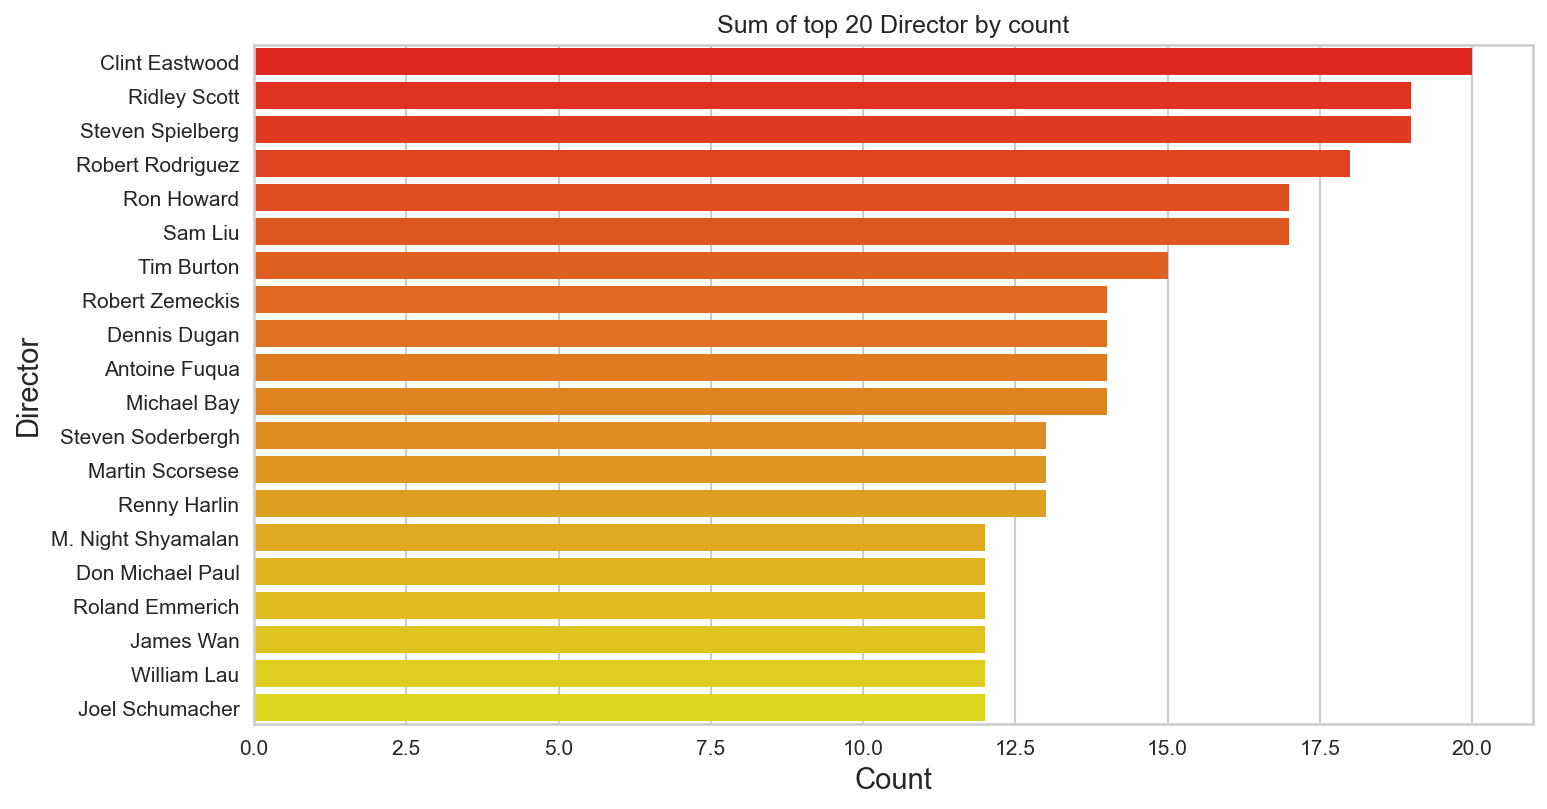

In [168]:
plot_top_n(merged_rev_cas_df_2, category='Director', number='count', top=20, palette='autumn')